# Preprocessing and Exploritory Data Analysis

In [466]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re 
import missingno as msno
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns # For nicer plots



In [467]:
# Load in the dataframe
df = pd.read_csv('../data/db_computers_2025_raw.csv', encoding='utf-8-sig', low_memory=False)

## Data inpection & summary statistics 

### Initial examination

In [468]:
df.head()


,Unnamed: 0,Título,Precio_Rango,Ofertas,Tipo de producto,Serie,Pantalla_Tamaño de la pantalla,Pantalla_Diagonal de la pantalla,Pantalla_Tecnología de la pantalla,Pantalla_Luminosidad,...,Características especiales,Almacenamiento_Formato audiovisual compatible,Otras características_Modo de sonido,Propiedades de la carcasa_Superficie del material,Disco duro_Capacidad disco duro (GB),"Propiedades de la carcasa_Bahía externa de 3,5""",Procesador_Placa base,Otras características_Certificado RoHS,Sistema operativo_Software incluido,Procesador_Procesadores compatibles
0,0,"Apple MacBook Air 13"" 2024 M3","1.026,53 € – 2.287,17 €",200 ofertas:,Portátil multimedia,Apple MacBook Air,"13,6 pulgadas","34,544 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Apple MacBook Air 15"" 2024 M3","1.270,42 € – 2.672,25 €",230 ofertas:,Portátil multimedia,Apple MacBook Air,"15,3 pulgadas","38,862 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Apple MacBook Pro 14"" M4 (2024)","1.731,44 € – 4.932,25 €",136 ofertas:,Portátil multimedia,Apple MacBook Pro,"14,2 pulgadas","36,068 cm",Retina,1.000 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ASUS TUF Gaming A15 FA506 (2024),"647,00 € – 1.031,71 €",30 ofertas:,Portátil gaming,ASUS TUF Gaming,"15,6 pulgadas","39,624 cm",Full HD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,GigaByte Aero 16 OLED BKF,"1.031,31 € – 2.069,99 €",29 ofertas:,Portátil gaming,Gigabyte Aero,16 pulgadas,"40,64 cm",UHD+,600 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the head of the dataset, we can see that the dataset has large amount of collumns. This is most likley due to the different types of PC parts that have their own unique properties that do not apply to other categories.

In [469]:
df.tail()

,Unnamed: 0,Título,Precio_Rango,Ofertas,Tipo de producto,Serie,Pantalla_Tamaño de la pantalla,Pantalla_Diagonal de la pantalla,Pantalla_Tecnología de la pantalla,Pantalla_Luminosidad,...,Características especiales,Almacenamiento_Formato audiovisual compatible,Otras características_Modo de sonido,Propiedades de la carcasa_Superficie del material,Disco duro_Capacidad disco duro (GB),"Propiedades de la carcasa_Bahía externa de 3,5""",Procesador_Placa base,Otras características_Certificado RoHS,Sistema operativo_Software incluido,Procesador_Procesadores compatibles
8059,4027,Ankermann Work Home (4260561745772),"249,00 €",1 oferta:,PC de oficina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,500 GB,NaN,NaN,NaN,NaN,NaN
8060,4028,Captiva Advanced Gaming I75\nI75-363,"1.129,99 €",1 oferta:,PC gaming,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8061,4029,Vibox VIII-49 Gaming PC i9-11900F / RTX 4070 Ti,"2.249,95 €",1 oferta:,PC gaming,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8062,4030,Sedatech UCCG810I2I1HF - Watercooling Gaming-PC,"3.269,90 €",1 oferta:,PC gaming,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8063,4031,Ankermann Gaming PC (4260561745598),"2.543,00 €",1 oferta:,PC gaming,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 8063 items in this dataset that we will have to deal with. An important part to look at is the data types. We have 10 Columns with type Float, 1 column with an integer type, and 125 object columns. These datatypes are important to help us understand what type of database is suitable for this dataset.

### Summary Statistics

In [470]:
df.describe()

,Unnamed: 0,Sonido_Número de altavoces,Otras características_Fecha de lanzamiento,Disco duro_Número de discos duros (instalados),Alimentación_Número de celdas,Procesador_Número de hilos de ejecución,RAM_Número de ranuras para memoria RAM,"Propiedades de la carcasa_Bahía interna de 2,5""","Propiedades de la carcasa_Bahía interna de 3,5""","Propiedades de la carcasa_Bahía externa de 5,25""","Propiedades de la carcasa_Bahía externa de 3,5"""
count,8064.000000,2938.000000,3781.000000,5598.000000,2679.000000,3102.000000,1043.000000,358.000000,138.000000,49.000000,17.000000
mean,2015.500000,2.477195,2022.613065,0.988567,3.530795,16.374275,2.478428,1.304469,1.557971,1.632653,1.176471
std,1164.010282,1.111884,1.511238,0.238087,1.037607,7.292888,1.081277,0.603010,0.704709,0.528121,0.392953
min,0.000000,2.000000,2012.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1007.750000,2.000000,2022.000000,1.000000,3.000000,12.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,2015.500000,2.000000,2023.000000,1.000000,3.000000,16.000000,2.000000,1.000000,1.000000,2.000000,1.000000
75%,3023.250000,2.000000,2024.000000,1.000000,4.000000,20.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,4031.000000,8.000000,2025.000000,3.000000,8.000000,32.000000,8.000000,6.000000,5.000000,3.000000,2.000000


Since not every row has values for all the columns, the .describe function does not help us as much as it could. We may have to split the dataset into multiple datasets to get a better understanding of the data.

In [471]:
df.nunique()


Unnamed: 0                                             4032
Título                                                 8053
Precio_Rango                                           6706
Ofertas                                                 110
Tipo de producto                                         17
Serie                                                   129
Pantalla_Tamaño de la pantalla                           31
Pantalla_Diagonal de la pantalla                         43
Pantalla_Tecnología de la pantalla                       24
Pantalla_Luminosidad                                     17
Procesador_Procesador                                   512
Disco duro_Tipo de disco duro                            10
Gráfica_Salida de vídeo                                  16
Gráfica_Resolución externa                                6
Conectividad_Lector de tarjetas                           6
Comunicaciones_Conectividad                              28
Comunicaciones_Versión Bluetooth        

There seems to be almost zero non-unqiue features. There are 8064 entries and 8053 of them are unique. All have their own values for properties that differeniate eachother. This is helpful to know that there are almost zero duplicate PC products. Let check now for any duplicates.

In [472]:
df.duplicated().sum()

0

Despite the number of entries (8064) and unqiue titles (8053) only slightly differing, there are no exact duplicate rows. So there is no further duplicate data handling needed.

In [473]:
# Check for columns that have no values
df.isnull().sum()

Unnamed: 0                                                0
Título                                                    0
Precio_Rango                                            137
Ofertas                                                 137
Tipo de producto                                        545
Serie                                                  2898
Pantalla_Tamaño de la pantalla                         4043
Pantalla_Diagonal de la pantalla                       4044
Pantalla_Tecnología de la pantalla                     5058
Pantalla_Luminosidad                                   5593
Procesador_Procesador                                  1113
Disco duro_Tipo de disco duro                          2099
Gráfica_Salida de vídeo                                5078
Gráfica_Resolución externa                             7656
Conectividad_Lector de tarjetas                        6041
Comunicaciones_Conectividad                             359
Comunicaciones_Versión Bluetooth        

Here we can see that there are no empty columns. We have a total of 8064 rows, and none of the columns have 8064 null values.

## Renaming Columns

Since the names of the columns are extremely inconsistent and repetative, lets perform some operations to make sure they are simple, consistent, and follow python best practices.

In [474]:
import re
from unidecode import unidecode

# common small words to drop after chopping off the repeated category
STOP_WORDS = {'de', 'del', 'la', 'el', 'los', 'las', 'y', 'a', 'en', 'para', 'por', 'con'}

def slugify(text: str) -> str:
    text = unidecode(text.strip())
    text = re.sub(r'[^0-9A-Za-z]+', '_', text)   # non-alnum → _
    text = re.sub(r'_+', '_', text)               # collapse __ → _
    return text.strip('_').lower()

def clean_col(col: str) -> str:
    col = col.strip()
    if "_" not in col:
        return slugify(col)
    cat_raw, attr_raw = col.split("_", 1)
    cat = slugify(cat_raw)
    attr = slugify(attr_raw)

    tokens = attr.split("_")
    if cat in tokens:
        # keep everything before the first appearance of the category
        idx = tokens.index(cat)
        tokens = tokens[:idx]
        # drop little filler words
        tokens = [t for t in tokens if t not in STOP_WORDS]
        attr = "_".join(tokens)

    return f"{cat}_{attr}" if attr else cat

# Apply toDataFrame:
df.columns = [clean_col(c) for c in df.columns]

df.head()

,unnamed_0,titulo,precio_rango,ofertas,tipo_de_producto,serie,pantalla_tamano,pantalla_diagonal,pantalla_tecnologia,pantalla_luminosidad,...,caracteristicas_especiales,almacenamiento_formato_audiovisual_compatible,otras_caracteristicas_modo_de_sonido,propiedades_de_la_carcasa_superficie_del_material,disco_duro_capacidad_disco_duro_gb,propiedades_de_la_carcasa_bahia_externa_de_3_5,procesador_placa_base,otras_caracteristicas_certificado_rohs,sistema_operativo_software_incluido,procesador_procesadores_compatibles
0,0,"Apple MacBook Air 13"" 2024 M3","1.026,53 € – 2.287,17 €",200 ofertas:,Portátil multimedia,Apple MacBook Air,"13,6 pulgadas","34,544 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Apple MacBook Air 15"" 2024 M3","1.270,42 € – 2.672,25 €",230 ofertas:,Portátil multimedia,Apple MacBook Air,"15,3 pulgadas","38,862 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Apple MacBook Pro 14"" M4 (2024)","1.731,44 € – 4.932,25 €",136 ofertas:,Portátil multimedia,Apple MacBook Pro,"14,2 pulgadas","36,068 cm",Retina,1.000 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ASUS TUF Gaming A15 FA506 (2024),"647,00 € – 1.031,71 €",30 ofertas:,Portátil gaming,ASUS TUF Gaming,"15,6 pulgadas","39,624 cm",Full HD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,GigaByte Aero 16 OLED BKF,"1.031,31 € – 2.069,99 €",29 ofertas:,Portátil gaming,Gigabyte Aero,16 pulgadas,"40,64 cm",UHD+,600 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### "Unamed" Column

The "Unamed" Column simply represents the index of the item in the csv file. Since there are no relationships between the PC parts based on the index or a UUID, we can drop this column.

In [475]:
# Drop the "Unamed" column
df.drop(columns=['unnamed_0'], inplace=True)


In [476]:
print(df.columns)


Index(['titulo', 'precio_rango', 'ofertas', 'tipo_de_producto', 'serie',
       'pantalla_tamano', 'pantalla_diagonal', 'pantalla_tecnologia',
       'pantalla_luminosidad', 'procesador',
       ...
       'caracteristicas_especiales',
       'almacenamiento_formato_audiovisual_compatible',
       'otras_caracteristicas_modo_de_sonido',
       'propiedades_de_la_carcasa_superficie_del_material',
       'disco_duro_capacidad_disco_duro_gb',
       'propiedades_de_la_carcasa_bahia_externa_de_3_5',
       'procesador_placa_base', 'otras_caracteristicas_certificado_rohs',
       'sistema_operativo_software_incluido',
       'procesador_procesadores_compatibles'],
      dtype='object', length=135)


## Feature Cleaning

For the purpose of the Feature Cleaning section, 

There are quite a few columns in this dataset that need some cleaning up. For example, the "Precio_Rango" is a string something like the following: "1.026,53 € – 2.287,17 €". This is not helpful for data processing. We need to turn this data into a framework that we can work with. In this section, we will go through every column and make sure the datatypes and values correctly match as intended.

#### "Precio_Rango"

The price column takes on two different forms: 

- **A range:** "1.026,53 € – 2.287,17 €"
- **A single number:** "479,00 €"

Despite the price of a product being a value, the column is a string, which is not helpful when querying for ranges and processing a value that is supposed to be a number.

Because of these factors, we are going to split this single string column into three different float columns:
- Precio_Max
- Precio_Min
- Precio_Mean

In [477]:
import numpy as np
import pandas as pd

def process_price_range(price_str):
    """
    Processes a price string (either a single price or a range)
    and returns min, max, and mean prices as floats.
    
    Handles formats like "1.026,53 € – 2.287,17 €" or "479,00 €".
    """
    if pd.isna(price_str):
        return np.nan, np.nan, np.nan

    # Standardize cleaning: remove currency, spaces, then fix separators
    cleaned_str = str(price_str).replace('€', '').strip()
    cleaned_str = cleaned_str.replace('.', '') # Remove thousands separator
    cleaned_str = cleaned_str.replace(',', '.') # Replace decimal separator

    min_price_str, max_price_str = None, None

    if '–' in cleaned_str: # It's a range
        parts = cleaned_str.split('–')
        min_price_str = parts[0].strip()
        max_price_str = parts[1].strip()
    else: # It's a single price
        min_price_str = cleaned_str
        max_price_str = cleaned_str
        
    try:
        min_price = float(min_price_str)
        max_price = float(max_price_str)
        mean_price = round((min_price + max_price) / 2, 2)  # Truncate to 2 decimal places
        return min_price, max_price, mean_price
    except (ValueError, TypeError):
        # In case of any conversion error after splitting/cleaning
        return np.nan, np.nan, np.nan

# replace the original column with the new columns
df['precio_min'], df['precio_max'], df['precio_mean'] = zip(*df['precio_rango'].apply(process_price_range))
df.drop(columns=['precio_rango'], inplace=True)

### Extracting Numerical Values from String

While looking through each column, we recognized that to clean the data, we just needed to:

- extract numerical data from string values for processing
- standardize resolution formats

Therefore, we created a few generic functions that could be used to fix up any columns that needed it. Below are those functions: 

In [478]:
def extract_numerical_value_from_string(value_str):
    """
    Extracts the first numerical value (integer or float) from a string.
    Handles NaNs, replaces commas with periods for decimal conversion.
    
    Args:
        value_str: The string to process.
        
    Returns:
        A float representing the extracted number, or np.nan if no number is found
        or if the input is NaN.
    """
    if pd.isna(value_str):
        return np.nan

    s = str(value_str)
    
    # Replace comma with period for decimal conversion
    s = s.replace(',', '.')
    
    # Regex to find the first number (integer or float).
    # This pattern matches:
    #   \d+\.?\d*  -> one or more digits, optionally followed by a decimal point and zero or more digits
    #   |          -> OR
    #   \.\d+      -> a decimal point followed by one or more digits (e.g., ".5")
    match = re.search(r'(\d+\.?\d*|\.\d+)', s)
    
    if match:
        try:
            return float(match.group(1))
        except ValueError:
            # This should be rare if the regex is correct
            return np.nan
    else:
        # If no number is found
        return np.nan


In [479]:
def extract_integer_from_string_with_dot_thousands(value_str):
    """
    Extracts an integer from a string like "5.600 MHz" or "32.000".
    Removes dots (thousands separators) and any trailing non-digits.
    Returns the number as a float (to accommodate NaNs), or np.nan if not parsable.
    """
    if pd.isna(value_str):
        return np.nan

    s = str(value_str)
    
    # Remove dots (thousands separators)
    s_no_dots = s.replace('.', '')
    
    # Regex to find the first sequence of digits in the string (after removing dots)
    # This will extract "5600" from "5600 MHz"
    match = re.search(r'(\d+)', s_no_dots)
    
    if match:
        try:
            return float(match.group(1)) # Using float for consistency with NaNs
        except ValueError:
            return np.nan
    else:
        # If no digits are found
        return np.nan

In [480]:
import pandas as pd
import numpy as np # Assuming cleaning_function might return np.nan

def apply_cleaning_to_column(df, original_col_name, new_col_name, cleaning_function):
    """
    Applies a cleaning function to a DataFrame column with flexible handling.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        original_col_name (str): The name of the original column to process.
        new_col_name (str): The name for the cleaned column. If same as original_col_name,
                              the column is cleaned in-place.
        cleaning_function (function): The function to apply to each value in the column.
                                      (e.g., extract_numerical_value_from_string)
    Returns:
        pd.DataFrame: The modified DataFrame.
    """
    if not callable(cleaning_function):
        print(f"Error: 'cleaning_function' provided ('{cleaning_function}') is not a callable function. No action taken for '{original_col_name}'.")
        return df

    action_taken = False
    
    if original_col_name in df.columns:
        # Apply cleaning function to the original column's data
        # and assign it to the new_col_name.
        df[new_col_name] = df[original_col_name].apply(cleaning_function)
        action_taken = True
        
        if original_col_name == new_col_name:
            print(f"Cleaned data in-place for column '{new_col_name}' using '{cleaning_function.__name__}'.")
        else:
            print(f"Created/updated column '{new_col_name}' with cleaned data from '{original_col_name}' using '{cleaning_function.__name__}'.")
            # Drop the original column after successfully creating/updating the new one
            try:
                df.drop(columns=[original_col_name], inplace=True)
                print(f"Removed original column '{original_col_name}'.")
            except KeyError:
                # This should ideally not happen if original_col_name was confirmed to be in df.columns
                print(f"Warning: Attempted to drop original column '{original_col_name}', but it was not found during drop operation.")

    elif new_col_name in df.columns:
        # original_col_name was not found, but new_col_name exists.
        # This could mean the operation was already done, or the column was named new_col_name initially.
        # Re-apply cleaning to the existing new_col_name to ensure it's clean (idempotency).
        print(f"Column '{original_col_name}' not found. Ensuring data in existing column '{new_col_name}' is cleaned using '{cleaning_function.__name__}'.")
        df[new_col_name] = df[new_col_name].apply(cleaning_function)
        print(f"Re-cleaned data in existing column '{new_col_name}'.")
        action_taken = True
    else:
        # Neither column exists.
        print(f"Neither '{original_col_name}' nor '{new_col_name}' found in DataFrame. No action taken for this pair.")

    # Provide summary information if an action was taken and the new column exists
    if action_taken and new_col_name in df.columns:
        print(f"--- Summary for '{new_col_name}' ---")
        # Display a small sample of the processed column
        # Handles cases where the column might be all NaN after processing
        sample_display = df[df[new_col_name].notna()][[new_col_name]].head()
        if sample_display.empty and not df[new_col_name].empty:
            sample_display = df[[new_col_name]].head() # Show some rows even if they are NaN

        if not sample_display.empty:
            print("Sample of processed data:")
            print(sample_display)
        else:
            print(f"Column '{new_col_name}' is empty or all NaN after processing.")
        
        print(f"Data type of '{new_col_name}': {df[new_col_name].dtype}")
        print(f"Number of unique values in '{new_col_name}': {df[new_col_name].nunique(dropna=False)}")
        print(f"Number of NaNs in '{new_col_name}': {df[new_col_name].isna().sum()}")
    
    print("-" * 60)
    return df

### Parsing resolution to width x height format

Here is the rest of the generic functions that deal with parsing the resolution to a widthxheight format for features dealing with pixel quality

In [481]:
def parse_resolution_to_wxh_format_modified(resolution_str):
    """
    Parses a resolution string and standardizes it to "WIDTHxHEIGHT" format.
    Extracts the first numerical WxH pattern found.
    Handles thousands separators like '.' (e.g., "3.024 x 1.964").
    Example: "hasta 1920x1080 @ 60Hz" -> "1920x1080"
    Example: "4K (3.840 x 2.160)" -> "3840x2160"
    Example: "3.024 x 1.964 pixles" -> "3024x1964"
    Returns the standardized string, or np.nan if not parsable or input is NaN.
    """
    if pd.isna(resolution_str):
        return np.nan

    s = str(resolution_str)
    
    # Remove dots used as thousands separators before regex matching
    # This allows "3.024" to become "3024" for matching purposes
    s_cleaned_for_regex = s.replace('.', '')
    
    # Regex to find patterns like "1920x1080" or "3840 x 2160"
    # Looks for two numbers (3+ digits each) separated by 'x' (case-insensitive),
    # with optional spaces. Applied on the cleaned string.
    match = re.search(r'(\d{3,})\s*[xX]\s*(\d{3,})', s_cleaned_for_regex)
    
    if match:
        try:
            # The matched groups will already be dot-free due to s_cleaned_for_regex
            width = int(match.group(1))
            height = int(match.group(2))
            return f"{width}x{height}"
        except ValueError:
            # This case should be rare if the regex matches digits
            return np.nan
    else:
        return np.nan


In [482]:
def standardize_resolution_column(df, input_col_name, output_col_name, drop_input_col=False):
    """
    Applies WxH resolution standardization to a DataFrame column.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        input_col_name (str): The name of the column containing resolution strings to process.
        output_col_name (str): The name of the column to store the standardized resolutions.
                               If same as input_col_name, the input column will be overwritten.
        drop_input_col (bool): If True and output_col_name is different from input_col_name,
                               the original input_col_name will be dropped.
                               This parameter is ignored if input_col_name and output_col_name are the same.
    Returns:
        pd.DataFrame: The DataFrame with the processed column.
    """
    if input_col_name not in df.columns:
        print(f"Error: Input column '{input_col_name}' not found in DataFrame. Skipping.")
        return df

    # Apply the parsing function
    df[output_col_name] = df[input_col_name].apply(parse_resolution_to_wxh_format_modified)

    print(f"Standardized column '{input_col_name}' into '{output_col_name}'.")
    print("\nSample of input and output columns (where input was not NaN):")
    
    sample_df = df[df[input_col_name].notna()][[input_col_name, output_col_name]].drop_duplicates().head(10)
    if not sample_df.empty:
        print(sample_df)
    else:
        print(f"No processable non-NaN data found in '{input_col_name}' or no transformations occurred.")

    print(f"\nValue counts for '{output_col_name}':")
    print(df[output_col_name].value_counts(dropna=False).head(10))
    
    print(f"\nData type of '{output_col_name}': {df[output_col_name].dtype}")

    if drop_input_col and input_col_name != output_col_name:
        if input_col_name in df.columns: # Ensure it still exists (it should)
            df.drop(columns=[input_col_name], inplace=True)
            print(f"\nOriginal column '{input_col_name}' dropped.")
        else:
            # This case should ideally not be reached if input_col_name was present initially
            print(f"\nWarning: Original column '{input_col_name}' was not found for dropping, though it should exist.")
            
    elif drop_input_col and input_col_name == output_col_name:
        print(f"\nInput column '{input_col_name}' was overwritten. Drop parameter ignored.")
        
    print("-" * 50)
    return df


### Apply generic functions to clean up columns

Below are all the columns that required a bit of clean up, and where we applied our generic functions.

#### "Ofertas"

We want to clean the 'Ofertas' column in the dataset because it currently contains strings such as: 
- "200 ofertas:"
- "30 ofertas," 
- "1 oferta:" 

The goal is to extract only the numeric part, for example, 200 or 30, by removing any accompanying words or extra characters. Once cleaned, the values will be converted into float type to make them ready for numerical operations. This cleaning is necessary because the word "ofertas" is unnecessary for data analysis, and having clean numeric data allows us to easily perform tasks such as aggregating totals, calculating averages, visualizing the data, and comparing the number of offers between different products.

In [483]:
df['ofertas'] = df['ofertas'].apply(extract_numerical_value_from_string)

#### "Pantalla_Tamaño de la pantalla"

For the 'Pantalla_Tamaño de la pantalla' column, we firstly want to clean the column name to be just "pantalla_tamano_pulgadas". Then, we aim to clean the data to make it more appropriate for numerical analysis. The column currently contains entries like:
- "13,6 pulgadas"
- "15,3 pulgadas," 

Which combine the screen size with its unit of measurement. The task is to isolate the numeric part of the string, such as 13.6 or 15.3, and remove any associated text or symbols. After cleaning, the values will be converted into floats.

In [484]:
df = apply_cleaning_to_column(df, 
                              original_col_name='pantalla_tamano', 
                              new_col_name='pantalla_tamano_pulgadas', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'pantalla_tamano_pulgadas' with cleaned data from 'pantalla_tamano' using 'extract_numerical_value_from_string'.
Removed original column 'pantalla_tamano'.
--- Summary for 'pantalla_tamano_pulgadas' ---
Sample of processed data:
   pantalla_tamano_pulgadas
0                      13.6
1                      15.3
2                      14.2
3                      15.6
4                      16.0
Data type of 'pantalla_tamano_pulgadas': float64
Number of unique values in 'pantalla_tamano_pulgadas': 32
Number of NaNs in 'pantalla_tamano_pulgadas': 4043
------------------------------------------------------------


#### "Pantalla_Diagonal de la pantalla"

Firstly, we want to rename the "pantalla_diagonal" to simply "pantalla_diagonal_cm".

Secondly, the cleaning process involves extracting only the numeric values from strings that currently include both the size and the unit of measurement, such as "34,544 cm" or "40,64 cm." The objective is to remove the text and retain only the numeric component, such as 34.544 or 40.64, which will then be converted into floats.

In [485]:
df = apply_cleaning_to_column(df, 
                              original_col_name="pantalla_diagonal", 
                              new_col_name="pantalla_diagonal_cm", 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'pantalla_diagonal_cm' with cleaned data from 'pantalla_diagonal' using 'extract_numerical_value_from_string'.
Removed original column 'pantalla_diagonal'.
--- Summary for 'pantalla_diagonal_cm' ---
Sample of processed data:
   pantalla_diagonal_cm
0                34.544
1                38.862
2                36.068
3                39.624
4                40.640
Data type of 'pantalla_diagonal_cm': float64
Number of unique values in 'pantalla_diagonal_cm': 43
Number of NaNs in 'pantalla_diagonal_cm': 4044
------------------------------------------------------------


#### "Pantalla_Luminosidad"

We will clean the 'Pantalla_Luminosidad' column by removing the unit of measurement and any formatting symbols, such as "cd/m²" and thousand separators, to keep only the numeric brightness values as floats. This will allow us to perform accurate numerical operations like averaging, comparing, or visualizing brightness levels across devices. 

Secondly, after cleaning the data, we will rename the column to 'pantalla_luminosidad_cd_m2' to make the unit of measurement explicitly part of the column name. This ensures that, even though the values are now purely numeric, it remains clear that they represent brightness in candela per square meter, improving both clarity and documentation of the dataset.

In [486]:
df = apply_cleaning_to_column(df, 
                              original_col_name='pantalla_luminosidad', 
                              new_col_name='pantalla_luminosidad_cd_m2', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'pantalla_luminosidad_cd_m2' with cleaned data from 'pantalla_luminosidad' using 'extract_numerical_value_from_string'.
Removed original column 'pantalla_luminosidad'.
--- Summary for 'pantalla_luminosidad_cd_m2' ---
Sample of processed data:
   pantalla_luminosidad_cd_m2
0                       500.0
1                       500.0
2                         1.0
4                       600.0
5                       400.0
Data type of 'pantalla_luminosidad_cd_m2': float64
Number of unique values in 'pantalla_luminosidad_cd_m2': 18
Number of NaNs in 'pantalla_luminosidad_cd_m2': 5593
------------------------------------------------------------


#### "Grafica_Resolucion externa"

In the 'Gráfica_Resolución externa' column, we would standardize the format of the resolution values by making sure the resolution looks like: 1920x1080. This would make the data cleaner and more usable for numerical analysis and comparison of display resolutions. Removing any unnecessary characters like parentheses would also make the values more consistent.

In [487]:
df = standardize_resolution_column(df, 
                                   input_col_name='grafica_resolucion_externa', 
                                   output_col_name='grafica_resolucion_externa_std', 
                                   drop_input_col=True)

Standardized column 'grafica_resolucion_externa' into 'grafica_resolucion_externa_std'.

Sample of input and output columns (where input was not NaN):
     grafica_resolucion_externa grafica_resolucion_externa_std
0              6K (6016 x 3384)                      6016x3384
2              8K (8192 x 4608)                      8192x4608
3              4K (4096 x 2304)                      4096x2304
965            5K (5120 x 2880)                      5120x2880
1823        WQXGA (2560 x 1600)                      2560x1600
3528          UHD (3840 x 2160)                      3840x2160

Value counts for 'grafica_resolucion_externa_std':
grafica_resolucion_externa_std
NaN          7656
6016x3384     169
8192x4608     162
4096x2304      65
5120x2880       6
2560x1600       5
3840x2160       1
Name: count, dtype: int64

Data type of 'grafica_resolucion_externa_std': object

Original column 'grafica_resolucion_externa' dropped.
--------------------------------------------------


#### "Cámara_Resolución de la cámara"

In [488]:
# Check the unique values in the column
df['camara_resolucion'].unique()

array(['1920 x 1080\xa0píxeles', nan, '720 x 480\xa0píxeles',
       '1280 x 720\xa0píxeles', '640 x 480\xa0píxeles',
       '2560 x 1440\xa0píxeles', '2592 x 1944\xa0píxeles',
       '480 x 640\xa0píxeles'], dtype=object)

In [489]:
df = standardize_resolution_column(df, 
                                   input_col_name='camara_resolucion', 
                                   output_col_name='camara_resolucion_pixeles', # Overwrites
                                   drop_input_col=True) # drop_input_col is ignored if names are same

Standardized column 'camara_resolucion' into 'camara_resolucion_pixeles'.

Sample of input and output columns (where input was not NaN):
        camara_resolucion camara_resolucion_pixeles
0     1920 x 1080 píxeles                 1920x1080
11      720 x 480 píxeles                   720x480
15     1280 x 720 píxeles                  1280x720
150     640 x 480 píxeles                   640x480
652   2560 x 1440 píxeles                 2560x1440
1819  2592 x 1944 píxeles                 2592x1944
2413    480 x 640 píxeles                   480x640

Value counts for 'camara_resolucion_pixeles':
camara_resolucion_pixeles
NaN          5270
1280x720     1453
1920x1080    1296
720x480        16
640x480        10
2560x1440      10
2592x1944       7
480x640         2
Name: count, dtype: int64

Data type of 'camara_resolucion_pixeles': object

Original column 'camara_resolucion' dropped.
--------------------------------------------------


##### "Camara_Webcam de la Camara"

In [490]:
df['camara_webcam'].unique()

array(['integrada', '12.0 Megapixel', '0.9 Mpx', '2.0 Mpx', '1.0 Mpx',
       '5.0 Mpx', '0.8 Mpx', '0.3 Mpx', 'integrada, 1.0 Mpx', nan,
       '13.0 Mpx', 'integrada, 8.0 Mpx', '1.3 Mpx', '5.0 Mpx, 0.8 Mpx',
       '2.1 Mpx', '0.7 Mpx', '5.0 Mpx, 13.0 Mpx', 'ninguna', '3.0 Mpx',
       '2.0 Mpx, integrada', 'integrada, 2.0 Mpx'], dtype=object)

In [491]:
import re
import numpy as np
import pandas as pd # Assuming you're using pandas for the DataFrame

def clean_webcam_specs(value):
    if pd.isna(value):
        return np.nan

    text = str(value).lower().strip()

    if 'ninguna' in text:
        return 0.0

    # Regex to find numbers (integer or decimal) followed by Mpx, Megapixel, or MP
    # It captures the numerical part.
    # Example: "12.0 Megapixel", "0.9 Mpx", "integrada, 1.0 Mpx", "5.0 Mpx, 0.8 Mpx"
    # The regex: r'(\d+\.?\d*)' captures the number (e.g., "12.0", "0.9", "1.0", "5.0", "0.8")
    # \s* matches optional whitespace
    # (?:mpx|megapixel|mp) matches "mpx", "megapixel", or "mp" (non-capturing group)
    
    megapixels_found = []
    # Using re.findall to get all occurrences
    matches = re.findall(r'(\d+\.?\d*)\s*(?:mpx|megapixel|mp)', text)
    
    for match_str in matches:
        try:
            mp_val = float(match_str)
            megapixels_found.append(mp_val)
        except ValueError:
            # Should not happen if regex is correct, but good to be safe
            continue 
            
    if megapixels_found:
        return max(megapixels_found) # Return the highest Mpx value found

    # If no numerical Mpx values were found, but "integrada" is mentioned
    if 'integrada' in text:
        return 0.9 # Default Mpx for a basic integrated webcam if no other info

    return np.nan # If no Mpx, "ninguna", or "integrada" pattern matched

In [492]:
# Let's say your original column name is 'camara_specs' (replace with actual name)
df = apply_cleaning_to_column(df, 
                                original_col_name='camara_webcam',  # <-- REPLACE with your actual column name
                                new_col_name='webcam_mpx', 
                                cleaning_function=clean_webcam_specs)

Created/updated column 'webcam_mpx' with cleaned data from 'camara_webcam' using 'clean_webcam_specs'.
Removed original column 'camara_webcam'.
--- Summary for 'webcam_mpx' ---
Sample of processed data:
   webcam_mpx
0         0.9
1         0.9
2        12.0
3         0.9
4         0.9
Data type of 'webcam_mpx': float64
Number of unique values in 'webcam_mpx': 15
Number of NaNs in 'webcam_mpx': 4209
------------------------------------------------------------


#### "Teclado_Número de teclas"

In [493]:
df = apply_cleaning_to_column(df, 
                              original_col_name="teclado_numero_de_teclas", 
                              new_col_name='teclado_numero_de_teclas', 
                              cleaning_function=extract_numerical_value_from_string)


Cleaned data in-place for column 'teclado_numero_de_teclas' using 'extract_numerical_value_from_string'.
--- Summary for 'teclado_numero_de_teclas' ---
Sample of processed data:
    teclado_numero_de_teclas
0                       79.0
1                       79.0
2                       79.0
9                       79.0
20                      98.0
Data type of 'teclado_numero_de_teclas': float64
Number of unique values in 'teclado_numero_de_teclas': 13
Number of NaNs in 'teclado_numero_de_teclas': 7772
------------------------------------------------------------


#### "Alimentación_Autonomía de la batería"

In [494]:
df['alimentacion_autonomia_de_la_bateria'].unique()

array(['15\xa0h', '13\xa0h', nan, '8,4\xa0h', '5,3\xa0h', '5,5\xa0h',
       '23\xa0h', '8\xa0h', '7,5\xa0h', '14\xa0h', '7,25\xa0h',
       '4,5\xa0h', '10\xa0h', '27\xa0h', '7,6\xa0h', '6,75\xa0h',
       '10,25\xa0h', '12\xa0h', '9,7\xa0h', '7\xa0h', '16\xa0h',
       '20\xa0h', '6,25\xa0h', '17\xa0h', '12,5\xa0h', '8,25\xa0h',
       '9\xa0h', '29\xa0h', '18\xa0h', '13,4\xa0h', '29,5\xa0h', '4\xa0h',
       '19\xa0h', '24,5\xa0h', '6\xa0h', '23,5\xa0h', '15,5\xa0h',
       '15,3\xa0h', '11,5\xa0h', '4,75\xa0h', '10,5\xa0h', '13,5\xa0h',
       '18,5\xa0h', '21,4\xa0h', '22\xa0h', '11\xa0h', '7,4\xa0h',
       '11,75\xa0h', '8,5\xa0h', '15,25\xa0h', '13,6\xa0h', '8,1\xa0h',
       '5\xa0h', '9,75\xa0h', '13,25\xa0h', '17,5\xa0h', '9,5\xa0h',
       '26\xa0h', '11,1\xa0h', '23,25\xa0h', '6,5\xa0h', '14,5\xa0h',
       '12,8\xa0h', '20,5\xa0h', '11,25\xa0h', '15,4\xa0h', '9,25\xa0h',
       '9,4\xa0h', '8,75\xa0h'], dtype=object)

In [495]:
df = apply_cleaning_to_column(df, 
                              original_col_name='alimentacion_autonomia_de_la_bateria', 
                              new_col_name='alimentacion_autonomia_de_la_bateria_horas', 
                              cleaning_function=extract_numerical_value_from_string)


Created/updated column 'alimentacion_autonomia_de_la_bateria_horas' with cleaned data from 'alimentacion_autonomia_de_la_bateria' using 'extract_numerical_value_from_string'.
Removed original column 'alimentacion_autonomia_de_la_bateria'.
--- Summary for 'alimentacion_autonomia_de_la_bateria_horas' ---
Sample of processed data:
    alimentacion_autonomia_de_la_bateria_horas
0                                         15.0
1                                         15.0
2                                         13.0
9                                         15.0
10                                         8.4
Data type of 'alimentacion_autonomia_de_la_bateria_horas': float64
Number of unique values in 'alimentacion_autonomia_de_la_bateria_horas': 69
Number of NaNs in 'alimentacion_autonomia_de_la_bateria_horas': 6333
------------------------------------------------------------


#### "Alimentación_Vatios-hora"

In [496]:
df['alimentacion_vatios_hora'].unique()

array(['52,6\xa0Wh', '66,5\xa0Wh', '70\xa0Wh', '48\xa0Wh', '88\xa0Wh',
       '75\xa0Wh', '90\xa0Wh', '38\xa0Wh', '50\xa0Wh', '60\xa0Wh',
       '73\xa0Wh', '54\xa0Wh', '42\xa0Wh', '72\xa0Wh', '99\xa0Wh',
       '86\xa0Wh', '76\xa0Wh', '45\xa0Wh', '65\xa0Wh', '83\xa0Wh',
       '53,5\xa0Wh', '35\xa0Wh', '63\xa0Wh', '53,8\xa0Wh', '68\xa0Wh',
       '47\xa0Wh', '100\xa0Wh', '80\xa0Wh', '53\xa0Wh', nan, '61\xa0Wh',
       '41\xa0Wh', '95\xa0Wh', '57\xa0Wh', '67\xa0Wh', '78\xa0Wh',
       '52,4\xa0Wh', '51,3\xa0Wh', '77\xa0Wh', '48,5\xa0Wh', '52\xa0Wh',
       '48,8\xa0Wh', '73,6\xa0Wh', '56\xa0Wh', '71\xa0Wh', '40\xa0Wh',
       '52,5\xa0Wh', '55\xa0Wh', '99,9\xa0Wh', '43\xa0Wh', '36\xa0Wh',
       '46\xa0Wh', '53,3\xa0Wh', '45,8\xa0Wh', '82\xa0Wh', '39\xa0Wh',
       '64\xa0Wh', '37\xa0Wh', '66\xa0Wh', '74\xa0Wh', '94\xa0Wh',
       '63,5\xa0Wh', '48,96\xa0Wh', '59\xa0Wh', '84\xa0Wh', '51\xa0Wh',
       '58\xa0Wh', '42,75\xa0Wh', '58,2\xa0Wh', '47,4\xa0Wh',
       '51,5\xa0Wh', '92\xa0Wh

In [497]:
df = apply_cleaning_to_column(df, 
                              original_col_name='alimentacion_vatios_hora', 
                              new_col_name='alimentacion_vatios_hora', 
                              cleaning_function=extract_numerical_value_from_string)

Cleaned data in-place for column 'alimentacion_vatios_hora' using 'extract_numerical_value_from_string'.
--- Summary for 'alimentacion_vatios_hora' ---
Sample of processed data:
   alimentacion_vatios_hora
0                      52.6
1                      66.5
2                      70.0
3                      48.0
4                      88.0
Data type of 'alimentacion_vatios_hora': float64
Number of unique values in 'alimentacion_vatios_hora': 94
Number of NaNs in 'alimentacion_vatios_hora': 4398
------------------------------------------------------------


#### "Alimentación_Alimentación"

In [498]:
df = apply_cleaning_to_column(df, 
                              original_col_name='alimentacion', 
                              new_col_name='alimentacion_vatios', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'alimentacion_vatios' with cleaned data from 'alimentacion' using 'extract_numerical_value_from_string'.
Removed original column 'alimentacion'.
--- Summary for 'alimentacion_vatios' ---
Sample of processed data:
   alimentacion_vatios
0                 30.0
1                 35.0
2                 67.0
4                240.0
5                 65.0
Data type of 'alimentacion_vatios': float64
Number of unique values in 'alimentacion_vatios': 34
Number of NaNs in 'alimentacion_vatios': 5079
------------------------------------------------------------


#### "Medidas y peso_Profundidad"

In [499]:
df = apply_cleaning_to_column(df, 
                              original_col_name='medidas_y_peso_profundidad', 
                              new_col_name='medidas_y_peso_profundidad_cm', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'medidas_y_peso_profundidad_cm' with cleaned data from 'medidas_y_peso_profundidad' using 'extract_numerical_value_from_string'.
Removed original column 'medidas_y_peso_profundidad'.
--- Summary for 'medidas_y_peso_profundidad_cm' ---
Sample of processed data:
   medidas_y_peso_profundidad_cm
0                           21.5
1                           23.8
2                           22.1
3                           25.6
4                           25.5
Data type of 'medidas_y_peso_profundidad_cm': float64
Number of unique values in 'medidas_y_peso_profundidad_cm': 274
Number of NaNs in 'medidas_y_peso_profundidad_cm': 1737
------------------------------------------------------------


#### "Medidas y peso_Altura"

In [500]:
df = apply_cleaning_to_column(df, 
                              original_col_name='medidas_y_peso_altura', 
                              new_col_name='medidas_y_peso_altura_mm', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'medidas_y_peso_altura_mm' with cleaned data from 'medidas_y_peso_altura' using 'extract_numerical_value_from_string'.
Removed original column 'medidas_y_peso_altura'.
--- Summary for 'medidas_y_peso_altura_mm' ---
Sample of processed data:
   medidas_y_peso_altura_mm
0                      11.0
1                      12.0
2                      16.0
3                      23.0
4                      22.0
Data type of 'medidas_y_peso_altura_mm': float64
Number of unique values in 'medidas_y_peso_altura_mm': 28
Number of NaNs in 'medidas_y_peso_altura_mm': 4112
------------------------------------------------------------


#### "Medidas y peso_Ancho"

In [501]:
df = apply_cleaning_to_column(df, 
                              original_col_name='medidas_y_peso_ancho', 
                              new_col_name='medidas_y_peso_ancho_cm', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'medidas_y_peso_ancho_cm' with cleaned data from 'medidas_y_peso_ancho' using 'extract_numerical_value_from_string'.
Removed original column 'medidas_y_peso_ancho'.
--- Summary for 'medidas_y_peso_ancho_cm' ---
Sample of processed data:
   medidas_y_peso_ancho_cm
0                     30.4
1                     34.0
2                     31.3
3                     35.9
4                     35.4
Data type of 'medidas_y_peso_ancho_cm': float64
Number of unique values in 'medidas_y_peso_ancho_cm': 246
Number of NaNs in 'medidas_y_peso_ancho_cm': 1732
------------------------------------------------------------


#### "Medidas y peso_Peso"

In [502]:
df = apply_cleaning_to_column(df, 
                              original_col_name='medidas_y_peso_peso', 
                              new_col_name='medidas_y_peso_peso_kg', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'medidas_y_peso_peso_kg' with cleaned data from 'medidas_y_peso_peso' using 'extract_numerical_value_from_string'.
Removed original column 'medidas_y_peso_peso'.
--- Summary for 'medidas_y_peso_peso_kg' ---
Sample of processed data:
   medidas_y_peso_peso_kg
0                    1.24
1                    1.51
2                    1.60
3                    2.30
4                    1.90
Data type of 'medidas_y_peso_peso_kg': float64
Number of unique values in 'medidas_y_peso_peso_kg': 302
Number of NaNs in 'medidas_y_peso_peso_kg': 3061
------------------------------------------------------------


#### "Pantalla_Resolución de pantalla"

In [503]:
df = standardize_resolution_column(df, 
                                   input_col_name='pantalla_resolucion', 
                                   output_col_name='pantalla_resolucion_pixeles', # Overwrites
                                   drop_input_col=True) # drop_input_col is ignored if names are same

Standardized column 'pantalla_resolucion' into 'pantalla_resolucion_pixeles'.

Sample of input and output columns (where input was not NaN):
      pantalla_resolucion pantalla_resolucion_pixeles
2   3.024 x 1.964 píxeles                   3024x1964
3   1.920 x 1.080 píxeles                   1920x1080
5   2.880 x 1.800 píxeles                   2880x1800
18  3.840 x 2.400 píxeles                   3840x2400
21  1.920 x 1.200 píxeles                   1920x1200
23  2.560 x 1.664 píxeles                   2560x1664
50  2.880 x 1.864 píxeles                   2880x1864
54  3.456 x 2.234 píxeles                   3456x2234
63  2.560 x 1.600 píxeles                   2560x1600
74  2.560 x 1.440 píxeles                   2560x1440

Value counts for 'pantalla_resolucion_pixeles':
pantalla_resolucion_pixeles
NaN          4729
1920x1080    1604
1920x1200     537
2560x1600     347
2880x1800     168
2560x1440      78
2560x1664      60
1366x768       55
2880x1864      54
1600x900       50
Name: co

#### "Pantalla_Densidad de píxeles"

In [504]:
df = apply_cleaning_to_column(df, 
                              original_col_name='pantalla_densidad_de_pixeles', 
                              new_col_name='pantalla_densidad_de_pixeles_ppp', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'pantalla_densidad_de_pixeles_ppp' with cleaned data from 'pantalla_densidad_de_pixeles' using 'extract_numerical_value_from_string'.
Removed original column 'pantalla_densidad_de_pixeles'.
--- Summary for 'pantalla_densidad_de_pixeles_ppp' ---
Sample of processed data:
    pantalla_densidad_de_pixeles_ppp
2                              254.0
23                             224.0
39                             254.0
50                             224.0
54                             254.0
Data type of 'pantalla_densidad_de_pixeles_ppp': float64
Number of unique values in 'pantalla_densidad_de_pixeles_ppp': 31
Number of NaNs in 'pantalla_densidad_de_pixeles_ppp': 7802
------------------------------------------------------------


#### "Pantalla_Tasa de actualización de imagen"

In [505]:
df = apply_cleaning_to_column(df, 
                              original_col_name='pantalla_tasa_de_actualizacion_de_imagen', 
                              new_col_name='pantalla_tasa_de_actualizacion_de_imagen_hz', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'pantalla_tasa_de_actualizacion_de_imagen_hz' with cleaned data from 'pantalla_tasa_de_actualizacion_de_imagen' using 'extract_numerical_value_from_string'.
Removed original column 'pantalla_tasa_de_actualizacion_de_imagen'.
--- Summary for 'pantalla_tasa_de_actualizacion_de_imagen_hz' ---
Sample of processed data:
   pantalla_tasa_de_actualizacion_de_imagen_hz
2                                        120.0
3                                        144.0
4                                         60.0
5                                        120.0
7                                        120.0
Data type of 'pantalla_tasa_de_actualizacion_de_imagen_hz': float64
Number of unique values in 'pantalla_tasa_de_actualizacion_de_imagen_hz': 9
Number of NaNs in 'pantalla_tasa_de_actualizacion_de_imagen_hz': 6918
------------------------------------------------------------


#### "Procesador_Caché"

In [506]:
df = apply_cleaning_to_column(df, 
                              original_col_name='procesador_cache', 
                              new_col_name='procesador_cache_mb', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'procesador_cache_mb' with cleaned data from 'procesador_cache' using 'extract_numerical_value_from_string'.
Removed original column 'procesador_cache'.
--- Summary for 'procesador_cache_mb' ---
Sample of processed data:
   procesador_cache_mb
3                 16.0
4                 24.0
5                 24.0
7                 24.0
8                 24.0
Data type of 'procesador_cache_mb': float64
Number of unique values in 'procesador_cache_mb': 33
Number of NaNs in 'procesador_cache_mb': 1912
------------------------------------------------------------


#### "RAM_Memoria RAM"

In [507]:
df = apply_cleaning_to_column(df, 
                              original_col_name='ram_memoria', 
                              new_col_name='ram_memoria_gb', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'ram_memoria_gb' with cleaned data from 'ram_memoria' using 'extract_numerical_value_from_string'.
Removed original column 'ram_memoria'.
--- Summary for 'ram_memoria_gb' ---
Sample of processed data:
    ram_memoria_gb
3             16.0
4             16.0
5             16.0
7             32.0
18            16.0
Data type of 'ram_memoria_gb': float64
Number of unique values in 'ram_memoria_gb': 19
Number of NaNs in 'ram_memoria_gb': 1315
------------------------------------------------------------


#### "RAM_Frecuencia de la memoria"

In [508]:
df = apply_cleaning_to_column(df, 
                        original_col_name='ram_frecuencia_de_la_memoria', 
                        new_col_name='ram_frecuencia_de_la_memoria_mhz', 
                        cleaning_function=extract_integer_from_string_with_dot_thousands)

Created/updated column 'ram_frecuencia_de_la_memoria_mhz' with cleaned data from 'ram_frecuencia_de_la_memoria' using 'extract_integer_from_string_with_dot_thousands'.
Removed original column 'ram_frecuencia_de_la_memoria'.
--- Summary for 'ram_frecuencia_de_la_memoria_mhz' ---
Sample of processed data:
    ram_frecuencia_de_la_memoria_mhz
3                             5600.0
18                            4800.0
25                            5600.0
26                            6400.0
36                            3200.0
Data type of 'ram_frecuencia_de_la_memoria_mhz': float64
Number of unique values in 'ram_frecuencia_de_la_memoria_mhz': 32
Number of NaNs in 'ram_frecuencia_de_la_memoria_mhz': 5188
------------------------------------------------------------


#### "Disco duro_Capacidad de memoria SSD"

In [509]:
df = apply_cleaning_to_column(df, 
                        original_col_name='disco_duro_capacidad_de_memoria_ssd', 
                        new_col_name='disco_duro_capacidad_de_memoria_ssd_gb', 
                        cleaning_function=extract_integer_from_string_with_dot_thousands)

Created/updated column 'disco_duro_capacidad_de_memoria_ssd_gb' with cleaned data from 'disco_duro_capacidad_de_memoria_ssd' using 'extract_integer_from_string_with_dot_thousands'.
Removed original column 'disco_duro_capacidad_de_memoria_ssd'.
--- Summary for 'disco_duro_capacidad_de_memoria_ssd_gb' ---
Sample of processed data:
   disco_duro_capacidad_de_memoria_ssd_gb
3                                   512.0
4                                  1000.0
5                                   512.0
6                                  1000.0
7                                  1000.0
Data type of 'disco_duro_capacidad_de_memoria_ssd_gb': float64
Number of unique values in 'disco_duro_capacidad_de_memoria_ssd_gb': 23
Number of NaNs in 'disco_duro_capacidad_de_memoria_ssd_gb': 1408
------------------------------------------------------------


#### "Sonido_Potencia de altavoces"

In [510]:
import pandas as pd
import numpy as np
import re

# Assume 'df' is your DataFrame.
# The column "sonido_potencia de altavoces" will be cleaned by your clean_col function.
# Let's assume it becomes 'sonido_potencia_altavoces'. Please verify this.
original_column_name = 'sonido_potencia_de_altavoces' # ADJUST THIS if your cleaned name is different
new_column_name = 'sonido_potencia_de_altavoces_watts'

def parse_speaker_power(power_str):
    """
    Parses speaker power strings (e.g., "10W", "2x5W", "2.5 Watts") into total Watts.
    Returns total power as a float, or np.nan if not parsable.
    """
    if pd.isna(power_str):
        return np.nan
    
    s = str(power_str).lower().strip()
    s = s.replace(',', '.') # Standardize decimal point

    # Pattern 1: "A x B W" or "A * B W" (e.g., "2x5w", "2 x 5 w", "2 * 5w")
    # Assumes this means A speakers at B watts each, so total A*B.
    # Handles optional spaces and different "watt" spellings.
    # ([\d\.]+) captures numbers like "2" or "2.5".
    # [x\*] matches literal 'x' or '*'.
    # (?:w|watt|watts) matches "w" or "watt" or "watts" (non-capturing group).
    match_axb = re.search(r'([\d\.]+)\s*[x\*]\s*([\d\.]+)\s*(?:w|watt|watts)', s)
    if match_axb:
        try:
            num_speakers = float(match_axb.group(1))
            power_per_speaker = float(match_axb.group(2))
            return num_speakers * power_per_speaker
        except ValueError:
            # If conversion fails, fall through to next patterns or return NaN
            pass 

    # Pattern 2: "C W" (e.g., "10w", "5.5 w", "20 watts")
    # This is tried if the "A x B W" pattern doesn't match.
    match_c = re.search(r'([\d\.]+)\s*(?:w|watt|watts)', s)
    if match_c:
        try:
            return float(match_c.group(1))
        except ValueError:
            # If conversion fails, fall through
            pass

    # If no known pattern matches
    return np.nan

# Check if the original column exists
if original_column_name in df.columns:
    # Apply the function to create the new numerical column
    df[new_column_name] = df[original_column_name].apply(parse_speaker_power)

    print(f"Processed column '{original_column_name}' into '{new_column_name}'.")
    print("\nSample of original and new columns:")
    
    sample_indices = df[original_column_name].notna()
    if sample_indices.any():
        display_df = df.loc[sample_indices, [original_column_name, new_column_name]].copy()
        # Show unique transformations for a better overview
        transformed_sample = display_df.drop_duplicates().head(10) 
        if not transformed_sample.empty:
            print(transformed_sample)
        else:
            print(f"Could not generate a useful sample from '{original_column_name}' (all parsed to NaN or empty).")
            print(df[[original_column_name, new_column_name]].head())
    else:
        print(f"The column '{original_column_name}' seems to contain all NaN values or was empty.")
        print(df[[new_column_name]].head())

    print(f"\nValue counts for '{new_column_name}' (top 10):")
    print(df[new_column_name].value_counts(dropna=False).head(10))
    
    print(f"\nData type of '{new_column_name}': {df[new_column_name].dtype}")

    # Optional: Drop the original column after verification
    df.drop(columns=[original_column_name], inplace=True)
    print(f"\nOriginal column '{original_column_name}' dropped, use '{new_column_name}'.")
else:
    print(f"Error: Column '{original_column_name}' not found in DataFrame.")
    print(f"Available columns are: {df.columns.tolist()}")
    print("Please ensure 'original_column_name' matches the cleaned name of 'sonido_potencia de altavoces'.")


Processed column 'sonido_potencia_de_altavoces' into 'sonido_potencia_de_altavoces_watts'.

Sample of original and new columns:
    sonido_potencia_de_altavoces  sonido_potencia_de_altavoces_watts
3                        2 x 2 W                                 4.0
19                     2 x 1,5 W                                 3.0
30               2 x 5 + 2 x 2 W                                 4.0
113                      2 x 1 W                                 2.0
141                      2 x 5 W                                10.0
395                    2 x 2,5 W                                 5.0
494                      2 x 4 W                                 8.0
532                      4 x 2 W                                 8.0
536              2 x 2 + 4 x 2 W                                 8.0
657            2 x 5 + 2 x 3,3 W                                 6.6

Value counts for 'sonido_potencia_de_altavoces_watts' (top 10):
sonido_potencia_de_altavoces_watts
NaN     7094


#### "Procesador_Frecuencia de reloj"

In [511]:
df = apply_cleaning_to_column(df, 
                        original_col_name='procesador_frecuencia_de_reloj', 
                        new_col_name='procesador_frecuencia_de_reloj_ghz', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'procesador_frecuencia_de_reloj_ghz' with cleaned data from 'procesador_frecuencia_de_reloj' using 'extract_numerical_value_from_string'.
Removed original column 'procesador_frecuencia_de_reloj'.
--- Summary for 'procesador_frecuencia_de_reloj_ghz' ---
Sample of processed data:
    procesador_frecuencia_de_reloj_ghz
4                                  1.8
5                                  3.8
7                                  3.8
8                                  3.3
18                                 1.8
Data type of 'procesador_frecuencia_de_reloj_ghz': float64
Number of unique values in 'procesador_frecuencia_de_reloj_ghz': 50
Number of NaNs in 'procesador_frecuencia_de_reloj_ghz': 2599
------------------------------------------------------------


#### "Procesador_Frecuencia turbo máx."

In [512]:
df = apply_cleaning_to_column(df, 
                        original_col_name='procesador_frecuencia_turbo_max', 
                        new_col_name='procesador_frecuencia_turbo_max_ghz', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'procesador_frecuencia_turbo_max_ghz' with cleaned data from 'procesador_frecuencia_turbo_max' using 'extract_numerical_value_from_string'.
Removed original column 'procesador_frecuencia_turbo_max'.
--- Summary for 'procesador_frecuencia_turbo_max_ghz' ---
Sample of processed data:
    procesador_frecuencia_turbo_max_ghz
4                                   5.0
5                                   4.8
7                                   5.1
8                                   5.1
18                                  4.9
Data type of 'procesador_frecuencia_turbo_max_ghz': float64
Number of unique values in 'procesador_frecuencia_turbo_max_ghz': 44
Number of NaNs in 'procesador_frecuencia_turbo_max_ghz': 1911
------------------------------------------------------------


#### "Procesador_Potencia máx. de diseño térmico (TDP)"

In [513]:
df = apply_cleaning_to_column(df, 
                        original_col_name='procesador_potencia_max_de_diseno_termico_tdp', 
                        new_col_name='procesador_potencia_maxima_de_diseno_termico_tdp_watts', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'procesador_potencia_maxima_de_diseno_termico_tdp_watts' with cleaned data from 'procesador_potencia_max_de_diseno_termico_tdp' using 'extract_numerical_value_from_string'.
Removed original column 'procesador_potencia_max_de_diseno_termico_tdp'.
--- Summary for 'procesador_potencia_maxima_de_diseno_termico_tdp_watts' ---
Sample of processed data:
    procesador_potencia_maxima_de_diseno_termico_tdp_watts
4                                                45.0     
5                                                28.0     
7                                                28.0     
8                                                28.0     
15                                               15.0     
Data type of 'procesador_potencia_maxima_de_diseno_termico_tdp_watts': float64
Number of unique values in 'procesador_potencia_maxima_de_diseno_termico_tdp_watts': 23
Number of NaNs in 'procesador_potencia_maxima_de_diseno_termico_tdp_watts': 5106
--------------------------

#### "Sistema operativo_Arquitectura bit"

In [514]:
df = apply_cleaning_to_column(df, 
                        original_col_name='sistema_operativo_arquitectura_bit', 
                        new_col_name='sistema_operativo_arquitectura_bit', 
                        cleaning_function=extract_numerical_value_from_string)

Cleaned data in-place for column 'sistema_operativo_arquitectura_bit' using 'extract_numerical_value_from_string'.
--- Summary for 'sistema_operativo_arquitectura_bit' ---
Sample of processed data:
    sistema_operativo_arquitectura_bit
4                                 64.0
5                                 64.0
7                                 64.0
15                                64.0
18                                64.0
Data type of 'sistema_operativo_arquitectura_bit': float64
Number of unique values in 'sistema_operativo_arquitectura_bit': 3
Number of NaNs in 'sistema_operativo_arquitectura_bit': 4561
------------------------------------------------------------


#### "RAM_Extensión de memoria máxima"

In [515]:
df = apply_cleaning_to_column(df, 
                        original_col_name='ram_extension_de_memoria_maxima', 
                        new_col_name='ram_extension_de_memoria_maxima_gb', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'ram_extension_de_memoria_maxima_gb' with cleaned data from 'ram_extension_de_memoria_maxima' using 'extract_numerical_value_from_string'.
Removed original column 'ram_extension_de_memoria_maxima'.
--- Summary for 'ram_extension_de_memoria_maxima_gb' ---
Sample of processed data:
    ram_extension_de_memoria_maxima_gb
5                                 16.0
18                                64.0
21                                16.0
25                                32.0
26                                32.0
Data type of 'ram_extension_de_memoria_maxima_gb': float64
Number of unique values in 'ram_extension_de_memoria_maxima_gb': 18
Number of NaNs in 'ram_extension_de_memoria_maxima_gb': 6088
------------------------------------------------------------


#### "Alimentación_Voltaje de salida"

In [516]:
df = apply_cleaning_to_column(df, 
                        original_col_name='alimentacion_voltaje_de_salida', 
                        new_col_name='alimentacion_voltaje_de_salida_v', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'alimentacion_voltaje_de_salida_v' with cleaned data from 'alimentacion_voltaje_de_salida' using 'extract_numerical_value_from_string'.
Removed original column 'alimentacion_voltaje_de_salida'.
--- Summary for 'alimentacion_voltaje_de_salida_v' ---
Sample of processed data:
    alimentacion_voltaje_de_salida_v
5                               20.0
6                               20.0
7                               19.0
8                               19.0
10                              20.0
Data type of 'alimentacion_voltaje_de_salida_v': float64
Number of unique values in 'alimentacion_voltaje_de_salida_v': 13
Number of NaNs in 'alimentacion_voltaje_de_salida_v': 7571
------------------------------------------------------------


#### "Alimentación_Intensidad de corriente"

In [517]:
df = apply_cleaning_to_column(df, 
                        original_col_name='alimentacion_intensidad_de_corriente', 
                        new_col_name='alimentacion_intensidad_de_corriente_a', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'alimentacion_intensidad_de_corriente_a' with cleaned data from 'alimentacion_intensidad_de_corriente' using 'extract_numerical_value_from_string'.
Removed original column 'alimentacion_intensidad_de_corriente'.
--- Summary for 'alimentacion_intensidad_de_corriente_a' ---
Sample of processed data:
    alimentacion_intensidad_de_corriente_a
5                                     3.25
6                                    10.00
7                                     3.42
8                                     3.42
10                                    3.25
Data type of 'alimentacion_intensidad_de_corriente_a': float64
Number of unique values in 'alimentacion_intensidad_de_corriente_a': 24
Number of NaNs in 'alimentacion_intensidad_de_corriente_a': 7647
------------------------------------------------------------


#### "Alimentación_Capacidad de la batería"

In [518]:
df = apply_cleaning_to_column(df, 
                        original_col_name='alimentacion_capacidad_de_la_bateria', 
                        new_col_name='alimentacion_capacidad_de_la_bateria_ah', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'alimentacion_capacidad_de_la_bateria_ah' with cleaned data from 'alimentacion_capacidad_de_la_bateria' using 'extract_numerical_value_from_string'.
Removed original column 'alimentacion_capacidad_de_la_bateria'.
--- Summary for 'alimentacion_capacidad_de_la_bateria_ah' ---
Sample of processed data:
     alimentacion_capacidad_de_la_bateria_ah
20                                    9360.0
57                                    9360.0
111                                   5000.0
278                                   9360.0
378                                   4100.0
Data type of 'alimentacion_capacidad_de_la_bateria_ah': float64
Number of unique values in 'alimentacion_capacidad_de_la_bateria_ah': 29
Number of NaNs in 'alimentacion_capacidad_de_la_bateria_ah': 7938
------------------------------------------------------------


#### "Alimentación_Intensidad de corriente"

In [519]:
df = apply_cleaning_to_column(df, 
                        original_col_name='alimentacion_intensidad_de_corriente', 
                        new_col_name='alimentacion_intensidad_de_corriente_a', 
                        cleaning_function=extract_numerical_value_from_string)

Column 'alimentacion_intensidad_de_corriente' not found. Ensuring data in existing column 'alimentacion_intensidad_de_corriente_a' is cleaned using 'extract_numerical_value_from_string'.
Re-cleaned data in existing column 'alimentacion_intensidad_de_corriente_a'.
--- Summary for 'alimentacion_intensidad_de_corriente_a' ---
Sample of processed data:
    alimentacion_intensidad_de_corriente_a
5                                     3.25
6                                    10.00
7                                     3.42
8                                     3.42
10                                    3.25
Data type of 'alimentacion_intensidad_de_corriente_a': float64
Number of unique values in 'alimentacion_intensidad_de_corriente_a': 24
Number of NaNs in 'alimentacion_intensidad_de_corriente_a': 7647
------------------------------------------------------------


#### "Disco duro_Capacidad del disco duro"

In [520]:
df = apply_cleaning_to_column(df, 
                    original_col_name='disco_duro_capacidad_del_disco_duro', 
                    new_col_name='disco_duro_capacidad_del_disco_duro_gb', 
                    cleaning_function=extract_integer_from_string_with_dot_thousands)

Created/updated column 'disco_duro_capacidad_del_disco_duro_gb' with cleaned data from 'disco_duro_capacidad_del_disco_duro' using 'extract_integer_from_string_with_dot_thousands'.
Removed original column 'disco_duro_capacidad_del_disco_duro'.
--- Summary for 'disco_duro_capacidad_del_disco_duro_gb' ---
Sample of processed data:
     disco_duro_capacidad_del_disco_duro_gb
168                                   256.0
182                                   256.0
434                                  1000.0
689                                   256.0
877                                     1.0
Data type of 'disco_duro_capacidad_del_disco_duro_gb': float64
Number of unique values in 'disco_duro_capacidad_del_disco_duro_gb': 11
Number of NaNs in 'disco_duro_capacidad_del_disco_duro_gb': 8028
------------------------------------------------------------


#### "Disco duro_Velocidad de rotación del disco duro"

In [521]:
df = apply_cleaning_to_column(df, 
                    original_col_name='disco_duro_velocidad_de_rotacion_del_disco_duro', 
                    new_col_name='disco_duro_velocidad_de_rotacion_del_disco_duro_rpm', 
                    cleaning_function=extract_integer_from_string_with_dot_thousands)

Created/updated column 'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm' with cleaned data from 'disco_duro_velocidad_de_rotacion_del_disco_duro' using 'extract_integer_from_string_with_dot_thousands'.
Removed original column 'disco_duro_velocidad_de_rotacion_del_disco_duro'.
--- Summary for 'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm' ---
Sample of processed data:
      disco_duro_velocidad_de_rotacion_del_disco_duro_rpm
405                                              5400.0  
1823                                             5400.0  
2315                                             7200.0  
3343                                             5400.0  
4367                                             7200.0  
Data type of 'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm': float64
Number of unique values in 'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm': 3
Number of NaNs in 'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm': 8031
---------------------------------

#### "Medidas y peso_Alto"

In [522]:
df = apply_cleaning_to_column(df, 
                    original_col_name='medidas_y_peso_alto', 
                    new_col_name='medidas_y_peso_alto_cm', 
                    cleaning_function=extract_integer_from_string_with_dot_thousands)

Created/updated column 'medidas_y_peso_alto_cm' with cleaned data from 'medidas_y_peso_alto' using 'extract_integer_from_string_with_dot_thousands'.
Removed original column 'medidas_y_peso_alto'.
--- Summary for 'medidas_y_peso_alto_cm' ---
Sample of processed data:
      medidas_y_peso_alto_cm
4032                     5.0
4033                     5.0
4035                    49.0
4040                     5.0
4041                    49.0
Data type of 'medidas_y_peso_alto_cm': float64
Number of unique values in 'medidas_y_peso_alto_cm': 52
Number of NaNs in 'medidas_y_peso_alto_cm': 5695
------------------------------------------------------------


#### "Procesador_Frecuencia del reloj"

In [523]:
df = apply_cleaning_to_column(df, 
                original_col_name='procesador_frecuencia_del_reloj', 
                new_col_name='procesador_frecuencia_del_reloj_ghz', 
                cleaning_function=extract_numerical_value_from_string)

Created/updated column 'procesador_frecuencia_del_reloj_ghz' with cleaned data from 'procesador_frecuencia_del_reloj' using 'extract_numerical_value_from_string'.
Removed original column 'procesador_frecuencia_del_reloj'.
--- Summary for 'procesador_frecuencia_del_reloj_ghz' ---
Sample of processed data:
      procesador_frecuencia_del_reloj_ghz
4034                                  3.9
4035                                  2.5
4037                                  2.1
4038                                  3.2
4039                                  3.2
Data type of 'procesador_frecuencia_del_reloj_ghz': float64
Number of unique values in 'procesador_frecuencia_del_reloj_ghz': 41
Number of NaNs in 'procesador_frecuencia_del_reloj_ghz': 5319
------------------------------------------------------------


#### "Procesador_TDP"

In [524]:
df = apply_cleaning_to_column(df, 
                original_col_name='procesador_tdp', 
                new_col_name='procesador_tdp_watts', 
                cleaning_function=extract_numerical_value_from_string)

Created/updated column 'procesador_tdp_watts' with cleaned data from 'procesador_tdp' using 'extract_numerical_value_from_string'.
Removed original column 'procesador_tdp'.
--- Summary for 'procesador_tdp_watts' ---
Sample of processed data:
      procesador_tdp_watts
4034                  65.0
4035                  65.0
4037                  65.0
4038                 125.0
4039                 125.0
Data type of 'procesador_tdp_watts': float64
Number of unique values in 'procesador_tdp_watts': 38
Number of NaNs in 'procesador_tdp_watts': 5247
------------------------------------------------------------


#### "Procesador_Numero_Nucleos"

In [525]:
df = apply_cleaning_to_column(df, 
                original_col_name='procesador_tdp', 
                new_col_name='procesador_numero_nucleos', 
                cleaning_function=extract_numerical_value_from_string)

Column 'procesador_tdp' not found. Ensuring data in existing column 'procesador_numero_nucleos' is cleaned using 'extract_numerical_value_from_string'.
Re-cleaned data in existing column 'procesador_numero_nucleos'.
--- Summary for 'procesador_numero_nucleos' ---
Sample of processed data:
    procesador_numero_nucleos
4                        14.0
5                        16.0
7                        16.0
8                         8.0
18                       10.0
Data type of 'procesador_numero_nucleos': float64
Number of unique values in 'procesador_numero_nucleos': 15
Number of NaNs in 'procesador_numero_nucleos': 1566
------------------------------------------------------------


#### "Graphica Memoria"

In [526]:
df['grafica_memoria'].unique()

array([nan, 'memoria compartida', '8.192 MB / 8\xa0GB', '8.192 MB',
       '4.096 MB / 4\xa0GB', '6.144 MB / 6\xa0GB', '12.288 MB / 12\xa0GB',
       '6\xa0GB', '16.384 MB / 16\xa0GB', '6.144 MB', '8\xa0GB',
       '12.288 MB, 8.192 MB / 8\xa0GB',
       'memoria compartida, 8.192 MB / 8\xa0GB', '4\xa0GB', '4.096 MB',
       '2.048 MB / 2\xa0GB', 'memoria compartida, 8.192 MB', '16.384 MB',
       'memoria compartida, 4.096 MB', 'memoria compartida, 6.144 MB',
       '16.384 MB, memoria compartida', '12.288 MB', '2.048 MB',
       'memoria compartida, 16.384 MB',
       'memoria compartida, 4.096 MB / 4\xa0GB',
       'memoria compartida, 12.288 MB / 12\xa0GB', '8192 MB', '16384 MB',
       '12288 MB', '4096 MB', '1024 MB', '1280 MB', 'memoria dedicada',
       '6144 MB', '10240 MB', '24576 MB', '16 MB', '12288 MB, 320 MB',
       'memoria compartida máx. de 3.072 MB', '2048 MB', '20480 MB',
       '8192 MB, memoria compartida',
       '16384 MB, memoria compartida, memoria dedicada',


In [527]:
def clean_grafica_memoria(value):
    if pd.isna(value):
        return np.nan

    text = str(value).strip()
    text = text.replace('\xa0', ' ') # Normalize non-breaking spaces

    # Standardize "shared memory" or "dedicated memory" if no other numbers are present.
    # This is a placeholder - you might decide on a specific small value or leave as NaN.
    # For now, if it's only text like this, it will likely result in NaN after number extraction.
    # We can refine this if needed.

    # Regex to find numbers (integer or decimal) followed by GB or MB
    # It tries to capture the first number it finds with a unit.
    
    # Pattern for "X GB" or "XGB" (handles optional space)
    gb_match = re.search(r'(\d[\d\.,]*)\s*(?:GB|G)', text, re.IGNORECASE)
    if gb_match:
        try:
            num_str = gb_match.group(1).replace('.', '').replace(',', '.') # Handle thousands separators and decimal commas
            return float(num_str) * 1024 # Convert GB to MB
        except ValueError:
            pass # Continue to MB search if conversion fails

    # Pattern for "X MB" or "XMB"
    mb_match = re.search(r'(\d[\d\.,]*)\s*MB', text, re.IGNORECASE)
    if mb_match:
        try:
            num_str = mb_match.group(1).replace('.', '').replace(',', '.')
            return float(num_str)
        except ValueError:
            pass

    if 'memoria compartida' in text.lower() or 'shared memory' in text.lower():
         pass # Let it fall through to return NaN if no number was extracted

    return np.nan # If no parsable number with GB/MB is found

In [528]:
# Example 1: Clean in-place
# df_laptop = apply_cleaning_to_column(df_laptop, 'grafica_memoria', 'grafica_memoria', clean_grafica_memoria)

# Example 2: Create a new cleaned column, e.g., 'grafica_memoria_mb', and drop the old one
# This is often safer to inspect results before committing.
df_laptop = apply_cleaning_to_column(df, 
                                     original_col_name='grafica_memoria', 
                                     new_col_name='grafica_memoria_mb', 
                                     cleaning_function=clean_grafica_memoria)

# After running, inspect the 'grafica_memoria_mb' column:
print(df_laptop['grafica_memoria_mb'].unique())
print(df_laptop['grafica_memoria_mb'].value_counts(dropna=False))

Created/updated column 'grafica_memoria_mb' with cleaned data from 'grafica_memoria' using 'clean_grafica_memoria'.
Removed original column 'grafica_memoria'.
--- Summary for 'grafica_memoria_mb' ---
Sample of processed data:
    grafica_memoria_mb
4               8192.0
18              8192.0
25              4096.0
26              8192.0
34              8192.0
Data type of 'grafica_memoria_mb': float64
Number of unique values in 'grafica_memoria_mb': 18
Number of NaNs in 'grafica_memoria_mb': 5491
------------------------------------------------------------
[       nan 8.1920e+03 4.0960e+03 6.1440e+03 1.2288e+04 1.6384e+04
 2.0480e+03 1.0240e+03 1.2800e+03 1.0240e+04 2.4576e+04 1.6000e+01
 3.0720e+03 2.0480e+04 5.1200e+03 5.1200e+02 1.6920e+03 6.4000e+01]
grafica_memoria_mb
NaN        5491
8192.0     1210
12288.0     488
4096.0      276
16384.0     249
6144.0      242
2048.0       32
24576.0      30
1024.0       16
20480.0       9
10240.0       9
1280.0        3
1692.0        3
5120.0

#### Comunicacions version bluetooth

In [529]:
df = apply_cleaning_to_column(df, 
                original_col_name='comunicaciones_version_bluetooth', 
                new_col_name='comunicaciones_version_bluetooth', 
                cleaning_function=extract_numerical_value_from_string)

Cleaned data in-place for column 'comunicaciones_version_bluetooth' using 'extract_numerical_value_from_string'.
--- Summary for 'comunicaciones_version_bluetooth' ---
Sample of processed data:
   comunicaciones_version_bluetooth
0                               5.3
1                               5.3
2                               5.3
3                               5.2
4                               5.2
Data type of 'comunicaciones_version_bluetooth': float64
Number of unique values in 'comunicaciones_version_bluetooth': 9
Number of NaNs in 'comunicaciones_version_bluetooth': 3116
------------------------------------------------------------


## Feature Engineering

Here we are feature engineering the columns with low missingness, however this section is placed here insterad of after the "handling missing values" because it's much cleaner to place undernead Feature cleaning when we are going through each column individually.

#### "propiedades_de_la_carcasa_alimentacion"

In [530]:
df['propiedades_de_la_carcasa_alimentacion'].unique()

array([nan, '155\xa0W', '450\xa0W', '600\xa0W', '650\xa0W', '750\xa0W',
       'corriente alterna 120/230 V', '1.000\xa0W', '850\xa0W',
       '330\xa0W', '500\xa0W / corriente alterna 120/230 V',
       '240\xa0W / corriente alterna 120/230 V', '550\xa0W', '120\xa0W',
       '500\xa0W', '65\xa0W', '260\xa0W', '240\xa0W',
       '300\xa0W / corriente alterna 120/230 V', '90\xa0W', '40\xa0W',
       '135\xa0W / corriente alterna 120/230 V',
       '310\xa0W / corriente alterna 120/230 V',
       '180\xa0W / corriente alterna 120/230 V',
       '350\xa0W / corriente alterna 120/230 V',
       '65\xa0W / corriente alterna 120/230 V',
       '150\xa0W / corriente alterna 120/230 V',
       '90\xa0W / corriente alterna 120/230 V', '19\xa0W',
       '120\xa0W / corriente alterna 120/230 V',
       '775\xa0W / corriente alterna 120/230 V', '135\xa0W',
       '370\xa0W / corriente alterna 120/230 V', '180\xa0W',
       '650\xa0W / corriente alterna 120/230 V',
       '850\xa0W / corriente alte

In [531]:
import re
import pandas as pd # Make sure pandas is imported
# Assuming df is your DataFrame

def extract_wattage(value):
    if pd.isna(value):
        return np.nan
    
    # Normalize by removing thousands separators (periods) before the 'W'
    # and converting comma decimal to period if necessary (though your data uses periods for thousands)
    # This specific regex looks for numbers (possibly with a period for thousands) directly preceding 'W' or ' W'
    # It captures the number part.
    
    value_str = str(value)
    
    # Attempt 1: Match patterns like "1.000 W" or "1000 W" or "100W"
    # This regex tries to capture numbers, potentially with a '.', followed by 'W' or ' W'
    # It's tricky because '.' can be a decimal or a thousands separator.
    # Let's assume for "1.000 W", the ".000" is thousands, so we remove the period.
    # For "1.200 W", it's likely 1200W.
    
    # Simpler approach: extract all numbers, take the first one that looks like wattage
    # This regex looks for numbers followed by 'W', possibly with a space.
    # It handles "1.000 W" by first removing periods that are followed by three digits and then "W"
    
    # First, standardize known thousands separators before 'W'
    cleaned_value = re.sub(r'\.(?=\d{3}\s*W)', '', value_str) # Remove . if it's like 1.000 W

    match = re.search(r'(\d+)\s*W', cleaned_value, re.IGNORECASE) # Find number followed by W
    if match:
        try:
            return int(match.group(1))
        except ValueError:
            return np.nan # Should not happen if regex is correct

    # If no direct "W" match, maybe it's just a number representing wattage (less likely given your data)
    # Or handle more complex patterns if needed.
    return np.nan

# Apply it
df['alimentacion_wattage_num'] = df['propiedades_de_la_carcasa_alimentacion'].apply(extract_wattage)

# After extraction, inspect:
print(df[['propiedades_de_la_carcasa_alimentacion', 'alimentacion_wattage_num']].head(20))
print(df['alimentacion_wattage_num'].value_counts(dropna=False))
print(df['alimentacion_wattage_num'].describe())

   propiedades_de_la_carcasa_alimentacion  alimentacion_wattage_num
0                                     NaN                       NaN
1                                     NaN                       NaN
2                                     NaN                       NaN
3                                     NaN                       NaN
4                                     NaN                       NaN
5                                     NaN                       NaN
6                                     NaN                       NaN
7                                     NaN                       NaN
8                                     NaN                       NaN
9                                     NaN                       NaN
10                                    NaN                       NaN
11                                    NaN                       NaN
12                                    NaN                       NaN
13                                    NaN       

In [532]:
def extract_voltage_info(value):
    if pd.isna(value):
        return
    value_str = str(value)
    if "120/230 V" in value_str:
        return "120/230V"
    elif "120 V" in value_str: # Check this after 120/230V
        return "120V"
    elif "230 V" in value_str: # Check this after 120/230V
        return "230V"
    return

df['alimentacion_voltage_info'] = df['propiedades_de_la_carcasa_alimentacion'].apply(extract_voltage_info)
print(df['alimentacion_voltage_info'].value_counts(dropna=False))

alimentacion_voltage_info
None        6444
120/230V    1620
Name: count, dtype: int64


In [533]:
bins = [0, 200, 500, 850, np.inf] # np.inf for "very high"
labels = ['Low_Power (0-200W)', 'Medium_Power (201-500W)', 'High_Power (501-850W)', 'Very_High_Power (>850W)']
df['alimentacion_wattage_binned'] = pd.cut(df['alimentacion_wattage_num'], bins=bins, labels=labels, right=True, include_lowest=True)
print(df['alimentacion_wattage_binned'].value_counts(dropna=False))

# Dropping the original column and the ""
df.drop(columns=['propiedades_de_la_carcasa_alimentacion', 'alimentacion_wattage_num'], inplace=True)


alimentacion_wattage_binned
NaN                        6383
Low_Power (0-200W)          614
High_Power (501-850W)       610
Medium_Power (201-500W)     417
Very_High_Power (>850W)      40
Name: count, dtype: int64


#### Combining Height, Width, and Length into "volume"

In [534]:
# Assuming your DataFrame is df_processed or df_final_imputed
# Please replace df_active with your actual DataFrame name if different.
# df_active = df_processed # or df_final_imputed

# For demonstration, let's create a sample DataFrame if df_active is not defined
df_active = df.copy()

# --- Start of the actual logic ---

# Define the column names (ensure these match your DataFrame exactly)
depth_col = 'medidas_y_peso_profundidad_cm'
width_col = 'medidas_y_peso_ancho_cm'
height_mm_col = 'medidas_y_peso_altura_mm' # Make sure this is the exact name
volume_col = 'volumen_cm3' # Name for the new volume column

# 1. Convert height from mm to cm
# Create a temporary column for height in cm, or directly use it in the calculation.
# We'll make a new column first for clarity, then drop it if not needed.
height_cm_col_temp = height_mm_col + '_cm_converted'
if height_mm_col in df_active.columns:
    df_active[height_cm_col_temp] = df_active[height_mm_col] / 10.0
    print(f"Converted '{height_mm_col}' to cm in new column '{height_cm_col_temp}'.")

    # 2. Calculate Volume
    # Ensure all required columns exist before attempting calculation
    if all(col in df_active.columns for col in [depth_col, width_col, height_cm_col_temp]):
        df_active[volume_col] = df_active[depth_col] * \
                                 df_active[width_col] * \
                                 df_active[height_cm_col_temp]
        print(f"Created '{volume_col}' column.")

        # Display some info about the new column
        print(f"\n--- Info for new '{volume_col}' column ---")
        print(df_active[[depth_col, width_col, height_mm_col, height_cm_col_temp, volume_col]].head())
        print(f"\nMissing values in '{volume_col}': {df_active[volume_col].isnull().sum()}")

        df_active.drop(columns=[height_cm_col_temp], inplace=True)
        print(f"Dropped temporary column '{height_cm_col_temp}'.")
    else:
        missing_req_cols = [col for col in [depth_col, width_col, height_cm_col_temp] if col not in df_active.columns]
        print(f"Error: Could not calculate volume. Missing required dimension columns: {missing_req_cols}")
        if height_cm_col_temp not in df_active.columns and height_mm_col in df_active.columns:
             print(f"Note: '{height_cm_col_temp}' was supposed to be created from '{height_mm_col}'. Check for issues in conversion step.")

elif height_mm_col not in df_active.columns:
    print(f"Error: Height column '{height_mm_col}' not found in the DataFrame. Cannot calculate volume.")
else:
    print("Error: One or more dimension columns not found. Cannot calculate volume.")

# Now df_active will have the new 'volumen_cm3' column.
df = df_active

Converted 'medidas_y_peso_altura_mm' to cm in new column 'medidas_y_peso_altura_mm_cm_converted'.
Created 'volumen_cm3' column.

--- Info for new 'volumen_cm3' column ---
   medidas_y_peso_profundidad_cm  medidas_y_peso_ancho_cm  \
0                           21.5                     30.4   
1                           23.8                     34.0   
2                           22.1                     31.3   
3                           25.6                     35.9   
4                           25.5                     35.4   

   medidas_y_peso_altura_mm  medidas_y_peso_altura_mm_cm_converted  \
0                      11.0                                    1.1   
1                      12.0                                    1.2   
2                      16.0                                    1.6   
3                      23.0                                    2.3   
4                      22.0                                    2.2   

   volumen_cm3  
0      718.960  
1      

##  Global Summaries & Distributions

to have a general view over the dataset, the dominant patterns, trends. we are filtering some variables based on theshholds to knock out obviosly unhelpful columns.
- Missingness: drop any with > 30 %.
- Low variance: remove numerics whose variance is effectively zero (e.g. constant or near-constant) in relation with the target value (price)
- High cardinality categoricals: remove any strings with thousands of unique values 
- we are also doing Univariate Ranking vs. Target variable (pricio mean)



**NOTE: the changes will be made on a copy of the dataframe fot the part that the code is touching, for all the plots. because this is only for the sake of discoering general, dominant patterns and handeling missing data and feature analysis will be handeled in a more reasoned method in the section "exploring missing values and their relationships" and "Feature engineering".

In [535]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- 0. Load data and define target ---
target_col = 'precio_mean'
# Remove NaN values from the target and corresponding rows from features
mask = df[target_col].notna()
y = df.loc[mask, target_col]
X = df.loc[mask].drop(columns=[target_col])
# --- 1. FILTER-BASED PRE-SELECTION ---
# 1a) Drop columns with >30% missing
missing_frac = X.isnull().mean()
X_filt = X.loc[:, missing_frac <= 0.30].copy()

# 1b) Remove near-zero variance numerics
num_cols = X_filt.select_dtypes(include=[np.number]).columns
vt = VarianceThreshold(threshold=1e-5)
vt.fit(X_filt[num_cols].fillna(0))
low_var = num_cols[~vt.get_support()]
X_filt.drop(columns=low_var, inplace=True)

# 1c) Drop high-cardinality categorical (>50 unique)
cat_cols = X_filt.select_dtypes(include=['object', 'category']).columns
high_card = [c for c in cat_cols if X_filt[c].nunique() > 50]
X_filt.drop(columns=high_card, inplace=True)

print(f"After filtering: {X_filt.shape[1]} features remain\n")

# --- 0. Load data and define target ---
target_col = 'precio_mean'
# --- 2. UNIVARIATE RANKING vs. TARGET ---
# 2a) Numeric features: Pearson corr & mutual info
numeric = X_filt.select_dtypes(include=[np.number]).fillna(0)
# Ensure matching indices between numeric and y
common_idx = numeric.index.intersection(y.index)
numeric_aligned = numeric.loc[common_idx]
y_aligned = y.loc[common_idx]

pearson = numeric_aligned.corrwith(y_aligned).abs().sort_values(ascending=False).head(10)
mi_num  = pd.Series(mutual_info_regression(numeric_aligned, y_aligned), index=numeric_aligned.columns)\
# 2b) Categorical features: encode then MI & F-regression
categorical = X_filt.select_dtypes(include=['object', 'category']).copy()
# Ensure categorical data uses the same indices as y_aligned
categorical_aligned = categorical.loc[common_idx].copy()

mi_cat = {}
freg_cat = {}
for c in categorical_aligned.columns:
    # Handle missing values by filling with a placeholder
    cat_values = categorical_aligned[c].fillna('missing').astype(str)
    le = LabelEncoder().fit(cat_values)
    enc = le.transform(cat_values).reshape(-1,1)
    mi_cat[c] = mutual_info_regression(enc, y_aligned)[0]
    freg_cat[c] = f_regression(enc, y_aligned)[0][0]
mi_cat = {}
freg_cat = {}
# --- 3. EMBEDDED / MODEL-BASED IMPORTANCE ---
# Prepare data: one-hot encode categoricals & fill na
X_enc = pd.get_dummies(X_filt.loc[common_idx], drop_first=True).fillna(0)

# 3a) Random Forest importance
rf = RandomForestRegressor(n_estimators=50, random_state=0).fit(X_enc, y_aligned)
rf_imp = pd.Series(rf.feature_importances_, index=X_enc.columns)\
           .sort_values(ascending=False).head(15)
print("Top 15 features by Random Forest importance:\n", rf_imp, "\n")

# 3b) LassoCV coefficient (numeric only)
num_for_lasso = X_enc.select_dtypes(include=[np.number])
scaler = StandardScaler().fit(num_for_lasso)
num_scaled = scaler.transform(num_for_lasso)
lasso = LassoCV(cv=5, random_state=0).fit(num_scaled, y_aligned)
lasso_coef = pd.Series(np.abs(lasso.coef_), index=num_for_lasso.columns)\
                  .sort_values(ascending=False).head(15)
print("Top 15 numeric features by LassoCV coef:\n", lasso_coef)
rf_imp = pd.Series(rf.feature_importances_, index=X_enc.columns)\
           .sort_values(ascending=False).head(15)
print("Top 15 features by Random Forest importance:\n", rf_imp, "\n")

# 3b) LassoCV coefficient (numeric only)
num_for_lasso = X_enc.select_dtypes(include=[np.number])
scaler = StandardScaler().fit(num_for_lasso)
num_scaled = scaler.transform(num_for_lasso)
lasso = LassoCV(cv=5, random_state=0).fit(num_scaled, y)
lasso_coef = pd.Series(np.abs(lasso.coef_), index=num_for_lasso.columns)\
                  .sort_values(ascending=False).head(15)
print("Top 15 numeric features by LassoCV coef:\n", lasso_coef)




After filtering: 18 features remain

Top 15 features by Random Forest importance:
 precio_max                                                               0.813909
precio_min                                                               0.183047
procesador_tipo_Ryzen Threadripper PRO                                   0.001138
comunicaciones_conectividad_wifi                                         0.000363
medidas_y_peso_ancho_cm                                                  0.000250
medidas_y_peso_profundidad_cm                                            0.000250
ram_memoria_gb                                                           0.000233
procesador_frecuencia_turbo_max_ghz                                      0.000165
ofertas                                                                  0.000105
disco_duro_capacidad_de_memoria_ssd_gb                                   0.000082
sistema_operativo_sistema_operativo_Microsoft Windows 11 Professional    0.000061
procesador_tipo

Based on this the most relevant features that we wat to visualize to explore general patterns are :
a. Numeric 
- ram_memoria_gb
- disco_duro_capacidad_de_memoria_ssd_gb
- procesador_frecuencia_turbo_max_ghz
- procesador_cache_mb
- medidas_y_peso_ancho_cm
- medidas_y_peso_profundidad_cm
- ofertas
b. Categorical 
- Tipo (Laptop vs Desktop)
- Procesador_Fabricante del procesador (Intel vs AMD)
- Comunicaciones_Estándar wifi

#plots 

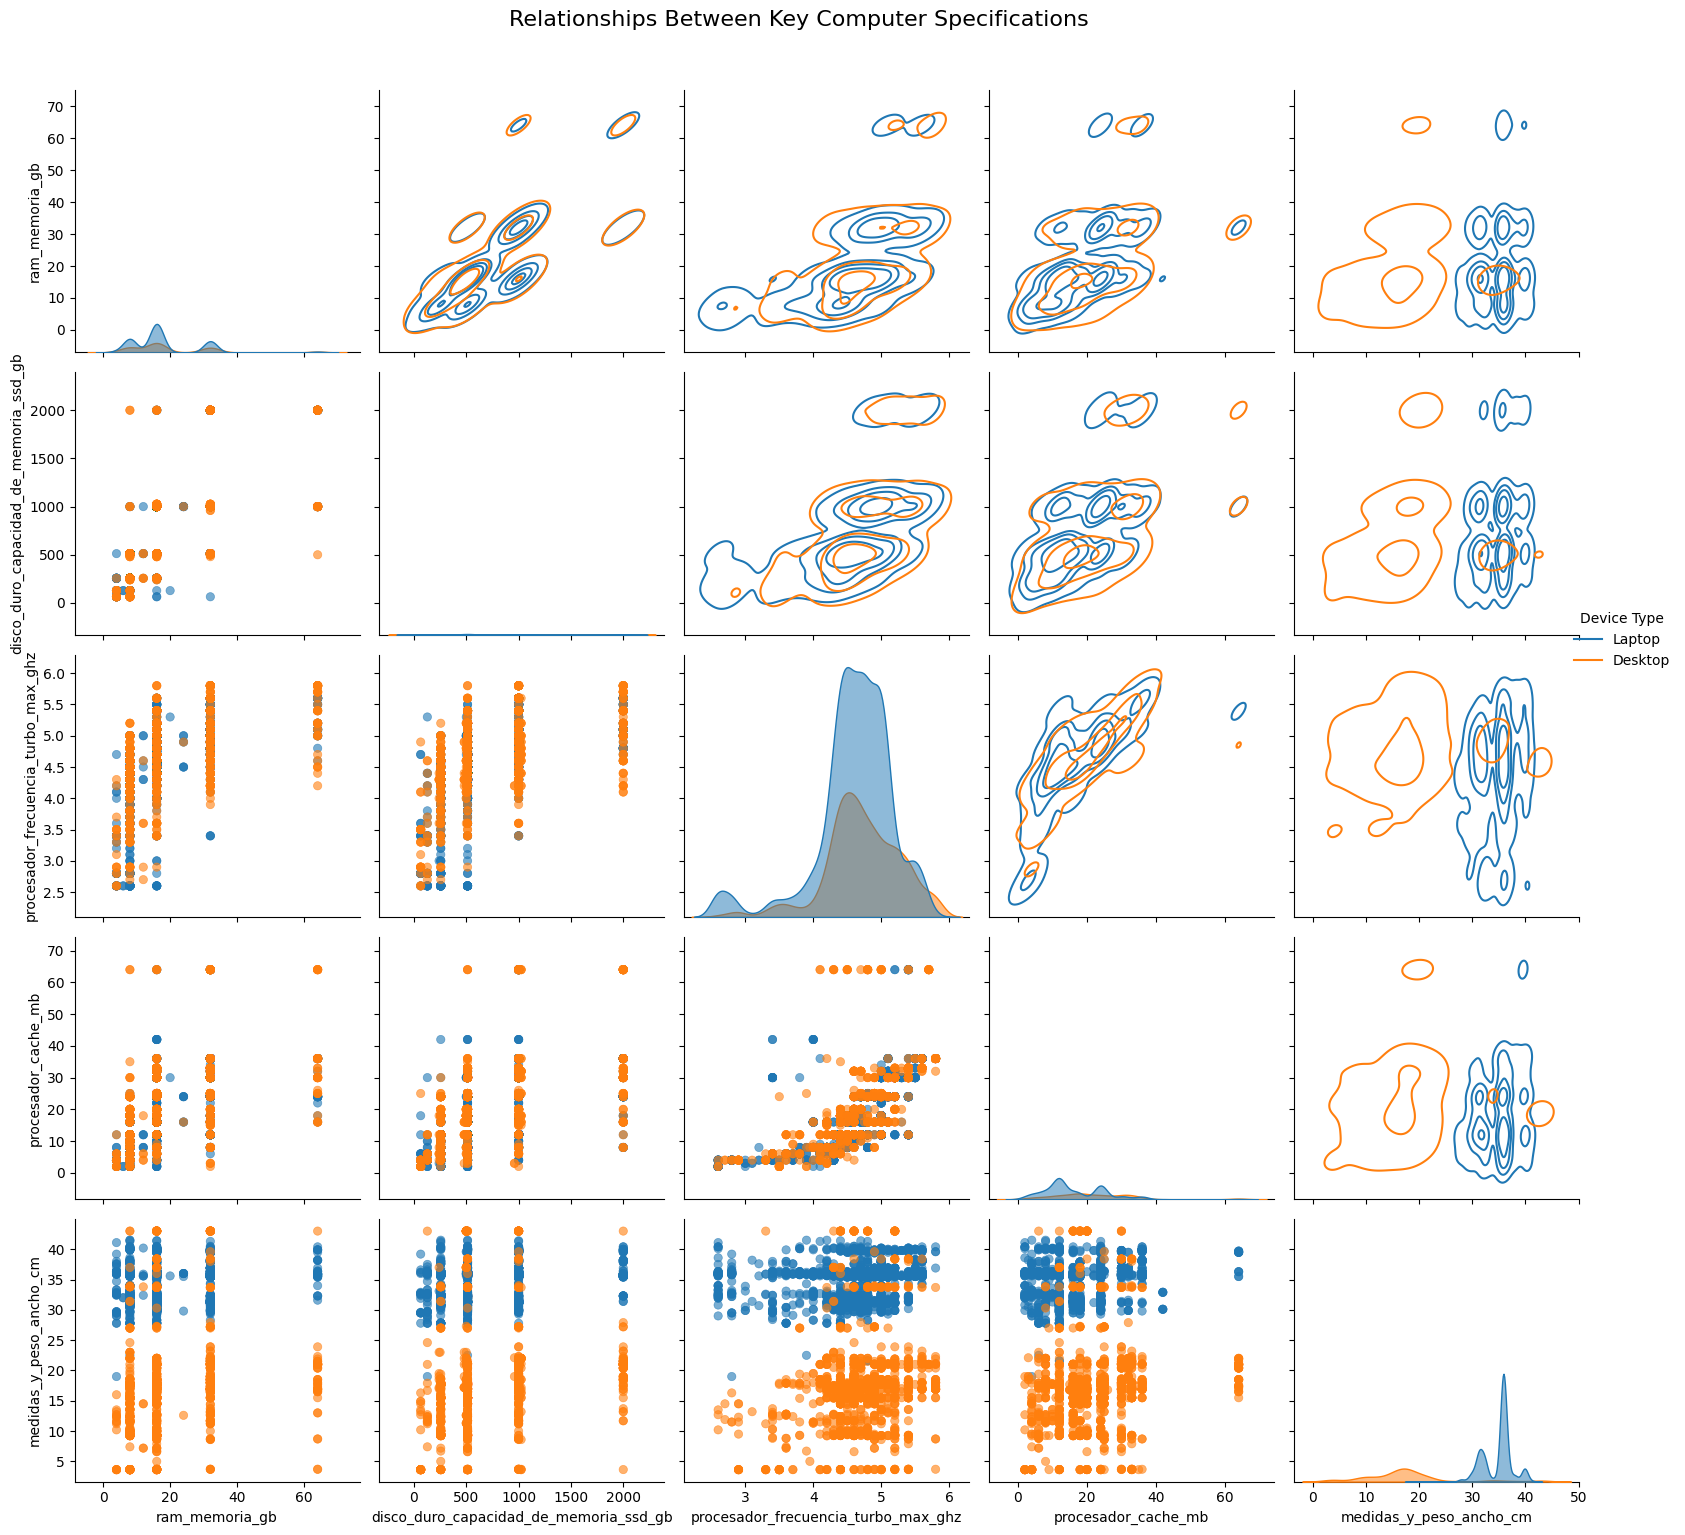

In [536]:
# Define the numeric variables to plot
numeric_vars = [
    'ram_memoria_gb',
    'disco_duro_capacidad_de_memoria_ssd_gb',
    'procesador_frecuencia_turbo_max_ghz',
    'procesador_cache_mb',
    'medidas_y_peso_ancho_cm'
]

# Create a clean subset of the data
plot_df = df[numeric_vars + ['tipo']].copy()

# Drop rows with null values in any of the selected columns
plot_df = plot_df.dropna()

# Optional: Cap extreme outliers to improve visualization
for col in numeric_vars:
    q1 = plot_df[col].quantile(0.01)
    q3 = plot_df[col].quantile(0.99)
    plot_df[col] = plot_df[col].clip(q1, q3)

# Create the PairGrid
g = sns.PairGrid(plot_df, vars=numeric_vars, hue='tipo', height=3)

# Configure diagonal (distribution) plots
g.map_diag(sns.kdeplot, fill=True, alpha=0.5)

# Configure scatter plots in the lower triangle
g.map_lower(sns.scatterplot, alpha=0.6, edgecolor=None)

# Configure contour plots in the upper triangle 
g.map_upper(sns.kdeplot, levels=5)

# Add a legend with a better position
g.add_legend(title='Device Type', bbox_to_anchor=(1.05, 0.6))

plt.suptitle('Relationships Between Key Computer Specifications', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

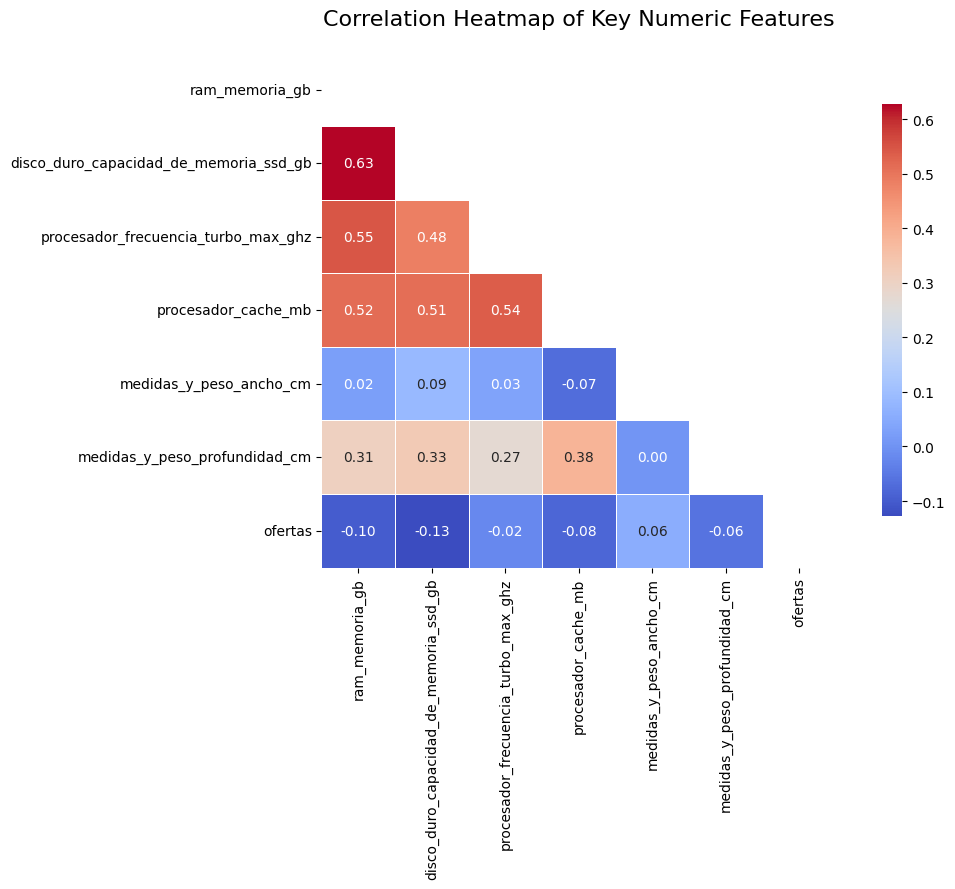

In [537]:
# Define the 7 numeric variables to include in the heatmap
numeric_vars = [
    'ram_memoria_gb',
    'disco_duro_capacidad_de_memoria_ssd_gb',
    'procesador_frecuencia_turbo_max_ghz',
    'procesador_cache_mb',
    'medidas_y_peso_ancho_cm',
    'medidas_y_peso_profundidad_cm',
    'ofertas'
]
# 1) Copy only those columns into a “clean” DF
df_clean = df[numeric_vars].copy()

 # Calculate correlation matrix
corr = df_clean.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 9))

# Create a mask for the upper triangle to make the heatmap more readable
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap with annotations
sns.heatmap(
    corr, 
    mask=mask,
    annot=True,           # Display correlation values
    fmt=".2f",            # Format as 2 decimal places
    cmap="coolwarm",      # Colormap: red for positive, blue for negative
    square=True,          # Make cells square
    linewidths=.5,        # Add lines between cells
    cbar_kws={"shrink": .8}
)

# Add labels and title
plt.title('Correlation Heatmap of Key Numeric Features', fontsize=16, pad=20)
plt.tight_layout()

# Show the plot
plt.show()

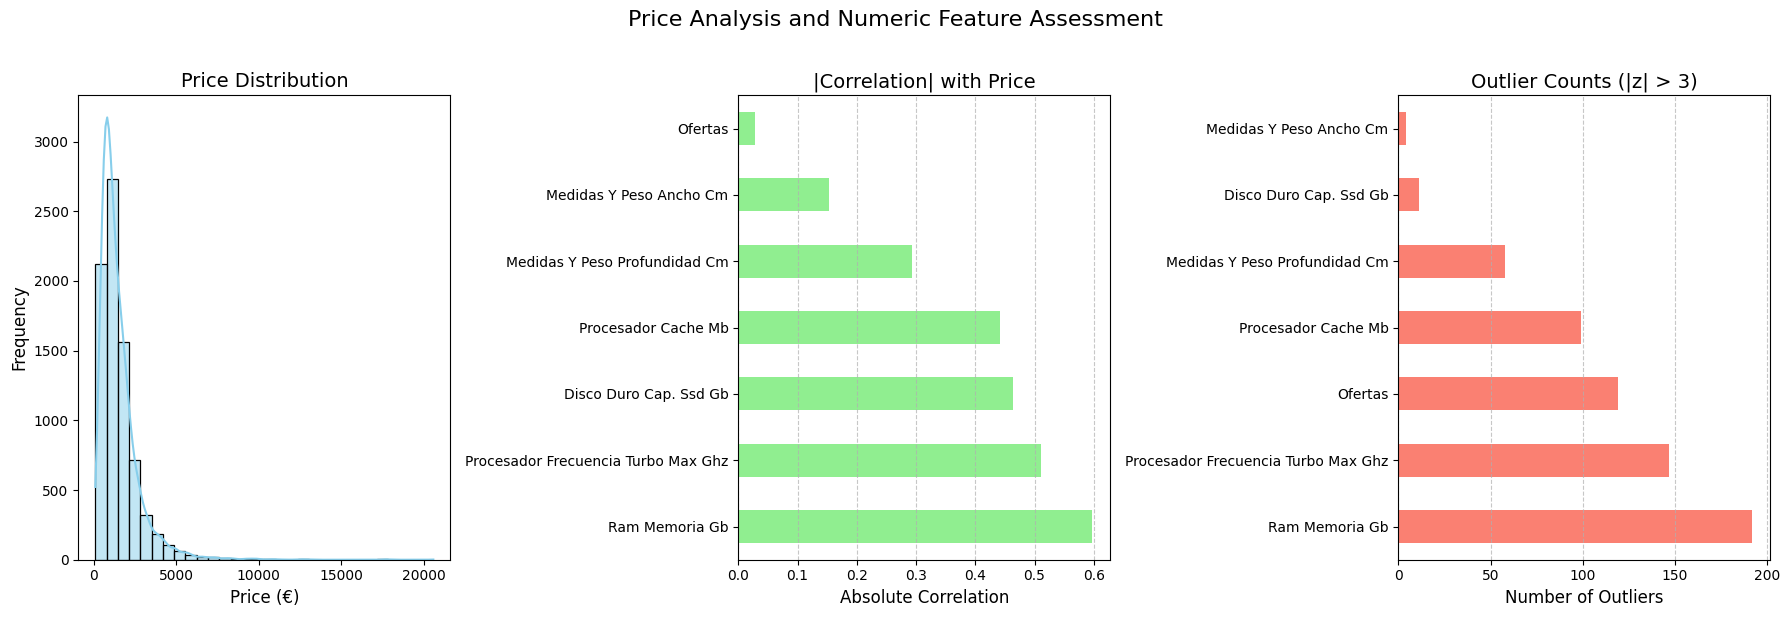

In [538]:
# Define the 7 numeric variables we want to analyze
numeric_vars = [
    'ram_memoria_gb',
    'disco_duro_capacidad_de_memoria_ssd_gb',
    'procesador_frecuencia_turbo_max_ghz',
    'procesador_cache_mb',
    'medidas_y_peso_ancho_cm',
    'medidas_y_peso_profundidad_cm',
    'ofertas'
]
# 1) Copy just the cols you’ll use—including precio_mean—into a clean df
df_clean = df[numeric_vars + ['precio_mean']].copy()

 # Create a 1×3 panel figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

 # Panel 1: Price distribution (histogram + KDE)

sns.histplot(df_clean['precio_mean'], kde=True, ax=axes[0], bins=30, color='skyblue')
axes[0].set_title('Price Distribution', fontsize=14)
axes[0].set_xlabel('Price (€)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

 # Panel 2: Correlations between numeric variables and price
# Calculate absolute correlations with price
corrs = df_clean[numeric_vars].corrwith(df_clean['precio_mean']).abs().sort_values(ascending=False)
# Create bar chart of correlations
corrs.plot.barh(ax=axes[1], color='lightgreen')
axes[1].set_title('|Correlation| with Price', fontsize=14)
axes[1].set_xlabel('Absolute Correlation', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Improve readability of variable names on y-axis
axes[1].set_yticklabels([var.replace('_', ' ').replace('capacidad de memoria', 'cap.').title() for var in corrs.index], fontsize=10)
 
 # Panel 3: Outlier counts (z-score > 3)
z_scores = df_clean[numeric_vars].apply(lambda x: (x - x.mean()) / x.std())

# Panel 3: Outlier counts (z-score > 3)
# Calculate z-scores for each numeric column and count values with |z| > 3
z_scores = df[numeric_vars].apply(lambda x: (x - x.mean()) / x.std())
outlier_counts = (z_scores.abs() > 3).sum().sort_values(ascending=False)

# Create bar chart of outlier counts
outlier_counts.plot.barh(ax=axes[2], color='salmon')
axes[2].set_title('Outlier Counts (|z| > 3)', fontsize=14)
axes[2].set_xlabel('Number of Outliers', fontsize=12)
axes[2].grid(axis='x', linestyle='--', alpha=0.7)

# Improve readability of variable names on y-axis
axes[2].set_yticklabels([var.replace('_', ' ').replace('capacidad de memoria', 'cap.').title() for var in outlier_counts.index], fontsize=10)

# Add overall title and adjust layout
plt.suptitle('Price Analysis and Numeric Feature Assessment', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/1444647028.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/1444647028.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/1444647028.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/1444647028.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a

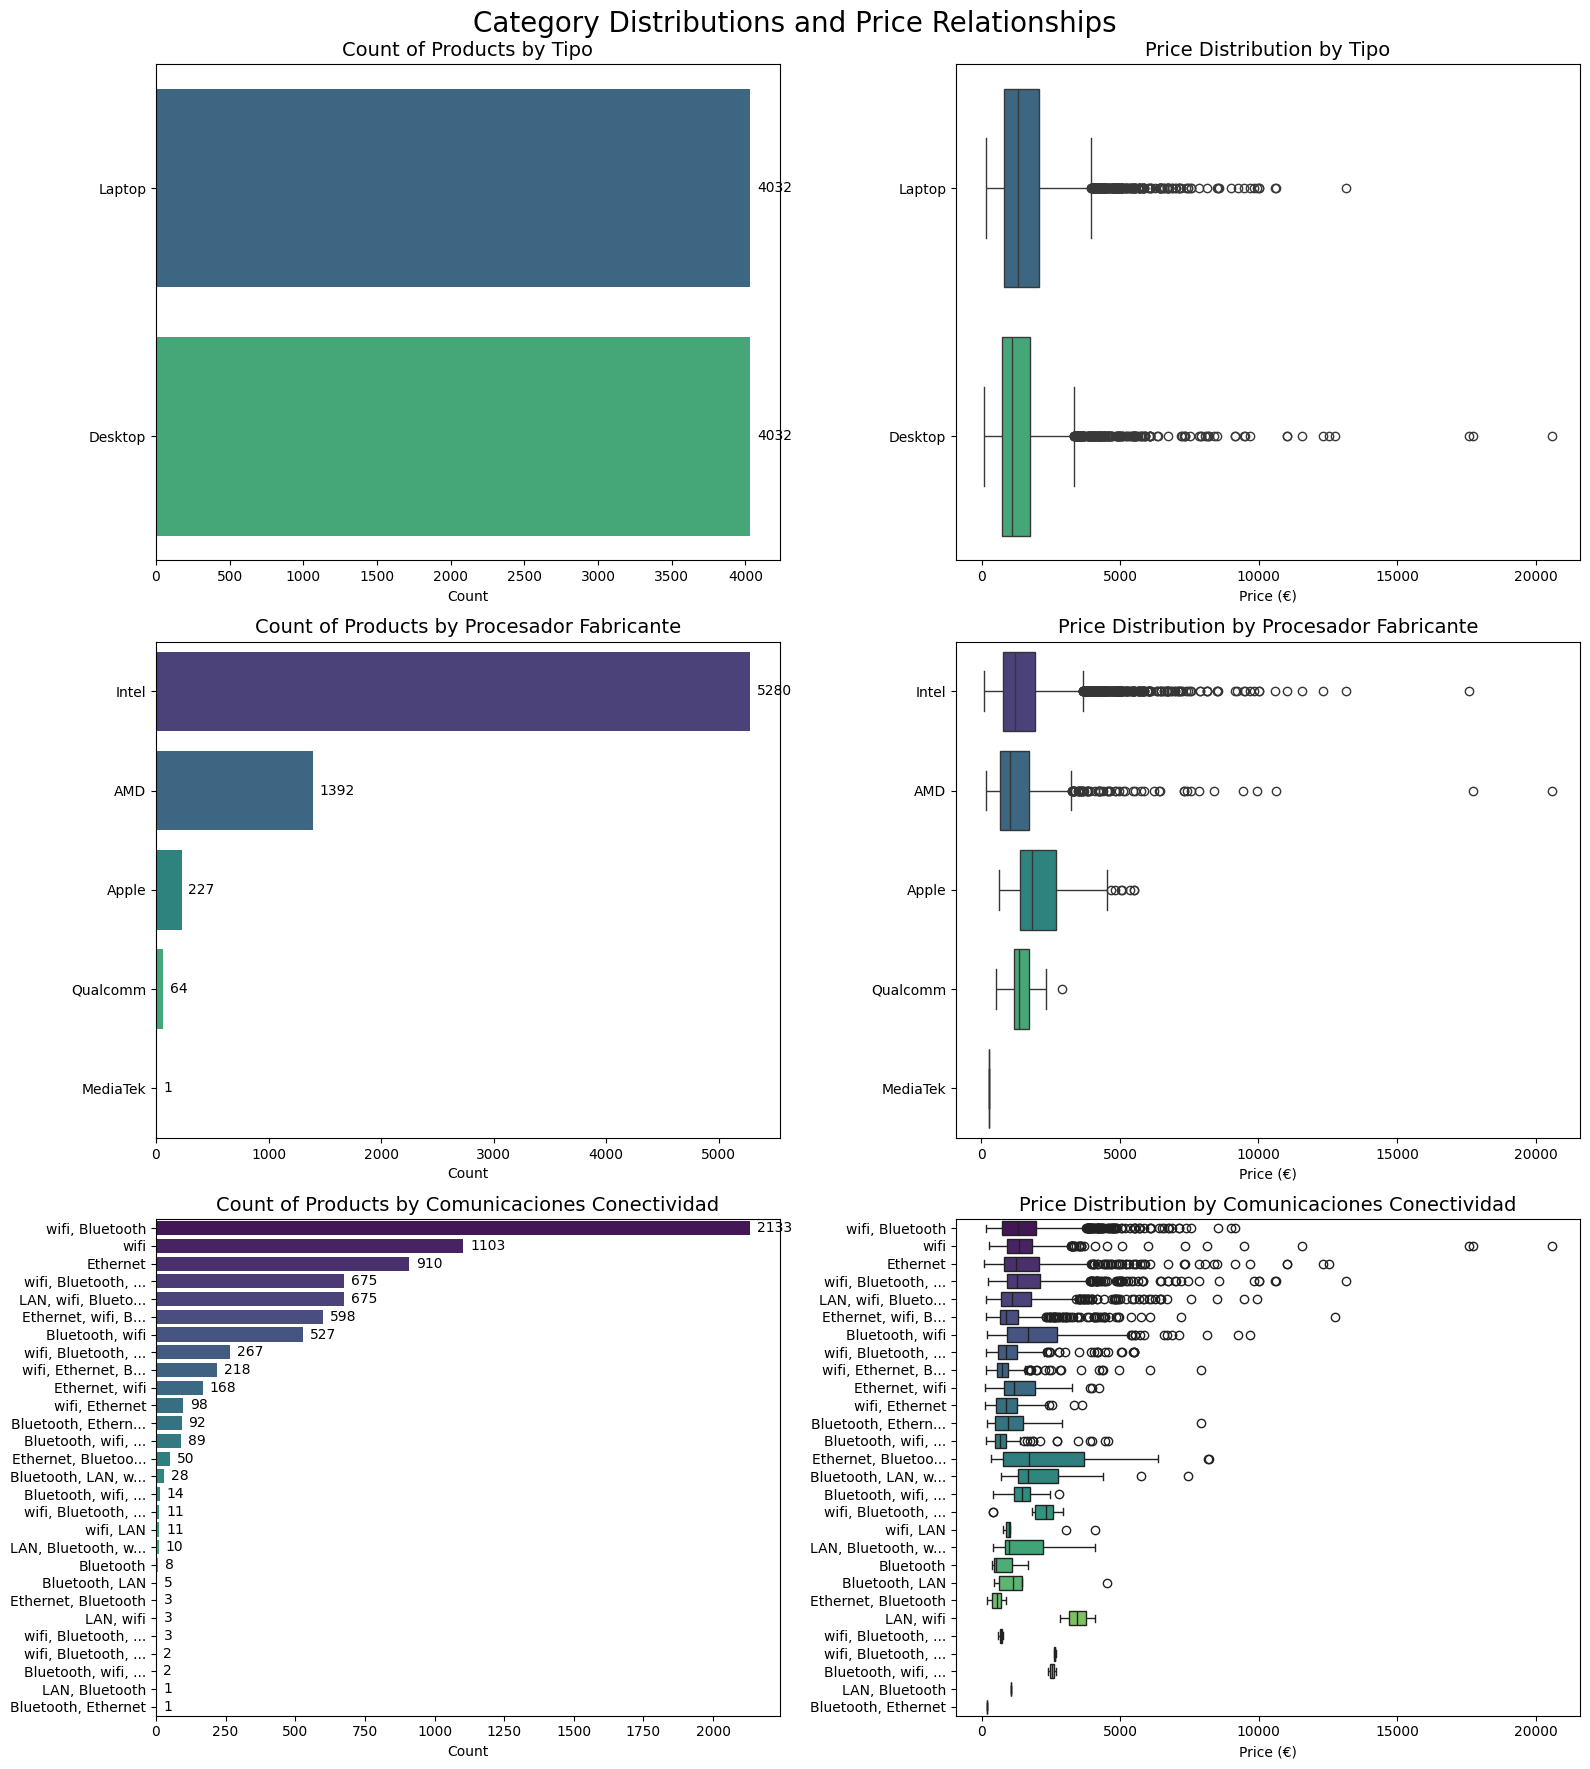

In [539]:
# Define the categorical variables to analyze
categorical_vars = ['tipo', 'procesador_fabricante', 'comunicaciones_conectividad']

# 1) Copy only those plus precio_mean into a clean df
df_clean = df[categorical_vars + ['precio_mean']].copy()

# Create a 3×2 grid of subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

 # For each categorical variable
for i, cat_var in enumerate(categorical_vars):
     # Left column: Count bar chart

    sns.countplot(
        y=cat_var, 
        data=df_clean,
         order=df[cat_var].value_counts().index,  # Order by frequency
         ax=axes[i, 0],
         palette='viridis'
     )
    axes[i, 0].set_title(f'Count of Products by {cat_var.replace("_", " ").title()}', fontsize=14)
    axes[i, 0].set_ylabel('')
    axes[i, 0].set_xlabel('Count')
    
    # Add count values at the end of each bar
    for p in axes[i, 0].patches:
        axes[i, 0].annotate(
            f'{int(p.get_width())}', 
            (p.get_width(), p.get_y() + p.get_height()/2),
            ha='left', va='center', 
            xytext=(5, 0), 
            textcoords='offset points'
        )
    
   # Right column: Boxplot of price by category

    sns.boxplot(
        y=cat_var, 
        x='precio_mean',
        data=df_clean,
         order=df[cat_var].value_counts().index, 
         ax=axes[i, 1],
         palette='viridis',
         orient='h'  # Horizontal orientation to match the bar chart
     )
    axes[i, 1].set_title(f'Price Distribution by {cat_var.replace("_", " ").title()}', fontsize=14)
    axes[i, 1].set_ylabel('')
    axes[i, 1].set_xlabel('Price (€)')

    # Improve readability of the categorical labels
    for ax in axes[i]:
        labels = [item.get_text() for item in ax.get_yticklabels()]
        # Truncate very long labels
        labels = [label if len(label) < 20 else label[:17] + '...' for label in labels]
        ax.set_yticklabels(labels)
    
# Add a main title
plt.suptitle('Category Distributions and Price Relationships', fontsize=20, y=0.98)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

From the plot above, we are given quite a bit of information, including a lot of outliers. Let's take a look here.


--- Visualizing the Distribution and Outliers of 'precio_mean' for Laptops ---


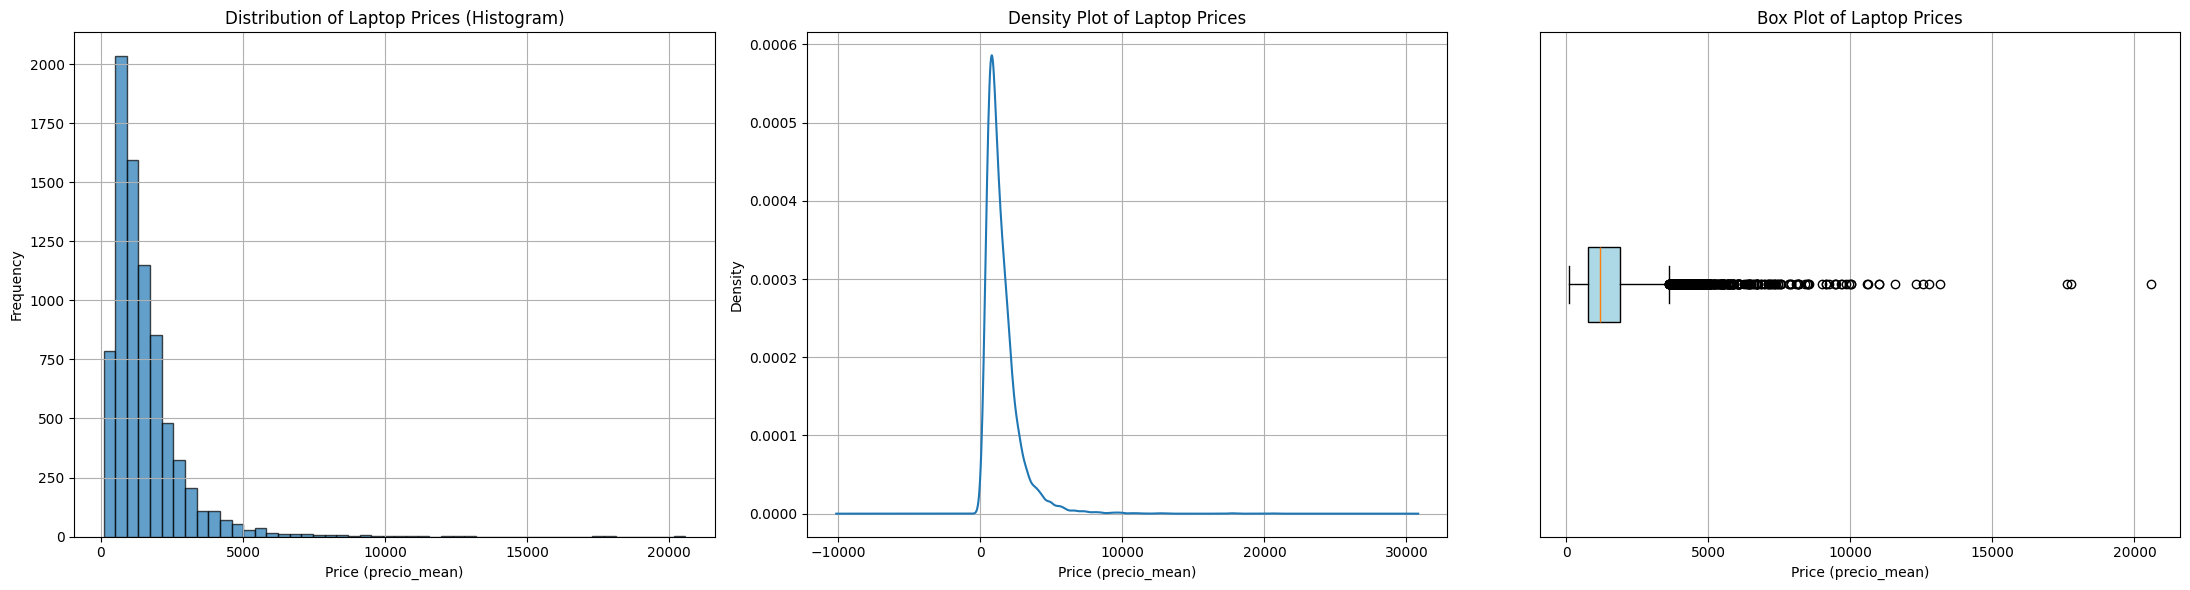

Histogram, density plot, and box plot of 'precio_mean' displayed.
Points beyond the whiskers in the box plot are potential outliers.


In [540]:
# Assuming df_laptop is loaded and 'precio_mean' exists
if 'df_clean' in globals() and not df_clean.empty and 'precio_mean' in df_clean.columns:
    print("\n--- Visualizing the Distribution and Outliers of 'precio_mean' for Laptops ---")
    
    # Create a figure and a set of subplots for three plots side-by-side
    fig, axes = plt.subplots(1, 3, figsize=(22, 6)) # 1 row, 3 columns

    # Plot histogram on the first subplot
    axes[0].hist(df_clean['precio_mean'].dropna(), bins=50, edgecolor='k', alpha=0.7)
    axes[0].set_title('Distribution of Laptop Prices (Histogram)')
    axes[0].set_xlabel('Price (precio_mean)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True)
    
    # Plot density plot on the second subplot
    df_clean['precio_mean'].dropna().plot(kind='density', ax=axes[1])
    axes[1].set_title('Density Plot of Laptop Prices')
    axes[1].set_xlabel('Price (precio_mean)')
    axes[1].grid(True)
    
    # Plot box plot on the third subplot
    axes[2].boxplot(df_clean['precio_mean'].dropna(), vert=False, patch_artist=True,
                    boxprops=dict(facecolor='lightblue'))
    axes[2].set_title('Box Plot of Laptop Prices')
    axes[2].set_xlabel('Price (precio_mean)')
    axes[2].set_yticks([]) # Hides the y-axis tick as it's a horizontal boxplot
    axes[2].grid(True)
    
    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()
    print("Histogram, density plot, and box plot of 'precio_mean' displayed.")
    print("Points beyond the whiskers in the box plot are potential outliers.")

else:
    print("df_clean not available or 'precio_mean' column is missing for plotting.")


In [541]:
# Assuming df_laptop is loaded and 'precio_mean' exists
if 'df_clean' in globals() and not df_clean.empty and 'precio_mean' in df_clean.columns:
    print("\n--- Identifying Outliers in 'precio_mean' using IQR Rule ---")
    precio_data = df_clean['precio_mean'].dropna() # Work with non-missing data

    Q1 = precio_data.quantile(0.25)
    Q3 = precio_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    print(f"First Quartile (Q1): {Q1:.2f}")
    print(f"Third Quartile (Q3): {Q3:.2f}")
    print(f"Interquartile Range (IQR): {IQR:.2f}")
    print(f"Lower Fence for Outliers: {lower_fence:.2f}")
    print(f"Upper Fence for Outliers: {upper_fence:.2f}")

    # Identify outliers
    outliers_iqr = precio_data[(precio_data < lower_fence) | (precio_data > upper_fence)]
    
    if not outliers_iqr.empty:
        print(f"\nFound {len(outliers_iqr)} potential outliers using the IQR rule:")
        print(outliers_iqr)
    else:
        print("\nNo outliers found using the IQR rule.")
    
    # Percentage of outliers
    percentage_outliers = (len(outliers_iqr) / len(precio_data)) * 100
    print(f"Percentage of data points identified as outliers: {percentage_outliers:.2f}%")

else:
    print("df_clean not available or 'precio_mean' column is missing for IQR outlier detection.")


--- Identifying Outliers in 'precio_mean' using IQR Rule ---
First Quartile (Q1): 746.48
Third Quartile (Q3): 1889.95
Interquartile Range (IQR): 1143.47
Lower Fence for Outliers: -968.74
Upper Fence for Outliers: 3605.16

Found 437 potential outliers using the IQR rule:
54       4335.83
72       4737.68
100      3742.07
204      8144.26
211      3665.15
229      3686.09
238      3647.12
308      3677.61
321      4647.26
359      3789.36
411      3775.20
453      4206.06
485      3814.82
494      4445.59
528      5730.30
536      4448.21
556      6702.58
569      5410.02
572      4527.82
574      3717.69
581      3981.57
591      4460.49
596      7433.80
615      3883.99
623      4399.00
630      4088.65
646      6686.98
654      5149.00
705      7847.66
714      4299.00
719      3691.82
740      5799.00
787      7376.36
795      9450.06
831      4666.30
834      4726.27
837      3796.92
842      5206.88
854      3903.73
892      4299.00
913      3723.93
924      4180.93
935      6973.

We can see there are a lot of computers that would be traditionally considered "outliers" upon further inspection (looking up the copmuters), the outliers in this dataset are correct in their prices and are not mis-inputs. We therefore should not drop them as they help represent the high tier computers. This information is helpful, and potential indicators that we may need to log transform our data for the predictive model

## Exploring Missing values and their relationships

The dataset is more presentable now, in terms column names, row values (they dont contain the units, numerical values are fixed to have the correct float form). The next step is staring us right in the face when we look at the data, and it's the missing values. 

In [542]:
num_columns = df.shape[1]
print(f"The number of columns in the dataset is: {num_columns}")

The number of columns in the dataset is: 139


Let's take a look on the columns and their corresponding missing value percentage

In [543]:
#Quanitifying missingness
pd.set_option('display.max_rows', None)  # Show all rows

missing_frac = df.isna().mean().sort_values(ascending=False)
missing_pct = missing_frac * 100
print(missing_pct[missing_pct > 0])



almacenamiento_velocidades_de_escritura                   99.975198
almacenamiento_velocidades_de_lectura                     99.975198
procesador_procesadores_compatibles                       99.925595
sistema_operativo_software_incluido                       99.925595
otras_caracteristicas_certificado_rohs                    99.913194
ia_funcion                                                99.900794
otras_caracteristicas_portatil_configurable               99.875992
propiedades_de_la_carcasa_material_de_la_carcasa          99.863591
otras_caracteristicas_caracteristicas_de_la_carcasa       99.838790
almacenamiento_formato_audiovisual_compatible             99.838790
comunicaciones_caracteristicas_del_bluetooth              99.826389
otras_caracteristicas_expansion_de_hardware               99.813988
procesador_chipset                                        99.801587
propiedades_de_la_carcasa_bahia_externa_de_3_5            99.789187
propiedades_de_la_carcasa_superficie_del_materia

we have 139 columns of which 137 columns have missing values, and no column have completely missing values. percentages of missing values ranging from almost the whole column as empty (99.97%) to a very little irrelevant portion like 1.6%. this suggest that:
- some data is missing completely at random 
- some might be missing at random
- some data is not missing at random
we have to diagmnose where and why values are missing for before choosing how to handel the missing values.

Based on a deep look at the dataset, we can make an educated assumption that the "tipo" or "tipo_de_producto" may have a strong coorelation with the number of missing values for that product type. For example, we would not have any "screen size" for a "Desktop". Additionally, it would greatly benefit data and schema handling in the frontend/database if we determine missingness based on these categories. So, let's visualize this in effect by using the "top50" columns with the most amount of missingness: 

#### Diagnosing missing values relationship with product type

In [544]:
print("================================================================")
print("              Unique values in 'tipo_de_producto':              ")
print("================================================================")
print(df['tipo_de_producto'].unique())
print("\nnumber of unique values in 'tipo_de_producto': ", len(df['tipo_de_producto'].unique()))
print("\n===============================================================")
print("                    Unique values in 'tipo':                    ")
print("===============================================================")
print(df['tipo'].unique())
print("\nnumber of unique values in 'tipo': ", len(df['tipo'].unique()))


              Unique values in 'tipo_de_producto':              
['Portátil multimedia' 'Portátil gaming' 'Portátil profesional' nan
 'Ultrabook' 'Portátil convertible' 'Netbook' 'Portátil 3D' 'Chromebook'
 'Mini PC' 'PC multimedia' 'PC gaming' 'PC de oficina' 'Workstation'
 'Barebone' 'PC completo' 'Thin Client' 'Kit ampliación PC']

number of unique values in 'tipo_de_producto':  18

                    Unique values in 'tipo':                    
['Laptop' 'Desktop']

number of unique values in 'tipo':  2


We can see that there are quite the difference between the number of unique values in "tipo_de_producto" and "tipo". Lets explore the missingness based on both these columns.

In [545]:
miss_frac = df.isnull().mean().sort_values(ascending=False)
top50 = miss_frac.head(50).index.tolist()

# Calculate missingness grouped by 'tipo'
product_types_tipo = df['tipo'].unique() # Make sure 'tipo' is clean (no NaNs if possible, or handle them)
missing_by_tipo = {}

for p_type in product_types_tipo:
    if pd.isna(p_type): # Skip if p_type is NaN
        continue
    df_subset = df[df['tipo'] == p_type]
    missing_percentages = df_subset[top50].isnull().mean() * 100
    missing_by_tipo[p_type] = missing_percentages

missing_summary_df_tipo = pd.DataFrame(missing_by_tipo)
if not missing_summary_df_tipo.empty:
    missing_summary_df_tipo = missing_summary_df_tipo.T
else:
    print("Warning: missing_summary_df_tipo is empty. Check 'tipo' column and its unique values.")

In [546]:
# Calculate missingness grouped by 'tipo_de_producto'
product_types_detalle = df['tipo_de_producto'].unique() # Make sure 'tipo_de_producto' is clean
missing_by_tipo_de_producto = {}

for p_type_detalle in product_types_detalle:
    if pd.isna(p_type_detalle): # Skip if p_type_detalle is NaN
        continue
    df_subset = df[df['tipo_de_producto'] == p_type_detalle]
    missing_percentages = df_subset[top50].isnull().mean() * 100 # Using the same top50 overall missing columns
    missing_by_tipo_de_producto[p_type_detalle] = missing_percentages

missing_summary_df_tipo_de_producto = pd.DataFrame(missing_by_tipo_de_producto)
if not missing_summary_df_tipo_de_producto.empty:
    missing_summary_df_tipo_de_producto = missing_summary_df_tipo_de_producto.T
else:
    print("Warning: missing_summary_df_tipo_de_producto is empty. Check 'tipo_de_producto' column.")

In [547]:
# Assuming top50, missing_summary_df_tipo, and missing_summary_df_tipo_de_producto are already defined.
# And pandas is imported as pd.

print("\n" + "="*50)
print("Comparative Missingness Analysis".center(50))
print("="*50 + "\n")

# --- Safety checks for empty DataFrames ---
if missing_summary_df_tipo.empty and missing_summary_df_tipo_de_producto.empty:
    print("Both summary DataFrames are empty. Cannot perform comparison.")
elif missing_summary_df_tipo.empty:
    print("Warning: 'missing_summary_df_tipo' is empty. Comparison will be one-sided.")
elif missing_summary_df_tipo_de_producto.empty:
    print("Warning: 'missing_summary_df_tipo_de_producto' is empty. Comparison will be one-sided.")

# Select a few columns from top50 for a focused comparison
# You can change this to columns you are particularly interested in
columns_for_comparison = top50[:20] # Let's compare the top 10 most missing overall

for column_name in columns_for_comparison:
    print(f"\n--- Feature: {column_name} ---")

    # Comparison using 'tipo'
    print("  Missing % by 'tipo':")
    if not missing_summary_df_tipo.empty and column_name in missing_summary_df_tipo.columns:
        for tipo_cat, percentage in missing_summary_df_tipo[column_name].items():
            print(f"    - {tipo_cat}: {percentage:.2f}%")
    elif not missing_summary_df_tipo.empty:
        print(f"    Column '{column_name}' not found in 'tipo' summary (this usually means it had 0% missing for all 'tipo' categories).")
    else:
        print("    'tipo' summary is empty.")


    # Comparison using 'tipo_de_producto'
    print("\n  Missing % by 'tipo_de_producto':")
    if not missing_summary_df_tipo_de_producto.empty and column_name in missing_summary_df_tipo_de_producto.columns:
        for tipo_detalle_cat, percentage in missing_summary_df_tipo_de_producto[column_name].items():
            # To make it more readable, only show if the percentage is significantly high or low, or just show all
            print(f"    - {tipo_detalle_cat}: {percentage:.2f}%")
    elif not missing_summary_df_tipo_de_producto.empty:
         print(f"    Column '{column_name}' not found in 'tipo_de_producto' summary (this usually means it had 0% missing for all 'tipo_de_producto' categories).")
    else:
        print("    'tipo_de_producto' summary is empty.")
    print("-" * 30)

print("\n" + "="*50)
print("End of Comparative Analysis".center(50))
print("="*50)



         Comparative Missingness Analysis         


--- Feature: almacenamiento_velocidades_de_escritura ---
  Missing % by 'tipo':
    - Laptop: 99.95%
    - Desktop: 100.00%

  Missing % by 'tipo_de_producto':
    - Portátil multimedia: 99.90%
    - Portátil gaming: 100.00%
    - Portátil profesional: 100.00%
    - Ultrabook: 100.00%
    - Portátil convertible: 100.00%
    - Netbook: 100.00%
    - Portátil 3D: 100.00%
    - Chromebook: 100.00%
    - Mini PC: 100.00%
    - PC multimedia: 100.00%
    - PC gaming: 100.00%
    - PC de oficina: 100.00%
    - Workstation: 100.00%
    - Barebone: 100.00%
    - PC completo: 100.00%
    - Thin Client: 100.00%
    - Kit ampliación PC: 100.00%
------------------------------

--- Feature: almacenamiento_velocidades_de_lectura ---
  Missing % by 'tipo':
    - Laptop: 99.95%
    - Desktop: 100.00%

  Missing % by 'tipo_de_producto':
    - Portátil multimedia: 99.90%
    - Portátil gaming: 100.00%
    - Portátil profesional: 100.00%
    - Ultrabo

We can see that there is a common trend between a specific column and its relationship to the "tipo" or "tipo de producto" column. For example:

--- Feature: pantalla_displayglas ---

Missing % by **'tipo'**:
- Laptop: 99.13%
- Desktop: 100.00%

Missing % by **'tipo_de_producto'**:
- Portátil multimedia: 98.19%
- Portátil gaming: 100.00%
- Portátil profesional: 100.00%
- Ultrabook: 100.00%
- Portátil convertible: 100.00%
- Netbook: 100.00%
- Portátil 3D: 100.00%
- Chromebook: 100.00%
- Mini PC: 100.00%
- PC multimedia: 100.00%
- PC gaming: 100.00%
- PC de oficina: 100.00%
- Workstation: 100.00%
- Barebone: 100.00%
- PC completo: 100.00%
- Thin Client: 100.00%
- Kit ampliación PC: 100.00%
------------------------------

The "pantalla_displayglas", meaning the type of glass the screen uses is evidently unique to "Portátil multimedia" and therefore the "Laptop" column, as Desktops will not have any screen-specific features. We have a general understanding that there are columns specifically dependent on the type of a product, but it's not too clear what the difference is between the missingness of columns and their relationship with "tipo" or "tipo_de_producto". A visualization may help us understand a bit better:

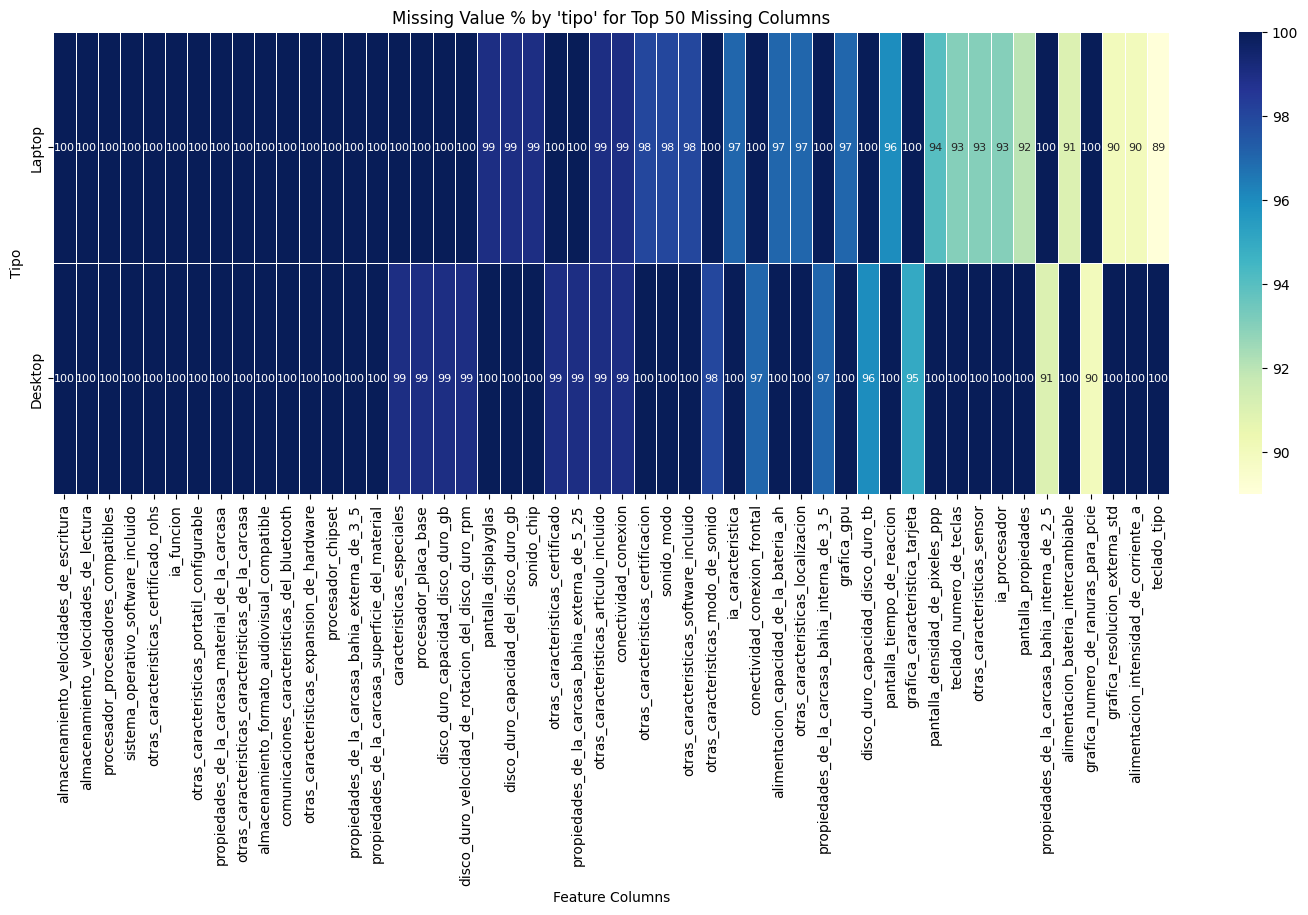

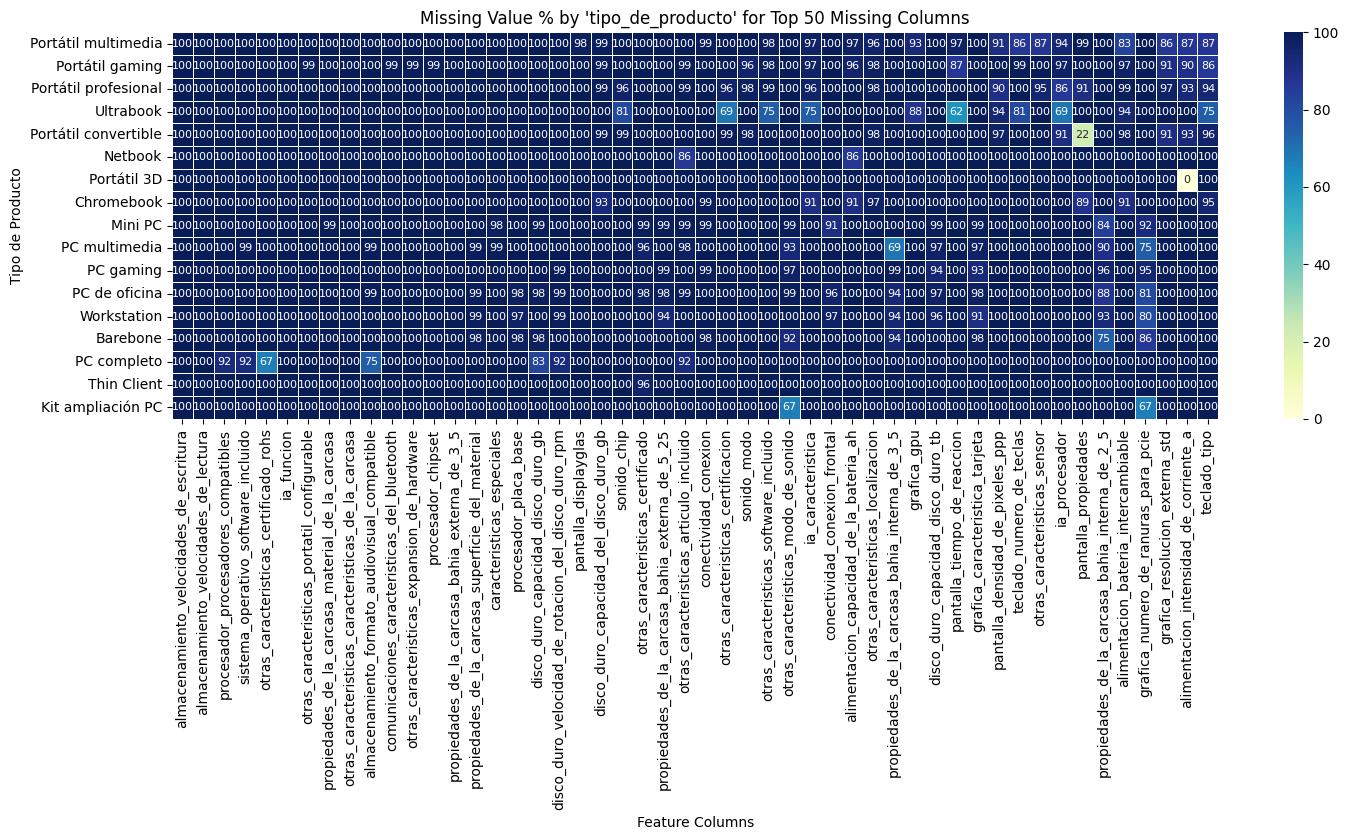

In [548]:
if not missing_summary_df_tipo.empty:
    plt.figure(figsize=(18, 6)) # Adjust as needed
    sns.heatmap(
        missing_summary_df_tipo.astype(float).round(0).astype(int), 
        annot=True, 
        cmap="YlGnBu", 
        fmt="d", 
        linewidths=.5, 
        annot_kws={"size": 8}
        )
    plt.title("Missing Value % by 'tipo' for Top 50 Missing Columns")
    plt.xlabel("Feature Columns")
    plt.ylabel("Tipo")
    plt.show()

if not missing_summary_df_tipo_de_producto.empty:
    # Calculate dynamic figsize
    num_rows = missing_summary_df_tipo_de_producto.shape[0]
    num_cols = missing_summary_df_tipo_de_producto.shape[1]
    
    # Basic heuristic:
    fig_width = max(15, num_cols * 0.3) 
    fig_height = max(8, num_rows * 0.5)
    
    plt.figure(figsize=(fig_width, fig_height))
    
    # Create a copy to ensure the original DataFrame is not modified
    df_for_heatmap = missing_summary_df_tipo_de_producto.astype(float).round(0).astype(int)
    sns.heatmap(
        df_for_heatmap, 
        annot=True, 
        cmap="YlGnBu", 
        fmt="d", 
        linewidths=.6, 
        annot_kws={"size": 8}
        ) # fmt="d" is good with int data  
    plt.title("Missing Value % by 'tipo_de_producto' for Top 50 Missing Columns")
    plt.xlabel("Feature Columns")
    plt.ylabel("Tipo de Producto")
    plt.xticks(rotation=90) # Rotate x-axis labels if they overlap
    plt.yticks(rotation=0)
    plt.tight_layout() # Adjust layout to prevent labels from being cut off
    plt.show()

This may be quite an eye-sore at first glance, however taking a look at the results, we can see that the top 50 columns with missing values have quite the relationship with both the "tipo_de_producto" and "tipo" with more of a coorelation with the "tipo_de_producto" because of the variance in missingness. Now we are presented with a common challenge in the field of data analytics. Deciding the following:

- Should we split the dataset at all?
- If we do split the dataset, do we choose to split based on "tipo_de_producto", "tipo", or maybe make our own categories?

So let's discuss the pros and cons:

**- Splitting by tipo_de_producto (14 categories):**

**Pro:** Highly specific. Allows to accurately identify and potentially remove columns that are truly irrelevant for each specific product subtype (e.g., "Screen Brightness" is irrelevant for a "Mini PC" that doesn't come with a screen). This leads to cleaner, more focused datasets for each subtype.

**Con:** Can result in very small datasets for some subtypes (like your "Ultrabook" example with ~15 rows). Analyzing or drawing reliable conclusions from such small samples is very difficult and prone to noise. Managing 14 separate analytical workflows can also become complex.

**- Splitting by tipo (2 categories: 'Desktop', 'Laptop'):**

**Pro:** Keeps datasets larger and more statistically robust. Simpler to manage. Still allows for significant column pruning (e.g., features specific to built-in batteries or integrated screens are mostly relevant to Laptops).

**Con:** Less granular. Within the "Laptop" category, you still have diverse types like 'Portátil gaming' and 'Chromebook' which might have different relevant specs. You can't remove columns as aggressively because a feature might be irrelevant for one subtype but essential for another within the same broad "Laptop" or "Desktop" group.

**- Hybrid approach, create new column called "cateogory" based on tipo_de_producto (5 categories):**

**Pro:** Working with 4-5 well-defined categories is significantly easier for analysis, visualization, and eventually, modeling compared to 14 categories, and does not rely only on two categorties which may not capture the nuances between different types of data.

**Con:** Added complexity, we would now have to work with multiple different categories and potentially different learning models because of it.

#### The Verdict

Taking all pros and cons into consideration, the best fit for our application is the third option—the **Hybrid Approach**. It’s nuanced enough to distinguish between “component kits” and fully built desktop PCs, which shouldn’t be intermixed when making predictions specifically tailored to complete systems. Beyond helping us address missing values, it acknowledges that our product types are fundamentally different and lets us define separate schemas for training accurate models.

This clarity also benefits our frontend clients: we’ll present analytics for five distinct categories, each with its own price-range calculations. To underscore why this split matters, we can compare the average prices of “PC\_gaming,” “Portátil\_gaming,” and “Kit\_ampliación\_PC,” which—with our hybrid approach—would reside in separate categories.


In [549]:
# Define the product types we are interested in
target_product_types = {
    "PC_gaming": "PC gaming",
    "Portatil_gaming": "Portátil gaming",
    "Kit_ampliacion_PC": "Kit ampliación PC"
}

average_prices = {}
product_counts = {}

# Calculate average price for each target product type
for custom_name, actual_name in target_product_types.items():
    # Filter for the current product type
    subset_df = df[df['tipo_de_producto'] == actual_name].copy()
    
    # Ensure 'precio_mean' is numeric for calculations
    # and drop rows where 'precio_mean' became NaN after conversion or was already NaN
    subset_df['precio_mean'] = pd.to_numeric(subset_df['precio_mean'], errors='coerce')
    subset_df.dropna(subset=['precio_mean'], inplace=True)
    
    if not subset_df.empty:
        average_prices[custom_name] = subset_df['precio_mean'].mean()
        product_counts[custom_name] = len(subset_df)
    else:
        average_prices[custom_name] = None 
        product_counts[custom_name] = 0

print("Comparison of Average Prices:\n" + "="*30)

if all(count > 0 for count in product_counts.values()): # Check if all categories have data
    # Gaming PC vs. Gaming Laptop
    if average_prices["PC_gaming"] is not None and average_prices["Portatil_gaming"] is not None:
        price_diff_pc_laptop = average_prices["PC_gaming"] - average_prices["Portatil_gaming"]
        higher_or_lower = "higher" if price_diff_pc_laptop > 0 else "lower"
        if price_diff_pc_laptop == 0:
             comparison_text = "the same as"
        else:
            comparison_text = f"{abs(price_diff_pc_laptop):,.2f} {higher_or_lower} than"

        print(f"The average price for 'PC gaming' (based on {product_counts['PC_gaming']} items) is {average_prices['PC_gaming']:,.2f}.")
        print(f"The average price for 'Portátil gaming' (based on {product_counts['Portatil_gaming']} items) is {average_prices['Portatil_gaming']:,.2f}.")
        print(f"  -> 'PC gaming' average price is {comparison_text} 'Portátil gaming'.\n")
    else:
        if average_prices["PC_gaming"] is not None:
             print(f"The average price for 'PC gaming' (based on {product_counts['PC_gaming']} items) is {average_prices['PC_gaming']:,.2f}.")

    # Kit de ampliación PC
    if average_prices["Kit_ampliacion_PC"] is not None:
        print(f"The average price for 'Kit ampliación PC' (based on {product_counts['Kit_ampliacion_PC']} items) is {average_prices['Kit_ampliacion_PC']:,.2f}.")
    else:
        print(f"'Kit ampliación PC': No data or no valid prices found ({product_counts['Kit_ampliacion_PC']} items).")

print("="*30)

Comparison of Average Prices:
The average price for 'PC gaming' (based on 1789 items) is 1,685.53.
The average price for 'Portátil gaming' (based on 773 items) is 2,294.79.
  -> 'PC gaming' average price is 609.27 lower than 'Portátil gaming'.

The average price for 'Kit ampliación PC' (based on 3 items) is 479.64.


For our example on the hybrid approach, we can see there is a clear difference between the prices between laptops, pcs, and extra component kits beacuase they are simply different technologies that have their unqiue customer bases and purposes. The price is an extremely important part of our dataset as it is the single most important determinant is a consumer would purchase and use a certain product. Therefore we can proceed to split our data based on this hybrid approach.

### Exploring the data using a hybrid approach (custom_category) 

Taking a look at the "tipo_de_product" unique values we can determine the common traits between each type of product to determine how we are going to split up our data. Let's take a look using a dendrogram.

#### Dendrogram for product types

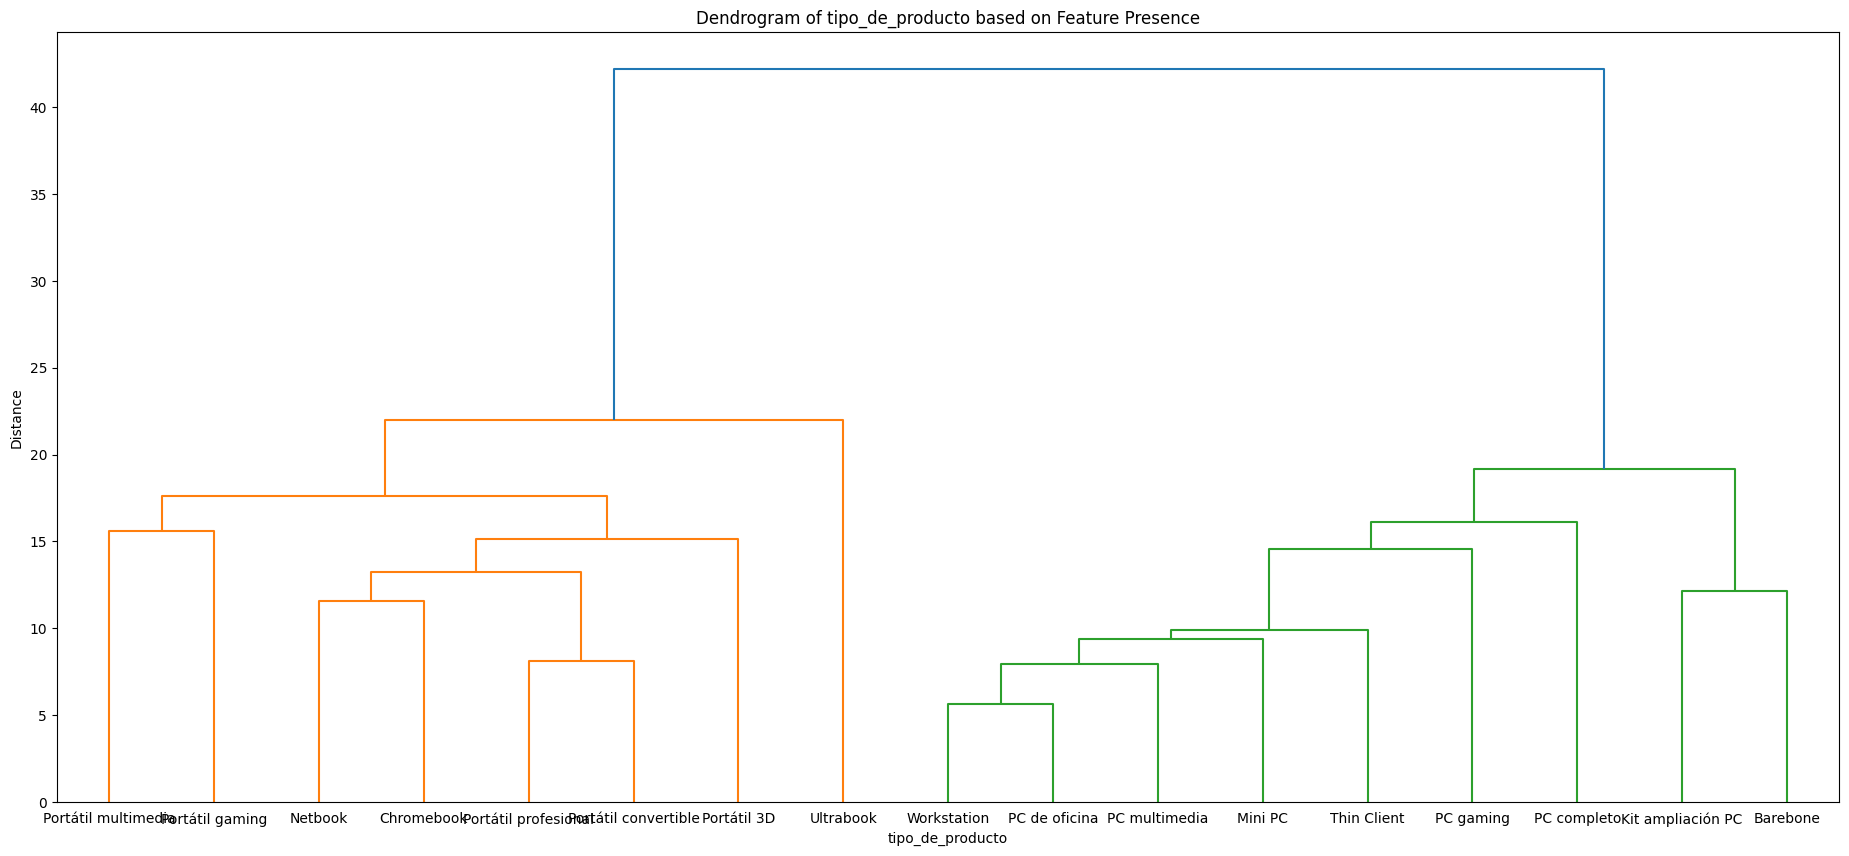

In [550]:
# Get a list of relevant specification columns
spec_columns = [col for col in df.columns if col not in ['tipo_de_producto']]

# Group by 'tipo_de_producto' and calculate the mean of non-null values (1 for present, 0 for missing)
# This gives the proportion of non-missing values for each spec column within each product type
product_type_profiles = df.groupby('tipo_de_producto')[spec_columns].apply(lambda x: x.notnull().mean())

# Handle potential NaNs in profiles
product_type_profiles = product_type_profiles.fillna(0) 

# Now 'product_type_profiles' DataFrame has:
# - Rows: Each unique 'tipo_de_producto'
# - Columns: Each 'spec_column'
# - Values: The proportion of times that spec is present for that product type.

scaler = StandardScaler()
scaled_profiles = scaler.fit_transform(product_type_profiles)

linked = linkage(scaled_profiles, method='ward') # 'ward' is a common linkage method

plt.figure(figsize=(23, 10))
dendrogram(linked,
           orientation='top',
           labels=product_type_profiles.index.tolist(),
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10
           )
plt.title("Dendrogram of tipo_de_producto based on Feature Presence")
plt.xlabel("tipo_de_producto")
plt.ylabel("Distance")
plt.show()

In the dendrogram above, we can see the main seperation of products by the first (blue) split. Taking a look at the types of products, we can confirm that the leaft side of the tree is filled with Laptop-type products, while the right side is filled with Desktop-type components. However, there are a couple categories here that share a split and are related to eachother more than they are related to any other product types, and these are the "component kit" and the "barebone". This makes sense, as they are technically only partially assembled Desktop computers. With the dendrogram split, we can make an imformed decision to split the "tipo_de_producto" unique values into the following categories:

#### Potential category mapping based on dendrogram

In [551]:
category_map = {
    # Laptop
    'Portátil multimedia': 'Laptop', 
    'Portátil gaming': 'Laptop', 
    'Portátil profesional': 'Laptop', 
    'Ultrabook': 'Laptop',
    'Portátil convertible': 'Laptop', 
    'Netbook': 'Laptop',
    'Portátil 3D': 'Laptop', 
    'Chromebook': 'Laptop',

    # Desktop
    'Mini PC': 'Desktop_PC', 
    'PC multimedia': 'Desktop_PC', 
    'PC gaming': 'Desktop_PC', 
    'PC de oficina': 'Desktop_PC',
    'Workstation': 'Desktop_PC', 
    'PC completo': 'Desktop_PC',
    'Thin Client': 'Desktop_PC',

    # Partial PC
    'Barebone': 'Partial_PC', 
    'Kit ampliación PC': 'Partial_PC',
}

We group the "tipo_de_producto" into three different categories:

- Laptop
- Desktop
- Partial PC

To check our groupings, lets perform a PCA analysis and view how the clusters interact with eachother:

#### PCA analysis on category mappings

/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/2212015541.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['custom_category'].fillna('Otro', inplace=True)


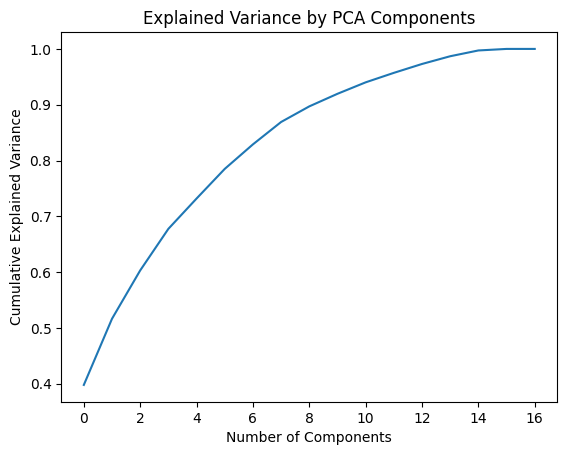

/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/2212015541.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=8)


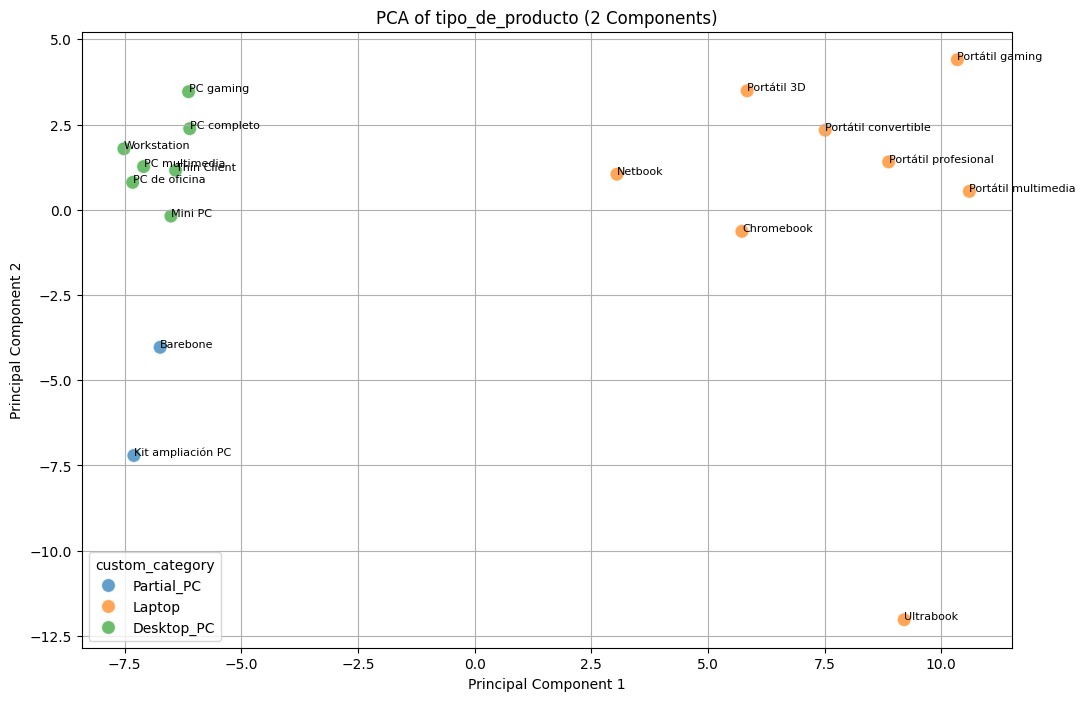

In [552]:
df['custom_category'] = df['tipo_de_producto'].map(category_map)
# Handle any types not in the category map, perhaps by assigning them to 'Other'
df['custom_category'].fillna('Otro', inplace=True) 

# 1. Apply PCA
pca = PCA(n_components=None) # First, fit with all components to see explained variance
pca.fit(scaled_profiles)

# Explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show() # This helps decide how many components to keep (e.g., enough to explain 80-95% variance)

# Let's say you decide to use 2 components for visualization:
pca_2d = PCA(n_components=2, random_state=42)
principal_components_2d = pca_2d.fit_transform(scaled_profiles)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(data = principal_components_2d, 
                      columns = ['PC1', 'PC2'], 
                      index = product_type_profiles.index) # Index is 'tipo_de_producto'

# 2. Add custom categories or cluster labels to this pca_df
category_mapping_for_plot = df[['tipo_de_producto', 'custom_category']].drop_duplicates().set_index('tipo_de_producto')
pca_df = pca_df.join(category_mapping_for_plot)

# 3. Visualize
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', 
                hue='custom_category', # Color by your custom category
                # Or hue='cluster_label'
                data=pca_df, 
                s=100, alpha=0.7) # s is marker size

# Annotate points with tipo_de_producto names for clarity
for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=8)

plt.title('PCA of tipo_de_producto (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

As shown in the PCA analysis, the grouping are what we expected with three main clusters:

- Partially Built PC's
- Desktop PCs
- Laptops

The Desktop and the Laptop clusters are the clearest to differentaiate between, indicated a significant difference between types of products that may be considered a "Desktop" and a "Laptop".

We also have another grouping where the "Barebone" and the "Kit Ampliacion PC" are stationed, which makes sense as they both have similar features with the Desktop PC's, however they are not fully built Desktops, only partially built. 

The only type of product that seems to be an anomaly is the "Ultrabook" which is quite far from any other cluster. This is surprising, as we know that Ultrabooks are simply high-end laptops. Let's investigate further into why we may be seeing this extreme seperation between the "Ultrabook" and the other laptop-type categories:

#### Investigating the Ultrabook anamoly

In [553]:
# print(product_type_profiles.loc['Ultrabook'])

# For comparison, get the profiles of other items mapped to 'Laptop'
# First, identify all tipo_de_producto that are mapped to 'Laptop' in your custom_category
laptop_types = [key for key, value in category_map.items() if value == 'Laptop' and key in product_type_profiles.index]
other_laptop_profiles = product_type_profiles.loc[laptop_types]

# Find features where Ultrabook differs most from the average laptop
comparison_df = pd.DataFrame({
    'Ultrabook': product_type_profiles.loc['Ultrabook'],
    'Avg_Laptop': other_laptop_profiles.drop('Ultrabook', errors='ignore').mean()
})
comparison_df['Difference'] = comparison_df['Ultrabook'] - comparison_df['Avg_Laptop']
print("\nFeatures where Ultrabook differs most from average Laptop (positive = more present in Ultrabook):")
print(comparison_df.sort_values(by='Difference', ascending=False).head(10))
print("\nFeatures where Ultrabook differs most from average Laptop (negative = less present in Ultrabook):")
print(comparison_df.sort_values(by='Difference', ascending=True).head(10))


Features where Ultrabook differs most from average Laptop (positive = more present in Ultrabook):
                                           Ultrabook  Avg_Laptop  Difference
pantalla_luminosidad_cd_m2                    0.8750    0.422394    0.452606
pantalla_tiempo_de_reaccion                   0.3750    0.023878    0.351122
pantalla                                      0.5625    0.216633    0.345867
otras_caracteristicas_seguridad_integrada     0.4375    0.104696    0.332804
otras_caracteristicas_certificacion           0.3125    0.008100    0.304400
serie                                         1.0000    0.718355    0.281645
medidas_y_peso_material_de_la_carcasa         0.3750    0.095636    0.279364
alimentacion_bateria                          0.9375    0.662156    0.275344
ia_procesador                                 0.3125    0.045137    0.267363
otras_caracteristicas_software_incluido       0.2500    0.007381    0.242619

Features where Ultrabook differs most from average La

In [554]:
# Assuming pca_2d is your fitted PCA object with 2 components
# And product_type_profiles.columns are your original feature names (spec presence rates)

loadings = pd.DataFrame(pca_2d.components_.T,
                        columns=['PC1', 'PC2'],
                        index=product_type_profiles.columns)

print("\nTop features influencing PC1 (that might separate Ultrabook):")
print(loadings['PC1'].abs().sort_values(ascending=False).head(10)) # Features with largest impact on PC1

print("\nTop features influencing PC2 (that might separate Ultrabook):")
print(loadings['PC2'].abs().sort_values(ascending=False).head(10)) # Features with largest impact on PC2

# Now, for these top features, check Ultrabook's values in `product_type_profiles`
# e.g., if 'some_spec_presence_rate' has a high loading on PC1:
print(f"Ultrabook's value for some_spec_presence_rate: {product_type_profiles.loc['Ultrabook', 'procesador_fabricante']}")
print(f"Avg Laptop value for some_spec_presence_rate: {other_laptop_profiles.drop('Ultrabook', errors='ignore')['procesador_fabricante'].mean()}")


Top features influencing PC1 (that might separate Ultrabook):
webcam_mpx                                                0.131996
alimentacion_vatios_hora                                  0.131556
pantalla_tamano_pulgadas                                  0.131009
pantalla_diagonal_cm                                      0.131009
pantalla_resolucion_pixeles                               0.130603
pantalla_tecnologia                                       0.130435
pantalla_formato_de_imagen                                0.130281
procesador_potencia_maxima_de_diseno_termico_tdp_watts    0.130160
grafica_fabricante_tarjeta                                0.128738
medidas_y_peso_altura_mm                                  0.128630
Name: PC1, dtype: float64

Top features influencing PC2 (that might separate Ultrabook):
procesador_fabricante                      0.185030
ofertas                                    0.181209
precio_min                                 0.181209
precio_max            

#### **Synthesis and Diagnosis of the Ultrabook anomaly**
**The results above provides the following information:**

**Unique Specification Profile:** The ~15 Ultrabooks have a distinct pattern of what's specified. They are more likely to have certain premium or specific features listed (like screen brightness, response time, specific certifications, AI processor details) compared to the average of other laptop types.

**Absence of Other Common Laptop Specs:** They are less likely to have some common specs listed (like weight, dimensions, overall equipment lists) or specs related to dedicated graphics (grafica_salida_de_video).

**Small Sample Size Amplifies Differences:** With only ~15 samples, any consistent pattern (or lack thereof) within these specific Ultrabooks will make their average profile stand out more sharply than if you had hundreds of Ultrabooks. The profile might be very specific to these particular models.

**Influence of otras_caracteristicas_certificacion on PC2:** This feature is significantly more present for Ultrabooks and is a strong driver of PC2, likely pulling Ultrabooks away from other laptops along that axis.

##### **Modelling Strategies and trade offs**
At this point, we have two options: Keep or exclude the ultrabooks from the main laptop dataset.

- Option 1: Keeping the "Ultrabooks"
    - **Pros:** Simplest approach.
    - **Cons:** The model has to infer "Ultrabook-ness" from combinations of other features. Given their unique profile, this might happen, but it's less explicit. The risk of noise from the small sample and distinct profile remains. 

- Option 2: Excluding the "Ultrabooks"
    - **Pros:** Creates a potentially more robust and stable model for the vast majority of other laptop types by removing a small, distinct, and potentially noisy group. Avoids issues of the model being overly influenced by the few Ultrabook samples.
    - **Cons:** Our model will not be able to predict prices for new Ultrabooks. We lose ~15 data points (though this is a small fraction of your ~8500 total rows, it's a larger fraction of just laptops).

##### **The verdict with Ultrabooks**
Based on the pros and cons discussed above, we decided to exclude the ultrabooks from the dataset because:

- We are planning on creating predictive models based on the general specifications of a desktop or laptop, without specifics for the underlying subcategories of laptops. 
- It's a highly noisy small set of the data. 
- Ultrabooks have many missing values in fields where most other laptops have values, leading to an increase in inaccuracy if we build models for laptop based predictions.
- Ultrabooks are a very small section of the dataset (~15 rows), which would not give us a very accurate model even if we were to single out an "ultrabooks" section on our frontend.
- Manually searching through the Ultrabook dataset, we checked the price of the Ultrabooks which all were extremely innacurate regardless.

In [555]:
# Remove Ultrabooks from the dataset
df = df[df['tipo_de_producto'] != 'Ultrabook']
print("Ultrabooks removed successfully.")

Ultrabooks removed successfully.


### Creating the new "custom_category" field

Let's create a new column with the new category mapping so we can work with it a bit more before deciding to split the dataset based on these categories

In [556]:
category_map = {
    # Laptop
    'Portátil multimedia': 'Laptop', 
    'Portátil gaming': 'Laptop', 
    'Portátil profesional': 'Laptop', 
    # 'Ultrabook': 'Laptop',   Ultrabooks are excluded from the dataset
    'Portátil convertible': 'Laptop', 
    'Netbook': 'Laptop',
    'Portátil 3D': 'Laptop', 
    'Chromebook': 'Laptop',

    # Desktop
    'Mini PC': 'Desktop_PC', 
    'PC multimedia': 'Desktop_PC', 
    'PC gaming': 'Desktop_PC', 
    'PC de oficina': 'Desktop_PC',
    'Workstation': 'Desktop_PC', 
    'PC completo': 'Desktop_PC',
    'Thin Client': 'Desktop_PC',

    # Partial PC
    'Barebone': 'Partial_PC', 
    'Kit ampliación PC': 'Partial_PC',
}

In [557]:
#Create a new column for the custom_category
df['custom_category'] = df['tipo_de_producto'].map(category_map)
condition_fallback_to_tipo = df['custom_category'].isnull() & df['tipo'].notnull()

# 3. For these rows that do not have a custom_category, try to fill 'custom_category' using 'tipo'.
tipo_to_custom_map = {
    'Laptop': 'Laptop',       # Assuming 'Laptop' in 'tipo' maps to 'Laptop'
    'Desktop': 'Desktop_PC'   # Assuming 'Desktop' in 'tipo' maps to 'Desktop_PC'
    # Add other mappings if 'tipo' has other values like 'Portatil' -> 'Laptop'
}

df.loc[condition_fallback_to_tipo, 'custom_category'] = df.loc[condition_fallback_to_tipo, 'tipo'].map(tipo_to_custom_map)

/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/3436602093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['custom_category'] = df['tipo_de_producto'].map(category_map)


### Revisiting missingness based on new "custom_category" field

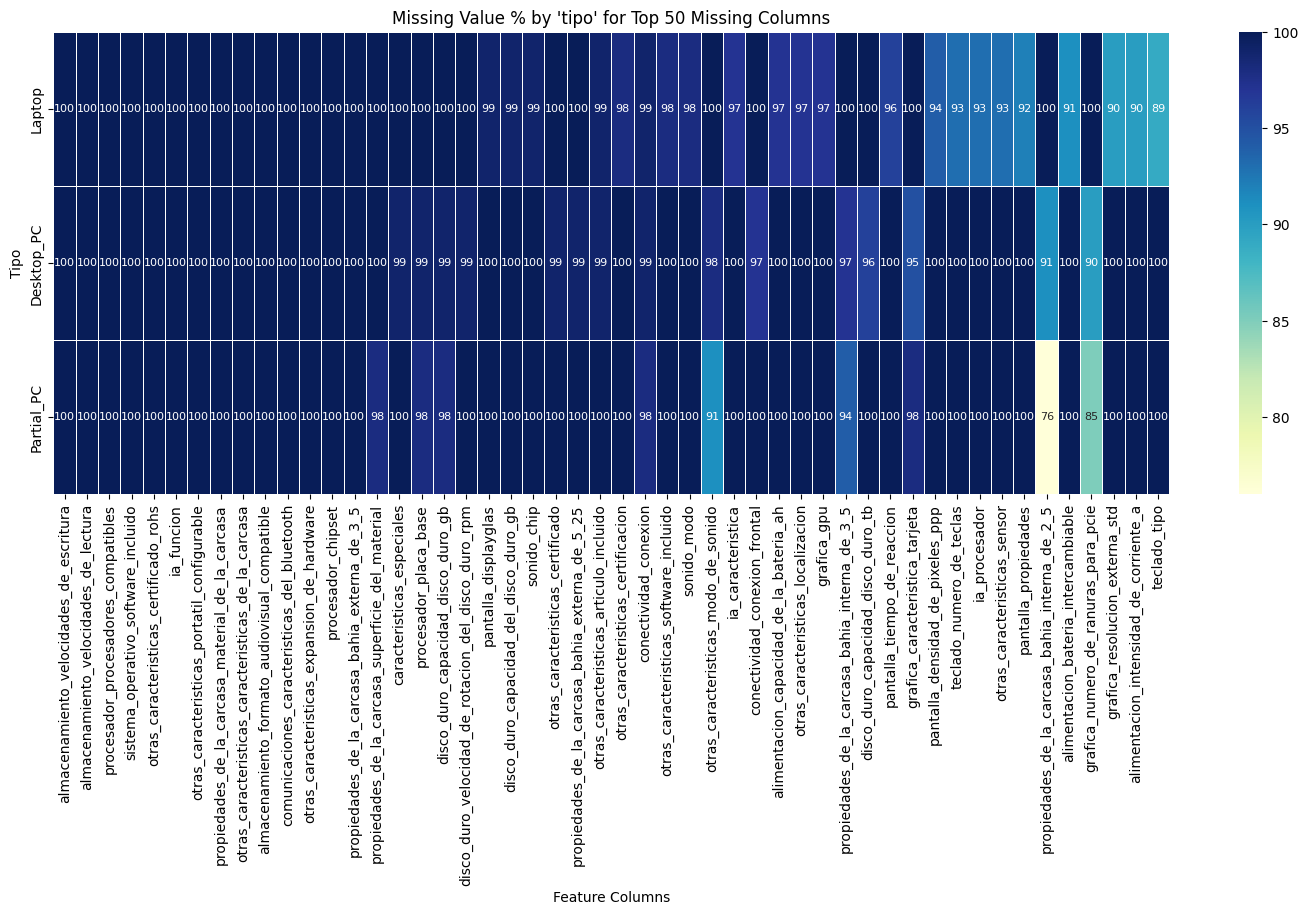

In [558]:
miss_frac = df.isnull().mean().sort_values(ascending=False)
top50 = miss_frac.head(50).index.tolist()

custom_categories = df['custom_category'].unique() 
missing_by_custom_category = {}

for p_type in custom_categories:
    if pd.isna(p_type): 
        continue
    df_subset = df[df['custom_category'] == p_type]
    missing_percentages = df_subset[top50].isnull().mean() * 100
    missing_by_custom_category[p_type] = missing_percentages

missing_summary_df_custom_category = pd.DataFrame(missing_by_custom_category)
if not missing_summary_df_custom_category.empty:
    missing_summary_df_custom_category = missing_summary_df_custom_category.T
else:
    print("Warning: missing_summary_df_custom_category is empty. Check 'custom_category' column and its unique values.")

if not missing_summary_df_custom_category.empty:
    plt.figure(figsize=(18, 6)) # Adjust as needed
    sns.heatmap(
        missing_summary_df_custom_category.astype(float).round(0).astype(int), 
        annot=True, 
        cmap="YlGnBu", 
        fmt="d", 
        linewidths=.5, 
        annot_kws={"size": 8}
        )
    plt.title("Missing Value % by 'tipo' for Top 50 Missing Columns")
    plt.xlabel("Feature Columns")
    plt.ylabel("Tipo")
    plt.show()

By looking at the heatmap, we can see that it strikes a good middleground in categorizing the products for a balance between the relationship between the products and the missing values, and the number of categories. 

### Conclusion of new "custom_category" column

At the beginning, we recogonized an overwhelming number of missing values in our dataset. Upon further inspection, we determined that the missing values may be related to the type of product in the database. For example, we saw that there are laptops with screen sizes, and Desktops with no screen specifics. This lead us to analyze the trend and relationship of missing values with the type of product, which we determined was greatly coorelated. This information is vital to us when deciding what to do with our predictive models. The different products deviate enough from eachother that we may have to split the datasets based on our new "custom_category" column that finds a solid balance between the product and properties that do not apply to that product. 

## Handling missing values

During our disection of the missing values, we recognized that there are columns with an overwhelming number of missing values. The code below revisits this fact:

In [559]:
#Quanitifying missingness
pd.set_option('display.max_rows', None)  # Show all rows

# Calculate the number of missing values per column
missing_count = df.isnull().sum()

# Calculate the percentage of missing values per column
# len(df) gives total number of rows
missing_percentage = (missing_count / len(df)) * 100 

# Create a DataFrame with the raw data
missing_details_df = pd.DataFrame({
    'Column Title': df.columns, # Get column names directly
    'Number of Missing Values': missing_count.values, # Use .values to align if df.columns is used
    'Total Rows': len(df),
    'Missing Percentage': missing_percentage.values
})

# Sort by missing percentage in descending order
missing_details_df = missing_details_df.sort_values(by='Missing Percentage', ascending=False)

# Filter to show only columns with at least one missing value
missing_details_filtered_df = missing_details_df[missing_details_df['Number of Missing Values'] > 0]

print("\nMissing Value Summary (Column-based):")
print(missing_details_filtered_df.to_string()) # .to_string() helps print all rows if pd.set_option isn't enough for direct print


Missing Value Summary (Column-based):
                                               Column Title  Number of Missing Values  Total Rows  Missing Percentage
73                  almacenamiento_velocidades_de_escritura                      8046        8048           99.975149
72                    almacenamiento_velocidades_de_lectura                      8046        8048           99.975149
99                      procesador_procesadores_compatibles                      8042        8048           99.925447
98                      sistema_operativo_software_incluido                      8042        8048           99.925447
97                   otras_caracteristicas_certificado_rohs                      8041        8048           99.913022
62                                               ia_funcion                      8040        8048           99.900596
40              otras_caracteristicas_portatil_configurable                      8038        8048           99.875746
79         propie

In [560]:
# Identify duplicate column names
duplicated_cols = df.columns[df.columns.duplicated(keep=False)]
print(f"Duplicate column names found: {duplicated_cols.unique().tolist()}")

# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated(keep='first')]
# print removed columns
print(f"Removed columns: {duplicated_cols.unique().tolist()}")


Duplicate column names found: ['ram_numero_ranuras_memoria']
Removed columns: ['ram_numero_ranuras_memoria']


Now that we've determined that the missing values have a strong relationship with the "custom_category" column we created, we can handling missingness of the data within that columns scope. This is a much better method rather than looking at the overall dataset and dropping the columns that have high missingness. For example:

The missingness of the "screen size" in the overall dataset may high, because "desktop"s don't have a screen. However, we need to look at the missingness of "screen size" within the subcategory of "laptops" as it's a field that only applies to "laptops"

### Manual Imputations based on other columns

#### Imputing "procesador_fabricante" values based on "procesador"

In [561]:
import numpy as np
import pandas as pd

# Assuming your DataFrame is named 'df' and is already loaded.
# If not, load it first, e.g., df = pd.read_csv('your_data.csv')

# Make sure 'procesador' and 'procesador_fabricante' columns exist
if 'procesador' not in df.columns or 'procesador_fabricante' not in df.columns:
    print("Error: 'procesador' or 'procesador_fabricante' column not found in the DataFrame.")
    # Handle error appropriately, e.g., raise ValueError or exit
else:
    # Define the function to extract the manufacturer
    def get_fabricante(procesador_string):
        if pd.isna(procesador_string) or not isinstance(procesador_string, str) or not procesador_string.strip():
            return np.nan
        return procesador_string.split()[0]

    # Identify rows to impute:
    # 'procesador_fabricante' is NaN
    # 'procesador' is not NaN (and is a string)
    mask_to_impute = df['procesador_fabricante'].isna() & df['procesador'].notna() & df['procesador'].apply(lambda x: isinstance(x, str))

    # Store the number of NaNs before imputation for verification
    nan_before_imputation = df.loc[mask_to_impute, 'procesador_fabricante'].isna().sum()
    print(f"Number of NaN values in 'procesador_fabricante' to be imputed: {nan_before_imputation}")

    if nan_before_imputation > 0:
        # Apply the imputation
        df.loc[mask_to_impute, 'procesador_fabricante'] = df.loc[mask_to_impute, 'procesador'].apply(get_fabricante)

        # Verify imputation
        nan_after_imputation = df.loc[mask_to_impute, 'procesador_fabricante'].isna().sum()
        values_imputed = nan_before_imputation - nan_after_imputation
        print(f"Successfully imputed {values_imputed} values in 'procesador_fabricante'.")
        if nan_after_imputation > 0:
            print(f"Warning: {nan_after_imputation} values in 'procesador_fabricante' could not be imputed (e.g., 'procesador' was empty or not a string).")
    else:
        print("No values needed imputation in 'procesador_fabricante' based on the criteria.")

    # Display a few rows where imputation might have occurred (or would have)
    print("\nSample of 'procesador' and 'procesador_fabricante' after attempting imputation:")
    print(df[df['procesador'].notna()][['procesador', 'procesador_fabricante']].head())

Number of NaN values in 'procesador_fabricante' to be imputed: 486
Successfully imputed 486 values in 'procesador_fabricante'.

Sample of 'procesador' and 'procesador_fabricante' after attempting imputation:
                procesador procesador_fabricante
0                 Apple M3                 Apple
1                 Apple M3                 Apple
4     Intel Core i7-13700H                 Intel
5  Intel Core Ultra 7 155H                 Intel
6    AMD Ryzen AI 9 HX 370                   AMD


### Imputing "serie" based on "titulo"

In [562]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df' and is already loaded.
# If not, load it first, e.g., df = pd.read_csv('your_data.csv')

# Ensure 'serie' and 'titulo' columns exist
if 'serie' not in df.columns or 'titulo' not in df.columns:
    print("Error: 'serie' or 'titulo' column not found in the DataFrame.")
    # Handle error appropriately
else:
    def extract_serie_from_titulo(titulo_str):
        if pd.isna(titulo_str) or not isinstance(titulo_str, str) or not titulo_str.strip():
            return np.nan

        words = titulo_str.split()
        serie_candidate_words = []

        for word in words:
            is_bracketed_year = (word.startswith('[') and
                                 word.endswith(']') and
                                 len(word) > 2 and # e.g. prevent "[]"
                                 word[1:-1].isdigit() and
                                 len(word[1:-1]) == 4) # e.g. "[2024]"

            contains_digit = any(char.isdigit() for char in word)

            if contains_digit or is_bracketed_year:
                break  # Stop if the word itself contains a number or is a bracketed year
            
            serie_candidate_words.append(word)

        # Take up to the first 3 words from the candidates found before a number
        num_candidate_words = len(serie_candidate_words)
        
        if num_candidate_words == 0:
            return np.nan 
        
        num_words_to_take = min(num_candidate_words, 3)
        final_serie = " ".join(serie_candidate_words[:num_words_to_take])
        
        return final_serie

    # Identify rows to impute: 'serie' is NaN, and 'titulo' is not NaN and is a string
    mask_to_impute_serie = df['serie'].isna() & df['titulo'].notna() & df['titulo'].apply(lambda x: isinstance(x, str))

    nan_in_serie_before = df.loc[mask_to_impute_serie, 'serie'].isna().sum()
    print(f"Number of NaN values in 'serie' to be imputed: {nan_in_serie_before}")

    if nan_in_serie_before > 0:
        df.loc[mask_to_impute_serie, 'serie'] = df.loc[mask_to_impute_serie, 'titulo'].apply(extract_serie_from_titulo)
        
        # Recalculate NaNs on the originally masked rows to see how many were successfully filled
        nan_in_serie_after_on_masked_rows = df.loc[mask_to_impute_serie, 'serie'].isna().sum()
        values_actually_imputed_in_serie = nan_in_serie_before - nan_in_serie_after_on_masked_rows
        
        print(f"Successfully imputed {values_actually_imputed_in_serie} values in 'serie'.")
        if nan_in_serie_after_on_masked_rows > 0:
            print(f"Note: {nan_in_serie_after_on_masked_rows} values targeted for imputation in 'serie' remain NaN (e.g., 'titulo' did not yield a valid series based on the rules).")
    else:
        print("No values needed imputation in 'serie' based on the current criteria.")

    print("\n--- Test cases for extract_serie_from_titulo ---")
    print(f"'Apple Mac mini M4 [2024]' -> '{extract_serie_from_titulo('Apple Mac mini M4 [2024]')}'")
    print(f"'GigaByte BRIX GB-BACE-3160' -> '{extract_serie_from_titulo('GigaByte BRIX GB-BACE-3160')}'")
    print(f"'Lenovo ThinkCentre neo 50s' -> '{extract_serie_from_titulo('Lenovo ThinkCentre neo 50s')}' (Note: User example was 'Lenovo ThinkCentre')")
    print(f"'HP EliteBook x360 1030 G8' -> '{extract_serie_from_titulo('HP EliteBook x360 1030 G8')}'")
    print(f"'Intel Core i7 10700K' -> '{extract_serie_from_titulo('Intel Core i7 10700K')}'")
    print(f"'Just Three Words' -> '{extract_serie_from_titulo('Just Three Words')}'")
    print(f"'Four Words No Number' -> '{extract_serie_from_titulo('Four Words No Number')}'")
    print(f"'Word [2023] Stopper' -> '{extract_serie_from_titulo('Word [2023] Stopper')}'")
    print(f"'1Number First Word' -> '{extract_serie_from_titulo('1Number First Word')}'")
    print(f"Empty title '' -> '{extract_serie_from_titulo('')}'")
    print(f"NaN title -> '{extract_serie_from_titulo(np.nan)}'")
    print("--- End of test cases ---")

    print("\nSample of 'titulo' and imputed 'serie' after operation:")
    print(df[df['titulo'].notna()][['titulo', 'serie']].head())

Number of NaN values in 'serie' to be imputed: 2898
Successfully imputed 2893 values in 'serie'.
Note: 5 values targeted for imputation in 'serie' remain NaN (e.g., 'titulo' did not yield a valid series based on the rules).

--- Test cases for extract_serie_from_titulo ---
'Apple Mac mini M4 [2024]' -> 'Apple Mac mini'
'GigaByte BRIX GB-BACE-3160' -> 'GigaByte BRIX'
'Lenovo ThinkCentre neo 50s' -> 'Lenovo ThinkCentre neo' (Note: User example was 'Lenovo ThinkCentre')
'HP EliteBook x360 1030 G8' -> 'HP EliteBook'
'Intel Core i7 10700K' -> 'Intel Core'
'Just Three Words' -> 'Just Three Words'
'Four Words No Number' -> 'Four Words No'
'Word [2023] Stopper' -> 'Word'
'1Number First Word' -> 'nan'
Empty title '' -> 'nan'
NaN title -> 'nan'
--- End of test cases ---

Sample of 'titulo' and imputed 'serie' after operation:
                             titulo              serie
0     Apple MacBook Air 13" 2024 M3  Apple MacBook Air
1     Apple MacBook Air 15" 2024 M3  Apple MacBook Air
2   App

### Imputing "procesador_tipo" from "procesador"

In [563]:
import pandas as pd
import numpy as np
import re

# Assuming your DataFrame is named 'df' and is already loaded.
# If not, load it first, e.g., df = pd.read_csv('your_data.csv')

# Ensure 'procesador' and 'procesador_tipo' columns exist
if 'procesador' not in df.columns or 'procesador_tipo' not in df.columns:
    print("Error: 'procesador' or 'procesador_tipo' column not found in the DataFrame.")
    # Handle error appropriately
else:
    def get_procesador_tipo(procesador_str):
        if pd.isna(procesador_str) or not isinstance(procesador_str, str):
            return np.nan

        # Define patterns and their corresponding procesador_tipo
        # Order matters: more specific patterns should come before more general ones.
        # Using re.IGNORECASE for broader matching.
        patterns_results = [
            (r"Apple M\d*", "Apple M"),              # e.g., "Apple M4" -> "Apple M"
            (r"Core Ultra", "Core Ultra"),           # e.g., "Intel Core Ultra 9" -> "Core Ultra"
            (r"Core i(\d)", lambda m: f"Core i{m.group(1)}"), # e.g., "Intel Core i7-10700F" -> "Core i7"
            (r"Intel N\d*", "Intel N"),              # e.g., "Intel N200" -> "Intel N"
            (r"Pentium", "Pentium"),                 # e.g., "Intel Pentium Gold" -> "Pentium"
            (r"Celeron", "Celeron"),                 # e.g., "Intel Celeron G6900" -> "Celeron"
            (r"Atom", "Atom"),                       # e.g., "Intel Atom x5" -> "Atom"
            (r"Xeon", "Xeon"),                       # e.g., "Intel Xeon E-2324G" -> "Xeon"
            (r"Ryzen AI", "Ryzen AI"),               # e.g., "AMD Ryzen AI 9" -> "Ryzen AI"
            (r"Ryzen (\d)", lambda m: f"Ryzen {m.group(1)}"), # e.g., "AMD Ryzen 7 5800X" -> "Ryzen 7"
            (r"Threadripper", "Threadripper"),       # e.g., "AMD Ryzen Threadripper" -> "Threadripper"
            (r"EPYC", "EPYC"),                       # e.g., "AMD EPYC 7763" -> "EPYC"
            (r"Athlon", "Athlon")                    # e.g., "AMD Athlon 3000G" -> "Athlon"
        ]

        for pattern, result_val_or_func in patterns_results:
            match = re.search(pattern, procesador_str, flags=re.IGNORECASE)
            if match:
                if callable(result_val_or_func):
                    return result_val_or_func(match)
                return result_val_or_func
        
        return np.nan # Return NaN if no specific pattern is matched

    # Identify rows where 'procesador_tipo' is NaN and 'procesador' is not NaN
    mask_to_impute_tipo = df['procesador_tipo'].isna() & df['procesador'].notna() & df['procesador'].apply(lambda x: isinstance(x, str))

    nan_in_tipo_before = df.loc[mask_to_impute_tipo, 'procesador_tipo'].isna().sum()
    print(f"Number of NaN values in 'procesador_tipo' to be imputed: {nan_in_tipo_before}")

    if nan_in_tipo_before > 0:
        # Apply the extraction function
        df.loc[mask_to_impute_tipo, 'procesador_tipo'] = df.loc[mask_to_impute_tipo, 'procesador'].apply(get_procesador_tipo)

        # Verify imputation by checking NaNs on the originally masked rows
        nan_in_tipo_after_on_masked_rows = df.loc[mask_to_impute_tipo, 'procesador_tipo'].isna().sum()
        values_actually_imputed_in_tipo = nan_in_tipo_before - nan_in_tipo_after_on_masked_rows
        
        print(f"Successfully imputed {values_actually_imputed_in_tipo} values in 'procesador_tipo'.")
        if nan_in_tipo_after_on_masked_rows > 0:
            print(f"Note: {nan_in_tipo_after_on_masked_rows} values targeted for imputation in 'procesador_tipo' remain NaN (e.g., 'procesador' string did not match any defined patterns).")
    else:
        print("No values needed imputation in 'procesador_tipo' based on the current criteria.")

    # You can uncomment the following lines to test the function with your examples:
    print("\n--- Test cases for get_procesador_tipo ---")
    test_procesadores = ["Apple M4", "AMD Ryzen 7 5800X", "Intel N200", "Intel Core i7-10700F", "Intel Core Ultra 9", "AMD Ryzen AI 7 HX", "Snapdragon X Elite", "Intel Celeron N4500"]
    for p_str in test_procesadores:
        print(f"'{p_str}' -> '{get_procesador_tipo(p_str)}'")
    print("--- End of test cases ---")

    # Display a sample of 'procesador' and 'procesador_tipo' after attempting imputation
    print("\nSample of 'procesador' and 'procesador_tipo' after imputation attempt:")
    print(df[df['procesador'].notna()][['procesador', 'procesador_tipo']].head(10))

Number of NaN values in 'procesador_tipo' to be imputed: 446
Successfully imputed 397 values in 'procesador_tipo'.
Note: 49 values targeted for imputation in 'procesador_tipo' remain NaN (e.g., 'procesador' string did not match any defined patterns).

--- Test cases for get_procesador_tipo ---
'Apple M4' -> 'Apple M'
'AMD Ryzen 7 5800X' -> 'Ryzen 7'
'Intel N200' -> 'Intel N'
'Intel Core i7-10700F' -> 'Core i7'
'Intel Core Ultra 9' -> 'Core Ultra'
'AMD Ryzen AI 7 HX' -> 'Ryzen AI'
'Snapdragon X Elite' -> 'nan'
'Intel Celeron N4500' -> 'Celeron'
--- End of test cases ---

Sample of 'procesador' and 'procesador_tipo' after imputation attempt:
                 procesador     procesador_tipo
0                  Apple M3             Apple M
1                  Apple M3             Apple M
4      Intel Core i7-13700H       Intel Core i7
5   Intel Core Ultra 7 155H  Intel Core Ultra 7
6     AMD Ryzen AI 9 HX 370            Ryzen AI
7   Intel Core Ultra 9 185H  Intel Core Ultra 9
8        AMD Ryz

### Dynamic Column Dropping

While there isn't a "rule of thumb" with dropping columns based on missingness, the general guidelines are:

- **Very High Missingness (e.g., > 70):** Columns missing this much data are often candidates for dropping. The rationale is that they may not retain enough information to be useful, and imputation could introduce more noise than signal.
   

- **High Missingness (e.g., > 30-60%):** This is a grey area. Dropping is a strong possibility, but you should more carefully consider:
    - The potential value of the column if imputed.
    - Whether the missingness is concentrated in specific segments of your data (like your custom_category scenario).

- **Moderate Missingness (e.g., 0-30%:** Dropping is less common here unless the column is redundant or has very low predictive power. Imputation is often preferred.
  
So, let's start the missingness analysis of each column within the scope of the "custom_category" column which groups:

- Laptops
- Desktop_PC
- Partial_PC

### Missing Data Processing by Category-Specific Thresholds (Missingness > 70%)

This section implements a strategy to handle missing data based on how prevalent the missingness is within distinct product categories. The primary function used is `process_missing_by_category_threshold`.

**Purpose:**
To refine the dataset by either dropping features that are excessively missing across all product categories or by nullifying (setting to `NaN`) feature values within specific categories where they are mostly missing, while preserving the feature if it's sufficiently present in other categories.

**Logic:**

The `process_missing_by_category_threshold` function takes a DataFrame, a category column name (e.g., `'custom_category'`), and a `missing_threshold` (e.g., 0.70 for 70%) as input. It applies the following rules:

1.  **Global Column Drop Rule:**
    *   For each feature column (excluding the category column itself):
    *   If the percentage of missing values in that feature is **greater than** the `missing_threshold` for **ALL** unique categories, the entire feature column is dropped from the DataFrame.

2.  **Per-Category NaN-ification Rule:**
    *   If a feature column is **not** dropped by the rule above (meaning it's present enough in at least one category):
    *   For each unique category:
        *   If the percentage of missing values for the feature *within that specific category* is **greater than** the `missing_threshold`, then all existing values for that feature *within that category* are set to `NaN`.
    *   This preserves the feature for categories where it has good data coverage, while effectively removing its unreliable data from categories where it's too sparse.

**Outcome:**
The result is a new DataFrame where:
-   Features deemed unreliable across all categories are removed.
-   For remaining features, data within specific categories might be nullified if it didn't meet the completeness threshold for that category.
-   This allows downstream processes (like imputation or modeling) to handle these NaNs appropriately, potentially based on more reliable data from other categories or global imputation strategies.

In [564]:
import pandas as pd
import numpy as np

def process_missing_by_category_threshold(
    df_input: pd.DataFrame,
    category_col: str,
    missing_threshold: float = 0.70
) -> pd.DataFrame:
    """
    Processes missing data in a DataFrame based on per-category missingness.

    1. If a column's missing percentage is > missing_threshold for ALL categories,
       the entire column is dropped.
    2. Otherwise (if the column is kept), for any category where the column's
       missing percentage was > missing_threshold, the values for that
       column within that specific category are set to NaN.

    Args:
        df_input: The input DataFrame.
        category_col: The name of the column containing category labels.
        missing_threshold: The missingness percentage (0.0 to 1.0).
                           If missingness > this threshold, actions are taken.

    Returns:
        A new DataFrame with missing data processed according to the rules.
    """
    df = df_input.copy()  # Work on a copy to avoid modifying the original DataFrame passed
    print(f"\n--- Starting Missing Data Processing by Category (Threshold: >{missing_threshold*100}%) ---")

    if category_col not in df.columns:
        raise ValueError(f"Category column '{category_col}' not found in DataFrame.")

    all_categories = df[category_col].unique()
    all_categories = [cat for cat in all_categories if pd.notna(cat)] # Exclude NaN categories if any
    
    if not all_categories:
        print("No valid categories found. Returning original DataFrame.")
        return df

    feature_cols = [col for col in df.columns if col != category_col and isinstance(col, str)]
    
    per_category_missing_pct = {}  # Stores: {feature: {category: missing_pct}}
    for feature in feature_cols:
        per_category_missing_pct[feature] = {}
        for cat_val in all_categories:
            sub_df = df[df[category_col] == cat_val]
            if sub_df.empty or feature not in sub_df.columns: # Handle if feature somehow not in sub_df (shouldn't happen with valid feature_cols)
                per_category_missing_pct[feature][cat_val] = 1.0  # 100% missing
                continue
            
            missing_count = sub_df[feature].isnull().sum()
            total_count = len(sub_df)
            missing_pct = missing_count / total_count if total_count > 0 else 1.0
            per_category_missing_pct[feature][cat_val] = missing_pct

    cols_to_drop_entirely = []
    cells_to_nanify = []  # List of tuples: (feature, category_value)

    for feature, category_missing_map in per_category_missing_pct.items():
        if not category_missing_map: # Should not happen if all_categories is populated
            continue

        # Condition 1: Drop column if missing > threshold for ALL categories
        is_missing_highly_in_all_categories = True
        if not all_categories: # if there are no categories somehow (e.g. category_col all NaN)
             is_missing_highly_in_all_categories = False # Cannot satisfy 'all' condition

        for cat_val in all_categories: # Check against all defined categories
            if category_missing_map.get(cat_val, 1.0) <= missing_threshold: # Use .get for safety if a cat was missed
                is_missing_highly_in_all_categories = False
                break
        
        if is_missing_highly_in_all_categories and all_categories: # Ensure all_categories is not empty
            cols_to_drop_entirely.append(feature)
        else:
            # Condition 2: Not dropping entirely, so check for NaN-ification within specific categories
            for cat_val, pct in category_missing_map.items():
                if pct > missing_threshold:
                    cells_to_nanify.append((feature, cat_val))

    # Apply changes:
    # Step 1: Drop columns that are highly missing in ALL categories
    if cols_to_drop_entirely:
        df.drop(columns=cols_to_drop_entirely, inplace=True, errors='ignore')
        print(f"Dropped columns entirely (missing > {missing_threshold*100:.1f}% in ALL categories): {cols_to_drop_entirely}")
    else:
        print(f"No columns met criteria to be dropped entirely (missing > {missing_threshold*100:.1f}% in ALL categories).")


    # Step 2: Set specific feature-category cells to NaN
    nan_modification_summary = {}
    for feature, cat_val in cells_to_nanify:
        if feature in df.columns:  # Ensure column wasn't already dropped
            category_mask = (df[category_col] == cat_val)
            
            # For logging: count how many actual values will be changed to NaN
            # This avoids printing for cells that are already NaN.
            current_non_nan_values_to_change = df.loc[category_mask & df[feature].notna(), feature].shape[0]

            if current_non_nan_values_to_change > 0:
                if feature not in nan_modification_summary:
                    nan_modification_summary[feature] = []
                nan_modification_summary[feature].append(f"'{cat_val}' ({current_non_nan_values_to_change} values)")
            
            df.loc[category_mask, feature] = np.nan
    
    if nan_modification_summary:
        print(f"\nSet values to NaN for features within specific categories (where missing > {missing_threshold*100:.1f}%):")
        for feature, details in nan_modification_summary.items():
            print(f"  - Column '{feature}': In categories {', '.join(details)}.")
    else:
        print(f"No feature/category pairs met criteria for setting values to NaN (original missing % already <= {missing_threshold*100:.1f}% or cells were already NaN).")
        
    print("--- Missing Data Processing by Category Complete ---")
    return df

In [565]:
# Ensure the function process_missing_by_category_threshold is defined above this line

# Example call:
category_column_name = 'custom_category' # Or whatever your category column is
threshold_for_action = 0.70

# This will return a NEW DataFrame with the changes.
# Your original 'df' will not be modified unless you reassign it like: df = process_missing_...
df_processed_missing = process_missing_by_category_threshold(
    df_input=df,  # Pass your main DataFrame here
    category_col=category_column_name,
    missing_threshold=threshold_for_action
)

# Now you can inspect df_processed_missing
print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"Processed DataFrame shape: {df_processed_missing.shape}")

# Example check for your 'grafica_salida_de_video' column:
if 'grafica_salida_de_video' in df_processed_missing.columns:
    print("\nMissing percentages for 'grafica_salida_de_video' AFTER processing:")
    for cat_val in df_processed_missing[category_column_name].unique():
        if pd.notna(cat_val):
            sub_df = df_processed_missing[df_processed_missing[category_column_name] == cat_val]
            if not sub_df.empty:
                missing_pct = sub_df['grafica_salida_de_video'].isnull().mean()
                print(f"  - Category '{cat_val}': {missing_pct*100:.2f}% missing")
            else:
                 print(f"  - Category '{cat_val}': No data after processing (empty subset).")

else:
    print("\n'grafica_salida_de_video' was dropped entirely.")


--- Starting Missing Data Processing by Category (Threshold: >70.0%) ---
Dropped columns entirely (missing > 70.0% in ALL categories): ['teclado_tipo', 'teclado_numero_de_teclas', 'teclado_teclas_adicionales', 'alimentacion_bateria_intercambiable', 'medidas_y_peso_material_de_la_carcasa', 'otras_caracteristicas_seguridad_integrada', 'otras_caracteristicas_sensor', 'teclado_caracteristica', 'otras_caracteristicas_portatil_configurable', 'grafica_tipo_memoria', 'pantalla_tiempo_de_reaccion', 'otras_caracteristicas_caracteristicas_especiales', 'pantalla', 'sonido_modo', 'otras_caracteristicas_certificacion', 'ia_caracteristica', 'ram_numero_ranuras_memoria', 'ram_ranura_memoria', 'ram_configuracion_memoria', 'procesador_chipset', 'otras_caracteristicas_software_incluido', 'pantalla_displayglas', 'grafica_gpu', 'pantalla_propiedades', 'ia_funcion', 'ia_procesador', 'sonido_chip', 'otras_caracteristicas_localizacion', 'conectividad_conexion', 'otras_caracteristicas_expansion_de_hardware', 

### Imputing or Dropping for category specific colunms (30% - 70% missingness)

Here we go through every single column and each category to determine it's missingness and whether to impute of drop the column based on it's relationship with the price of the product.

In [566]:
import pandas as pd
import numpy as np

def analyze_medium_missingness_for_all_relevant_columns(
    df_to_analyze: pd.DataFrame,
    category_col: str,
    medium_missing_low_thresh: float = 0.30,
    medium_missing_high_thresh: float = 0.70,
    columns_to_exclude: list = None
) -> list:
    """
    Analyzes ALL columns in df_to_analyze (not in columns_to_exclude)
    to find those with medium missingness (e.g., 30%-70%) within each category.

    Args:
        df_to_analyze: The DataFrame to analyze. This should typically be the result
                       of previous cleaning/pruning steps.
        category_col: The name of the column containing category labels.
        medium_missing_low_thresh: Lower bound for medium missingness (inclusive).
        medium_missing_high_thresh: Upper bound for medium missingness (inclusive).
        columns_to_exclude: A list of column names to skip during this analysis
                            (e.g., target variable, already imputed columns, ID columns).

    Returns:
        A list of dictionaries, where each dictionary details a feature, its category,
        and its missing percentage if it falls within the medium range for that category.
        Example: [{'feature': 'col_A', 'category': 'Laptop', 'missing_pct': 0.45}, ...]
    """
    medium_missing_details = []
    if columns_to_exclude is None:
        columns_to_exclude = []

    # Ensure category_col is always excluded if not already
    if category_col not in columns_to_exclude:
        columns_to_exclude.append(category_col)

    feature_cols_to_check = [col for col in df_to_analyze.columns if col not in columns_to_exclude]
    
    all_categories = df_to_analyze[category_col].unique()
    all_categories = [cat for cat in all_categories if pd.notna(cat)]

    for feature in feature_cols_to_check:
        for cat_val in all_categories:
            sub_df = df_to_analyze[df_to_analyze[category_col] == cat_val]

            if sub_df.empty:
                continue
            
            # This check should be robust, but defensive programming is good.
            if feature not in sub_df.columns: 
                print(f"Warning: Feature '{feature}' unexpectedly not in sub_df for category '{cat_val}'. Skipping.")
                continue

            missing_count = sub_df[feature].isnull().sum()
            total_count_in_sub_df = len(sub_df)
            
            missing_pct_within_category = missing_count / total_count_in_sub_df if total_count_in_sub_df > 0 else 1.0
            
            if medium_missing_low_thresh <= missing_pct_within_category <= medium_missing_high_thresh:
                medium_missing_details.append({
                    'feature': feature,
                    'category': cat_val,
                    'missing_pct': round(missing_pct_within_category, 4)
                })
                
    return medium_missing_details


In [567]:
def analyze_feature_relationship_with_target(
    df_analyzed: pd.DataFrame,
    category_col: str,
    features_to_analyze_info: list, # List of dicts from analyze_medium_missingness_in_specific_columns
    target_col_name: str,
    min_samples_for_analysis: int = 20, # Min non-missing samples for reliable analysis
    max_unique_values_for_categorical_summary: int = 30 # Max unique cats for detailed group summary
) -> list:
    """
    Analyzes the relationship between specified features and a target variable.
    For numerical features, calculates Pearson correlation.
    For categorical features, provides mean of target per feature category.

    Args:
        df_analyzed: The DataFrame to use for analysis (e.g., df_after_pruning).
        category_col: The name of the main category column in df_analyzed.
        features_to_analyze_info: A list of dictionaries, where each dictionary details a
                                  feature, its specific category, and its missing percentage.
                                  Typically the output of analyze_medium_missingness_in_specific_columns.
        target_col_name: The name of the target variable column (e.g., 'precio_mean').
        min_samples_for_analysis: Minimum number of valid (non-missing feature and target)
                                  samples required to perform the analysis.
        max_unique_values_for_categorical_summary: If a categorical feature has more unique
                                                   values than this, a full group-by summary
                                                   might be too verbose or less meaningful.

    Returns:
        A list of dictionaries, each extending the input feature_info with
        relationship analysis results (e.g., correlation, mean target by group).
    """
    analysis_results = []

    if target_col_name not in df_analyzed.columns:
        print(f"Error: Target column '{target_col_name}' not found in the DataFrame.")
        return features_to_analyze_info # Return original info with an error indication

    for item_info in features_to_analyze_info:
        feature_name = item_info['feature']
        specific_cat = item_info['category']
        
        result_item = item_info.copy() # Start with existing info

        if feature_name not in df_analyzed.columns:
            result_item['analysis_notes'] = f"Feature '{feature_name}' not found in df_analyzed."
            analysis_results.append(result_item)
            continue

        # Create subset for the specific category
        category_subset_df = df_analyzed[df_analyzed[category_col] == specific_cat]

        if category_subset_df.empty:
            result_item['analysis_notes'] = f"No data for category '{specific_cat}'."
            analysis_results.append(result_item)
            continue
            
        # Filter for non-missing feature and non-missing target
        # Make sure to use .copy() to avoid SettingWithCopyWarning if we were to modify it
        valid_data_for_analysis = category_subset_df[[feature_name, target_col_name]].dropna().copy()

        if len(valid_data_for_analysis) < min_samples_for_analysis:
            result_item['analysis_notes'] = (
                f"Insufficient samples ({len(valid_data_for_analysis)}) for reliable analysis "
                f"after dropping NaNs for feature '{feature_name}' and target '{target_col_name}' "
                f"in category '{specific_cat}'."
            )
            analysis_results.append(result_item)
            continue

        feature_dtype = valid_data_for_analysis[feature_name].dtype
        result_item['feature_dtype_in_analysis'] = str(feature_dtype)

        # Numerical Feature Analysis
        if pd.api.types.is_numeric_dtype(feature_dtype):
            try:
                # Ensure there's variance in both columns for correlation
                if valid_data_for_analysis[feature_name].nunique() > 1 and \
                   valid_data_for_analysis[target_col_name].nunique() > 1:
                    correlation = valid_data_for_analysis[feature_name].corr(valid_data_for_analysis[target_col_name])
                    result_item['correlation_with_target'] = round(correlation, 4)
                elif valid_data_for_analysis[feature_name].nunique() <= 1:
                     result_item['analysis_notes'] = "Feature has no variance in this subset."
                else: # target has no variance
                     result_item['analysis_notes'] = "Target has no variance in this subset."

            except Exception as e:
                result_item['analysis_notes'] = f"Error calculating correlation: {str(e)}"
        
        # Categorical/Object Feature Analysis
        elif pd.api.types.is_object_dtype(feature_dtype) or pd.api.types.is_categorical_dtype(feature_dtype) or pd.api.types.is_string_dtype(feature_dtype):
            num_unique_feature_values = valid_data_for_analysis[feature_name].nunique()
            result_item['num_unique_feature_values_in_subset'] = num_unique_feature_values

            if num_unique_feature_values == 1:
                result_item['analysis_notes'] = "Feature is constant in this analyzed subset."
            elif num_unique_feature_values == len(valid_data_for_analysis):
                 result_item['analysis_notes'] = "Feature has all unique values (ID-like) in this analyzed subset."
            elif num_unique_feature_values > max_unique_values_for_categorical_summary:
                result_item['analysis_notes'] = (
                    f"Feature has high cardinality ({num_unique_feature_values} unique values). "
                    "Summary by group might be too verbose. Consider other methods or feature encoding."
                )
                # Optionally, still calculate overall variance or a limited summary
                try:
                    target_means_by_group = valid_data_for_analysis.groupby(feature_name)[target_col_name].agg(['mean', 'std', 'count'])
                    result_item['target_summary_by_group_truncated'] = target_means_by_group.head(5).to_dict('index') # Example: show first 5
                except Exception as e:
                     result_item['analysis_notes'] += f" Error in truncated group summary: {str(e)}"
            else:
                try:
                    target_means_by_group = valid_data_for_analysis.groupby(feature_name)[target_col_name].agg(['mean', 'std', 'count'])
                    # Convert to a more serializable/readable format if needed
                    result_item['target_summary_by_group'] = target_means_by_group.apply(lambda x: round(x, 2) if pd.api.types.is_number(x) else x).to_dict('index')
                except Exception as e:
                     result_item['analysis_notes'] = f"Error calculating group summaries: {str(e)}"
        else:
            result_item['analysis_notes'] = f"Unsupported feature dtype for analysis: {feature_dtype}"
            
        analysis_results.append(result_item)
        
    return analysis_results


In [568]:
target_variable = 'precio_mean' 

# --- Stage: Comprehensive Medium Missingness Analysis ---
columns_to_exclude_from_medium_analysis = [
    'precio_mean',  # Your target
    category_column_name, # The category column itself
    'tipo', 'serie', 'tipo_de_producto', # Example ID-like or high-level categorical columns
    'precio_max', 'precio_min' # Example other target-related columns
    # Add any other columns that have unique handling or should not be imputed this way.
]

print("\n--- Analyzing all relevant columns for medium missingness (30-70%) per category ---")
# Let's assume df_after_pruning is the DataFrame after dropping unreliable specific columns.
df_to_use_for_medium_analysis = df_processed_missing 

all_columns_medium_missing_info = analyze_medium_missingness_for_all_relevant_columns(
    df_to_analyze=df_to_use_for_medium_analysis, 
    category_col=category_column_name,
    medium_missing_low_thresh=0.30, # Your defined lower bound for medium
    medium_missing_high_thresh=0.70, # Your defined upper bound for medium
    columns_to_exclude=columns_to_exclude_from_medium_analysis
)

print(f"\nFound {len(all_columns_medium_missing_info)} column-category pairs with medium missingness:")
if all_columns_medium_missing_info:
    for item in all_columns_medium_missing_info:
        print(f"- Feature '{item['feature']}' in category '{item['category']}' has {item['missing_pct']*100:.2f}% missing values.")
else:
    print("No columns found with medium missingness in any category according to the thresholds.")

# --- Stage: Analyze Relationship with Target (for medium missing columns) ---
# Now, use the 'all_columns_medium_missing_info' as input here.
# (Assuming target_variable is defined, e.g., target_variable = 'precio_mean')
feature_relationship_analysis = analyze_feature_relationship_with_target(
    df_analyzed=df_to_use_for_medium_analysis, 
    category_col=category_column_name,
    features_to_analyze_info=all_columns_medium_missing_info, # Use the comprehensive list
    target_col_name=target_variable 
    # ... other parameters for analyze_feature_relationship_with_target
)
# (Your existing print/interpretation logic for feature_relationship_analysis follows)


# --- Stage: Define Drops and Imputations based on Comprehensive Analysis ---
# Based on the output of 'feature_relationship_analysis', you will now populate:
# columns_to_drop_entirely = [...]
# imputation_instructions = [('feature', 'category', 'type'), ...]

# For 'disco_duro_tipo_de_disco_duro':
# - It should now appear in 'all_columns_medium_missing_info' for 'Laptop' (38.43%) and 'Partial_PC' (45.45%).
# - It will NOT appear for 'Desktop_PC' (13.66% missing is < 30%).
# - You'll then analyze its relationship with the target for 'Laptop' and 'Partial_PC'.
# - Based on that, you'll decide whether to add entries like:
#   ('disco_duro_tipo_de_disco_duro', 'Laptop', 'categorical') 
#   ('disco_duro_tipo_de_disco_duro', 'Partial_PC', 'categorical')
#   to your imputation_instructions.

# (Your existing code for executing these drops and imputations follows, creating df_processed)


--- Analyzing all relevant columns for medium missingness (30-70%) per category ---

Found 52 column-category pairs with medium missingness:
- Feature 'procesador' in category 'Partial_PC' has 40.91% missing values.
- Feature 'disco_duro_tipo_de_disco_duro' in category 'Laptop' has 38.37% missing values.
- Feature 'disco_duro_tipo_de_disco_duro' in category 'Partial_PC' has 45.45% missing values.
- Feature 'grafica_salida_de_video' in category 'Laptop' has 42.26% missing values.
- Feature 'conectividad_lector_de_tarjetas' in category 'Laptop' has 49.75% missing values.
- Feature 'comunicaciones_version_bluetooth' in category 'Desktop_PC' has 68.91% missing values.
- Feature 'comunicaciones_version_bluetooth' in category 'Partial_PC' has 45.45% missing values.
- Feature 'camara_funcion' in category 'Laptop' has 35.96% missing values.
- Feature 'alimentacion_bateria' in category 'Laptop' has 33.47% missing values.
- Feature 'comunicaciones_estandar_wifi' in category 'Partial_PC' has 54.

/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/4078868795.py:89: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_object_dtype(feature_dtype) or pd.api.types.is_categorical_dtype(feature_dtype) or pd.api.types.is_string_dtype(feature_dtype):
/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/4078868795.py:110: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_means_by_group = valid_data_for_analysis.groupby(feature_name)[target_col_name].agg(['mean', 'std', 'count'])
/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/4078868795.py:89: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

In [569]:
print(f"\nAnalysis of relationship with target '{target_variable}':")
if feature_relationship_analysis:
    for analysis in feature_relationship_analysis:
        print(f"\nFeature: {analysis['feature']}, Specific Category: {analysis['category']}")
        print(f"  Missing % in category: {analysis['missing_pct']*100:.2f}%")
        print(f"  Feature Dtype (for analysis): {analysis.get('feature_dtype_in_analysis', 'N/A')}")
        if 'correlation_with_target' in analysis:
            print(f"  Pearson Correlation with {target_variable}: {analysis['correlation_with_target']}")
        if 'target_summary_by_group' in analysis:
            print(f"  Summary of {target_variable} by feature groups:")
            for group, stats in analysis['target_summary_by_group'].items():
                print(f"    - Group '{group}': Mean={stats.get('mean', 'N/A')}, Std={stats.get('std', 'N/A')}, Count={stats.get('count', 'N/A')}")
        if 'target_summary_by_group_truncated' in analysis: # For high cardinality
            print(f"  Truncated summary of {target_variable} by feature groups (first 5 shown):")
            for group, stats in analysis['target_summary_by_group_truncated'].items():
                 print(f"    - Group '{group}': Mean={stats.get('mean', 'N/A')}, Std={stats.get('std', 'N/A')}, Count={stats.get('count', 'N/A')}")
        if 'analysis_notes' in analysis:
            print(f"  Notes: {analysis['analysis_notes']}")
else:
    print("No features were analyzed for relationship with target.")


Analysis of relationship with target 'precio_mean':

Feature: procesador, Specific Category: Partial_PC
  Missing % in category: 40.91%
  Feature Dtype (for analysis): object
  Summary of precio_mean by feature groups:
    - Group 'AMD Ryzen 5 4500U': Mean=496.58, Std=nan, Count=1
    - Group 'AMD Ryzen 5 7500F': Mean=379.0, Std=nan, Count=1
    - Group 'AMD Ryzen 7 4800U': Mean=599.87, Std=nan, Count=1
    - Group 'AMD Ryzen 7 7800X3D': Mean=874.44, Std=nan, Count=1
    - Group 'Intel Celeron N4500': Mean=457.59666666666664, Std=63.37900309513661, Count=3
    - Group 'Intel Celeron N5100': Mean=325.19, Std=nan, Count=1
    - Group 'Intel Core i3-10110U': Mean=355.01, Std=69.05604825067822, Count=2
    - Group 'Intel Core i3-1115G4': Mean=397.86, Std=nan, Count=1
    - Group 'Intel Core i3-1220P': Mean=469.4533333333334, Std=61.26245206758649, Count=3
    - Group 'Intel Core i3-7100U': Mean=855.19, Std=nan, Count=1
    - Group 'Intel Core i5-10400': Mean=1080.18, Std=nan, Count=1
    

#### Decision on whether to drop or impute 

##### Numerical

**alimentacion_numero_de_celdas (Laptop):**

- Missing: 33.62% (Relatively low within the medium range)
- Correlation: 0.4975 (Moderate to strong positive correlation)
- Decision: Strong candidate to KEEP and IMPUTE. The correlation is good, and missingness is manageable.

**pantalla_luminosidad_cd_m2 (Laptop):**

- Missing: 38.82% (Lower-medium missingness)
- Correlation: 0.2297 (Weak to moderate positive correlation)
- Decision: Borderline. The correlation isn't very strong. We are trying to be a little more aggressive with feature reduction so, DROP, but don't bank on it being a star feature.

**alimentacion_autonomia_de_la_bateria_horas (Laptop):**

- Missing: 57.12% (Higher-medium missingness)
- Correlation: 0.3575 (Moderate positive correlation)
- Decision: The correlation is decent. Despite the higher missingness, this is likely worth KEEPING and IMPUTING.

**medidas_y_peso_alto_cm (Desktop_PC):**

- Missing: 41.58% (Medium missingness)
- Correlation: 0.3838 (Moderate positive correlation)
- Decision: Good candidate to KEEP and IMPUTE.

**procesador_numero_de_hilos_de_ejecucion (Partial_PC):**

- Missing: 69.70% (High missingness, at the edge of your range)
- Correlation: 0.6717 (Strong positive correlation!)
- Decision: Despite the high coorelation, the missingness is very high. With the missingness of this column being high and the number of values in the Partial_PC very low, it's not enough values to determine whether we should keep it. The decision is to DROP


##### Categorical

**conectividad_lector_de_tarjetas (Laptop):**

- Missing: 49.75%
- Groups like '2 en 1' (mean ~1040), '3 en 1' (mean ~1603), '4 en 1' (mean ~948), 'integrado' (mean ~1917), 'ninguno' (mean ~1686).
There's noticeable variation in means. 'integrado' and '3 en 1' trend higher. Counts are mostly decent.
- Decision: Seems potentially useful. KEEP and IMPUTE.


**camara_funcion (Laptop):**

- Missing: 35.96%
'30 fps' (mean ~1616) vs 'compatible con HD' (mean ~1634).
- Means are very similar. Counts are not too great.
- Decision: Doesn't seem to differentiate price much. Given the similarity, and if you need to reduce features, we are DROPPING.

**camara_resolucion (Laptop):**

- Missing: 30.73%
- '1280 x 720' (mean ~1355), '1920 x 1080' (mean ~2124), '2592 x 1944' (mean ~6882!).
- Strong differences in means, especially for higher resolutions. Some groups are small ('2592 x 1944' count=7, '480 x 640' count=2), so their means are less reliable but the overall trend seems strong.
- Decision: Strong candidate to KEEP and IMPUTE.

**alimentacion_wattage_binned (Desktop_PC):**

- Missing: 58.17%
- Summary of precio_mean by feature groups:
    - 'Low\Power (0-200W)': Mean ≈ 782, Std ≈ 348, Count = 595
    - 'Medium\Power (201-500W)': Mean ≈ 1247, Std ≈ 857, Count = 409
    - 'High\Power (501-850W)': Mean ≈ 1850, Std ≈ 991, Count = 609
    - 'Very\High\_Power (>850W)': Mean ≈ 4741, Std ≈ 3022, Count = 40
- Decision for Desktop_PC: Strong candidate to KEEP and IMPUTE. The binned feature shows a good monotonic relationship with price, and the bins seem well-defined. The 58% missingness is a bit high, so good imputation will be important, but the signal seems worth preserving.

**alimentacion_wattage_binned: (Partial_PC)**
- Missing: 66.67% (High missingness, at the upper end of your 30-70% range).
- Summary of precio_mean by feature groups:
    - 'Low\Power (0-200W)': Mean ≈ 402, Std ≈ 199, Count = 14
    - 'Medium\Power (201-500W)': Mean ≈ 664, Std ≈ 589, Count = 7
    - 'High\Power (501-850W)': Mean = NaN, Std = NaN, Count = 0
    - 'Very\High\_Power (>850W)': Mean = NaN, Std = NaN, Count = 0
- Decision for Partial_PC: This is trickier.
- The trend in the available data (Low vs. Medium) is consistent with intuition.
However, the high missingness and very small sample sizes for the groups make this feature less robust for Partial_PC. Therefore we will DROP the values within the "Partial_PC" grouping determined by "custom_category".

**propiedades_de_la_carcasa_color (Desktop_PC):**

- Missing: 47.33%
- Groups: 'azul' (~1235), 'blanco' (~1458), 'gris' (~1435), 'negro' (~1332), 'plateado' (~1355), 'rojo' (~283, but count=2).
- Most major colors ('negro', 'blanco', 'gris', 'plateado') have somewhat similar mean prices. 'rojo' is an outlier but tiny count.
- Decision: Doesn't seem to be a strong price differentiator among common colors. Could be a candidate for DROPPING, or keep if you want to be very inclusive and impute.


It would be quite extensive to go through every single column, however you can understand the logic behind our thinking when deciding to drop or impute these columns. The same logic is used for all other columns that were not mentioned.

In [570]:
# --- USER-DEFINED CONFIGURATION FOR FINAL IMPUTATION & DROPS ---
# This section should be edited by the user after reviewing the 
# 'feature_relationship_analysis' output from the previous EDA steps.

# 1. Columns to DROP entirely from the DataFrame
COLUMNS_TO_DROP_ENTIRELY = {
    'pantalla_luminosidad_cd_m2',
    'procesador_numero_de_hilos_de_ejecucion',
    'camara_funcion',
    'sistema_operativo_arquitectura_bit',
    'almacenamiento_lector_optico',
    'propiedades_de_la_carcasa_color',
}

# 2. Specific (feature, category) cells to set to NaN and then SKIP automated imputation for.
#    Use this if you want to ensure these specific cells are NaN and not touched by the general imputation.
CELLS_TO_SET_NAN_AND_SKIP_IMPUTE = {
    ('alimentacion_wattage_binned', 'Partial_PC'),   
    ('comunicaciones_version_bluetooth', 'Desktop_PC'), 
}

# 3. Override fill values for CATEGORICAL features during automated imputation.
#    - If mode calculation fails for a (feature, category) pair, or if you want a specific value.
#    - Key format 1: ('feature_name', 'category_name') -> 'specific_fill_value'
#    - Key format 2: 'feature_name_overall' -> 'default_fill_if_mode_fails_for_this_feature_in_any_category'
CATEGORICAL_IMPUTATION_FILL_VALUES = {
    # ('grafica_tarjeta', 'Partial_PC'): 'No_Dedicated_Graphics_Partial_PC' # Example of specific override
    # Fallback if mode fails for 'sistema_operativo_sistema_operativo' in any category:
    'sistema_operativo_sistema_operativo_overall': 'OS_Not_Specified_Override',
    'procesador_nombre_clave_overall': 'Codename_Unknown_Override',
    'procesador_zocalo_de_cpu_overall': 'Socket_Unknown_Override',
}

# 4. Features or (Feature, Category) pairs for which NO automated imputation
#    should be attempted. Existing NaN values will be preserved.
FEATURES_OR_PAIRS_TO_LEAVE_NANS = {
    'serie', # Example: Leave NaNs for this feature in all categories
    'procesador_tipo',
    # ('another_feature', 'Specific_Category_A'), # Example: Leave NaNs for this feature only in Cat A
    # Add feature names or (feature, category) tuples here
}
# --- END OF USER-DEFINED CONFIGURATION ---

In [571]:
import pandas as pd
import numpy as np

# Assume df_to_use_for_processing, category_column_name, feature_relationship_analysis,
# COLUMNS_TO_DROP_ENTIRELY, CELLS_TO_SET_NAN_AND_SKIP_IMPUTE,
# CATEGORICAL_IMPUTATION_FILL_VALUES, and FEATURES_OR_PAIRS_TO_LEAVE_NANS
# are defined from previous cells.

df_processed_final = df_to_use_for_medium_analysis.copy()
print(f"Starting final processing. Initial shape: {df_processed_final.shape}")

# --- Action 1: Drop columns specified by the user ---
actual_cols_dropped = [col for col in COLUMNS_TO_DROP_ENTIRELY if col in df_processed_final.columns]
if actual_cols_dropped:
    df_processed_final.drop(columns=actual_cols_dropped, inplace=True)
    print(f"\nManually dropped columns: {actual_cols_dropped}")
print(f"Shape after manual drops: {df_processed_final.shape}")

# --- Action 2: Set specified feature/category cells to NaN ---
nan_overwrite_summary = {}
for feature, cat_val in CELLS_TO_SET_NAN_AND_SKIP_IMPUTE:
    if feature in df_processed_final.columns:
        category_mask = (df_processed_final[category_column_name] == cat_val)
        if category_mask.any():
            values_being_nanified = df_processed_final.loc[category_mask & df_processed_final[feature].notna(), feature].shape[0]
            if values_being_nanified > 0:
                 if feature not in nan_overwrite_summary: nan_overwrite_summary[feature] = []
                 nan_overwrite_summary[feature].append(f"'{cat_val}' ({values_being_nanified} to NaN)")
            df_processed_final.loc[category_mask, feature] = np.nan
if nan_overwrite_summary:
    print("\nManually set the following feature/category cells to NaN (will also skip auto-imputation for these specific pairs):")
    for f, details in nan_overwrite_summary.items(): print(f"  - {f}: {', '.join(details)}")


# --- Action 3: Automated Imputation based on 'feature_relationship_analysis' ---
print("\nStarting automated imputation for features in analysis (respecting overrides and skips)...")
imputed_count_details = {}
skipped_due_to_leave_nans_config = {} # To log skips

analyzed_feature_category_pairs = set()
for item in feature_relationship_analysis:
    if item['feature'] in df_processed_final.columns:
        analyzed_feature_category_pairs.add((item['feature'], item['category']))

for feature, specific_category in analyzed_feature_category_pairs:
    # Check 1: Skip if this pair was designated to be MANUALLY set to NaN AND then skipped
    if (feature, specific_category) in CELLS_TO_SET_NAN_AND_SKIP_IMPUTE:
        # Already handled by Action 2, just confirming skip for logging if needed
        # print(f"  Skipping imputation for ('{feature}', '{specific_category}') due to CELLS_TO_SET_NAN_AND_SKIP_IMPUTE.")
        continue

    # Check 2: NEW - Skip if this specific (feature, category) pair is in FEATURES_OR_PAIRS_TO_LEAVE_NANS
    if (feature, specific_category) in FEATURES_OR_PAIRS_TO_LEAVE_NANS:
        if feature not in skipped_due_to_leave_nans_config: skipped_due_to_leave_nans_config[feature] = []
        skipped_due_to_leave_nans_config[feature].append(f"'{specific_category}' (pair specific)")
        continue
        
    # Check 3: NEW - Skip if the entire feature is in FEATURES_OR_PAIRS_TO_LEAVE_NANS
    if feature in FEATURES_OR_PAIRS_TO_LEAVE_NANS: # Check for feature name string
        if feature not in skipped_due_to_leave_nans_config: skipped_due_to_leave_nans_config[feature] = []
        skipped_due_to_leave_nans_config[feature].append(f"all categories (feature specific)")
        continue

    # --- Proceed with imputation if not skipped ---
    if feature not in df_processed_final.columns:
        continue
        
    category_mask = (df_processed_final[category_column_name] == specific_category)
    if not category_mask.any():
        continue

    original_na_count = df_processed_final.loc[category_mask, feature].isnull().sum()
    if original_na_count == 0:
        continue

    imputation_value = np.nan
    f_dtype = df_processed_final[feature].dtype
    imputation_method = "undetermined"

    if pd.api.types.is_numeric_dtype(f_dtype):
        imputation_value = df_processed_final.loc[category_mask, feature].median()
        imputation_method = "median"
    elif pd.api.types.is_object_dtype(f_dtype) or \
         pd.api.types.is_categorical_dtype(f_dtype) or \
         pd.api.types.is_string_dtype(f_dtype):
        
        imputation_method = "mode" 
        if (feature, specific_category) in CATEGORICAL_IMPUTATION_FILL_VALUES:
            imputation_value = CATEGORICAL_IMPUTATION_FILL_VALUES[(feature, specific_category)]
            imputation_method = "manual override (specific)"
        else:
            mode_result = df_processed_final.loc[category_mask, feature].mode()
            if not mode_result.empty:
                imputation_value = mode_result[0]
            else:
                imputation_method = "mode_failed"
                overall_key = f"{feature}_overall"
                if overall_key in CATEGORICAL_IMPUTATION_FILL_VALUES:
                    imputation_value = CATEGORICAL_IMPUTATION_FILL_VALUES[overall_key]
                    imputation_method = f"manual override ({overall_key})"
    else:
        continue

    if pd.notna(imputation_value):
        df_processed_final.loc[category_mask, feature] = df_processed_final.loc[category_mask, feature].fillna(imputation_value)
        filled_na_count = original_na_count - df_processed_final.loc[category_mask, feature].isnull().sum()
        if filled_na_count > 0:
            print(f"  Imputed {filled_na_count} NaN(s) in '{feature}' for '{specific_category}' with '{imputation_value}' (method: {imputation_method}).")
            key = f"{feature}_in_{specific_category}"
            imputed_count_details[key] = imputed_count_details.get(key, 0) + filled_na_count
    elif original_na_count > 0:
        print(f"    Warning: Could not determine valid imputation value for '{feature}' in '{specific_category}' (method: {imputation_method}). {original_na_count} NaN(s) remain.")

if skipped_due_to_leave_nans_config:
    print("\nSkipped automated imputation for the following (preserving existing NaNs due to FEATURES_OR_PAIRS_TO_LEAVE_NANS):")
    for f, details in skipped_due_to_leave_nans_config.items():
        # Consolidate 'all categories' if it appears multiple times for the same feature
        unique_details = sorted(list(set(details)))
        print(f"  - Feature '{f}': For {', '.join(unique_details)}")

if not imputed_count_details and not skipped_due_to_leave_nans_config : # Adjust condition
    print("No automated imputations were performed or explicitly skipped for features from analysis.")


print("\n--- Final Processing Complete ---")
print(f"Final DataFrame shape: {df_processed_final.shape}")
final_nans = df_processed_final.isnull().sum()
final_nans = final_nans[final_nans > 0]
if not final_nans.empty:
    print("\nNaN counts per column in the FINAL DataFrame (only columns with NaNs):")
    print(final_nans)
else:
    print("\nNo NaNs remaining in the final processed DataFrame.")

# df_final_for_modeling = df_processed_final

Starting final processing. Initial shape: (8048, 75)

Manually dropped columns: ['almacenamiento_lector_optico', 'sistema_operativo_arquitectura_bit', 'pantalla_luminosidad_cd_m2', 'procesador_numero_de_hilos_de_ejecucion', 'propiedades_de_la_carcasa_color', 'camara_funcion']
Shape after manual drops: (8048, 69)

Manually set the following feature/category cells to NaN (will also skip auto-imputation for these specific pairs):
  - comunicaciones_version_bluetooth: 'Desktop_PC' (1233 to NaN)
  - alimentacion_wattage_binned: 'Partial_PC' (22 to NaN)

Starting automated imputation for features in analysis (respecting overrides and skips)...
  Imputed 1540 NaN(s) in 'sistema_operativo_sistema_operativo' for 'Desktop_PC' with 'Microsoft Windows 11 Professional' (method: mode).
  Imputed 1650 NaN(s) in 'medidas_y_peso_profundidad_cm' for 'Desktop_PC' with '29.4' (method: median).
  Imputed 1350 NaN(s) in 'alimentacion_numero_de_celdas' for 'Laptop' with '3.0' (method: median).
  Imputed 1353

/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/2951842903.py:84: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  pd.api.types.is_categorical_dtype(f_dtype) or \


## Imputing category specific colunms (less than 30% missingness)

Imputing values for columns (not in columns_to_ignore) that have low missingness (0 < missing % < low_missing_threshold) within each category.

Using median for numerical and mode for categorical features, calculated within each specific category group for each processed column.

First we must assess the cardinality of each column to determine whether that column has an intentional pattern, which can not be imputed, for example the processor or the "serie"

In [572]:
def analyze_column_cardinality(
    df_to_analyze: pd.DataFrame, 
    min_unique_abs: int = 50, 
    min_unique_ratio: float = 0.5,
    moderate_object_unique_threshold: int = 20
) -> pd.DataFrame | None:
    """
    Analyzes object/string type columns in a DataFrame for their cardinality,
    sorted by cardinality ratio.

    Args:
        df_to_analyze: The DataFrame to analyze.
        min_unique_abs: Minimum number of unique values for a column to be
                        flagged with a "High unique count" reason.
        min_unique_ratio: Minimum ratio of unique values to total non-null values
                          for a column to be flagged with a "High cardinality ratio" reason.
        moderate_object_unique_threshold: Threshold for unique values in object/string
                                          columns to be flagged with a "Object type with 
                                          moderate unique count" reason if other criteria aren't met.

    Returns:
        A DataFrame containing cardinality information for object/string columns,
        sorted by CardinalityRatio (descending), or None if no such columns are found.
    """
    print(f"\nAnalyzing cardinality for object/string type columns.\n"
          f"Report will be sorted by Cardinality Ratio (descending).\n"
          f"Thresholds for 'Reason' field: Abs Unique > {min_unique_abs}, "
          f"Unique Ratio > {min_unique_ratio}, Mod. Obj. Unique > {moderate_object_unique_threshold}\n")

    collected_cols_info = []

    if not isinstance(df_to_analyze, pd.DataFrame):
        print("Error: Input is not a pandas DataFrame.")
        return None
    
    if df_to_analyze.empty:
        print("Input DataFrame is empty. No analysis to perform.")
        return None

    for column in df_to_analyze.columns:
        dtype = df_to_analyze[column].dtype

        # Only process object or string type columns
        if not (pd.api.types.is_object_dtype(dtype) or pd.api.types.is_string_dtype(dtype)):
            continue

        num_unique = df_to_analyze[column].nunique()
        num_non_null = df_to_analyze[column].count() # Count of non-NA cells

        if num_non_null == 0:
            cardinality_ratio = 0.0 # Avoid division by zero, ensure float
        else:
            cardinality_ratio = num_unique / num_non_null

        reason_parts = []
        meets_primary_criteria = False
        if num_unique > min_unique_abs:
            reason_parts.append(f"High unique count ({num_unique} > {min_unique_abs})")
            meets_primary_criteria = True
        if cardinality_ratio > min_unique_ratio:
            # Format ratio for reason string, but use raw float for sorting
            reason_parts.append(f"High cardinality ratio ({cardinality_ratio:.2f} > {min_unique_ratio})")
            meets_primary_criteria = True
        
        current_reason_str = "; ".join(reason_parts)

        if not meets_primary_criteria and num_unique > moderate_object_unique_threshold:
            current_reason_str = f"Object type with moderate unique count ({num_unique} > {moderate_object_unique_threshold})"
        elif not current_reason_str: # If no specific reasons were met
            current_reason_str = "Object type column"
        
        col_info = {
            "Column": column,
            "DataType": dtype,
            "UniqueValues": num_unique,
            "TotalNonNull": num_non_null,
            "CardinalityRatio": cardinality_ratio, # Store as float for sorting
            "Reason": current_reason_str
        }
        collected_cols_info.append(col_info)

    if collected_cols_info:
        report_df = pd.DataFrame(collected_cols_info)
        # Sort by CardinalityRatio (float) in descending order
        report_df.sort_values(by="CardinalityRatio", ascending=False, inplace=True)
        
        print("Cardinality analysis for object/string columns:")
        print(report_df.to_string())
        return report_df
    else:
        print("No object or string type columns found to analyze.")
        return None

In [573]:
cardinality_report_df = analyze_column_cardinality(df_processed_final)
if cardinality_report_df is not None:
    high_card_column_names = cardinality_report_df['Column'].tolist()
    print("\nList of potentially high cardinality columns:", high_card_column_names)
    pass 


Analyzing cardinality for object/string type columns.
Report will be sorted by Cardinality Ratio (descending).
Thresholds for 'Reason' field: Abs Unique > 50, Unique Ratio > 0.5, Mod. Obj. Unique > 20

Cardinality analysis for object/string columns:
                                       Column DataType  UniqueValues  TotalNonNull  CardinalityRatio                                                              Reason
0                                      titulo   object          8037          8048          0.998633  High unique count (8037 > 50); High cardinality ratio (1.00 > 0.5)
4                                  procesador   object           512          6968          0.073479                                        High unique count (512 > 50)
2                                       serie   object           424          8043          0.052717                                        High unique count (424 > 50)
24                            grafica_tarjeta   object           201     

Based on the results above, we can see that there are many fields that are free text fields such as the model name, the title, etc. Additionally, we have fields that specify very important columns that have relatioships with the prediction of the price, such as the processor name. This we can not impute either, and we should ignore.

This cardinality analysis also shines light on the need for more pontential binning or categorical encoding.

Since we are predicting the price, it's important to check and make sure that we do not have any values that do not have any price. If they do not, we drop it.

In [574]:
# drop all values where precio_mean is NaN
print(f"Shape before dropping rows with NaN in 'precio_mean': {df_processed_final.shape}")
df_processed_final.dropna(subset=['precio_mean'], inplace=True)
print(f"Shape after dropping rows with NaN in 'precio_mean': {df_processed_final.shape}")

Shape before dropping rows with NaN in 'precio_mean': (8048, 69)
Shape after dropping rows with NaN in 'precio_mean': (7914, 69)


In [575]:
columns_to_ignore = ['precio_mean', 'custom_category', 
                             'tipo', 
                             'serie',
                             'tipo_de_producto',
                             'precio_max',
                             'precio_min',
                             'titulo',
                             'procesador',
                             'procesador_tipo'
                            ]


def impute_general_low_missingness_per_category(
    df: pd.DataFrame,
    category_col: str,
    columns_to_ignore: list = None, # Columns to exclude from this imputation
    low_missing_threshold: float = 0.30 # Impute if 0 < missing_pct < low_missing_threshold
) -> pd.DataFrame:
    """
    Imputes values for columns (not in columns_to_ignore) that have low missingness
    (0 < missing % < low_missing_threshold) within each category.
    Uses median for numerical and mode for categorical features, calculated
    within each specific category group for each processed column.

    Args:
        df: The DataFrame to process.
        category_col: The name of the column containing category labels.
        columns_to_ignore: A list of column names to exclude from this imputation process.
        low_missing_threshold: Upper bound (exclusive) for considering missingness as low.

    Returns:
        The DataFrame with imputations applied.
    """
    if columns_to_ignore is None:
        columns_to_ignore = []
        
    print(f"\nStarting general per-category low missingness imputation (< {low_missing_threshold*100}%) for columns not ignored...")
    df_out = df.copy() # Work on a copy

    all_unique_categories = df_out[category_col].unique()
    all_unique_categories = [cat for cat in all_unique_categories if pd.notna(cat)] # Filter out NaN categories

    if not all_unique_categories:
        print("  No valid categories found in the category column. Skipping imputation.")
        return df_out

    for feature in df_out.columns:
        if feature == category_col or feature in columns_to_ignore:
            # print(f"  Skipping feature '{feature}' (either category col or in ignore list).")
            continue

        for cat_val in all_unique_categories:
            category_mask = (df_out[category_col] == cat_val)
            
            if not category_mask.any():
                # This should not happen if cat_val came from df_out[category_col].unique()
                # but as a safeguard for very sparse/empty DFs.
                # print(f"  Skipping feature '{feature}' for category '{cat_val}': No data for this category (unexpected).")
                continue
            
            feature_subset = df_out.loc[category_mask, feature]
            
            if feature_subset.isnull().all():
                # print(f"  Skipping feature '{feature}' for category '{cat_val}': All values are NaN in this category slice.")
                continue

            missing_count = feature_subset.isnull().sum()
            total_count_in_subset = len(feature_subset)

            if total_count_in_subset == 0:
                continue

            missing_pct_within_category = missing_count / total_count_in_subset
            
            if 0 < missing_pct_within_category < low_missing_threshold:
                # print(f"  Processing feature: '{feature}', category: '{cat_val}' (Missing: {missing_pct_within_category*100:.2f}%)")
                
                imputation_value = np.nan
                # Use the original series from df_out for median/mode calculation on the specific subset
                feature_series_for_imputation = df_out.loc[category_mask, feature]

                if pd.api.types.is_numeric_dtype(feature_series_for_imputation.dtype):
                    imputation_value = feature_series_for_imputation.median()
                    f_type = 'numerical'
                elif pd.api.types.is_object_dtype(feature_series_for_imputation.dtype) or \
                     pd.api.types.is_string_dtype(feature_series_for_imputation.dtype) or \
                     pd.api.types.is_categorical_dtype(feature_series_for_imputation.dtype):
                    mode_result = feature_series_for_imputation.mode()
                    if not mode_result.empty:
                        imputation_value = mode_result[0]
                    f_type = 'categorical'
                else:
                    # print(f"    Unsupported dtype for feature '{feature}': {feature_series_for_imputation.dtype}. Skipping imputation.")
                    continue # Skip imputation for this specific feature/category pair
                
                if pd.notna(imputation_value):
                    # Apply fillna only to the specific slice (feature_subset's original location)
                    df_out.loc[category_mask, feature] = feature_series_for_imputation.fillna(imputation_value)
                    filled_na_count = missing_count - df_out.loc[category_mask, feature].isnull().sum() # Recalculate remaining NaNs
                    if filled_na_count > 0 : # Print only if actual imputation happened
                        print(f"    Imputed {filled_na_count} NaN(s) in '{feature}' ({f_type}) for category '{cat_val}' with value: {imputation_value}")
                elif missing_count > 0 : # If there were NaNs but no valid imputation value found
                     print(f"    Could not determine a valid imputation value for '{feature}' ({f_type}) in category '{cat_val}'. {missing_count} NaN(s) remain for this group.")
            

    return df_out

df_for_general_impute = df_processed_final
category_column_name = 'custom_category'

print("--- Before General Low Missingness Imputation ---")
print(df_for_general_impute.isnull().sum())

df_after_general_low_imputation = impute_general_low_missingness_per_category(
    df=df_for_general_impute, 
    category_col=category_column_name,
    columns_to_ignore=columns_to_ignore,
    low_missing_threshold=0.30 
)

print("\n--- After General Low Missingness Imputation ---")
print(df_after_general_low_imputation.isnull().sum())

# To use with your actual data:
df_final_imputed = impute_general_low_missingness_per_category(
   df=df_processed_final,  # Your DataFrame after previous steps
   category_col=category_column_name,
   columns_to_ignore=columns_to_ignore, # Your defined list
   low_missing_threshold=0.30
)
print(df_final_imputed.isnull().sum())

--- Before General Low Missingness Imputation ---
titulo                                                       0
ofertas                                                      0
tipo_de_producto                                           540
serie                                                        5
pantalla_tecnologia                                       4985
procesador                                                1052
disco_duro_tipo_de_disco_duro                              514
grafica_salida_de_video                                   4001
conectividad_lector_de_tarjetas                           4001
comunicaciones_conectividad                                352
comunicaciones_version_bluetooth                          4279
sonido_numero_de_altavoces                                5074
alimentacion_bateria                                      4001
alimentacion_vatios_hora                                  4346
medidas_y_peso_diseno                                     4154
otras

Finally, let's fill out the columns that are unqiue values that can not be directly imputed with "unknown"

In [576]:
# Create a new DataFrame for this step, or modify in place
df_selectively_filled_unknown = df_final_imputed.copy()

# Iterate through the columns specified in columns_to_ignore
for col_name in columns_to_ignore:
    if col_name in df_selectively_filled_unknown.columns:
        # Check if the column has any NaN values before attempting to fill
        if df_selectively_filled_unknown[col_name].isnull().any():
            df_selectively_filled_unknown[col_name].fillna("Unknown", inplace=True)
            print(f"Filled NaN values in '{col_name}' (from columns_to_ignore) with 'Unknown'.")
        else:
            print(f"No NaN values found in '{col_name}' (from columns_to_ignore). No changes made.")
    else:
        print(f"Warning: Column '{col_name}' from columns_to_ignore not found in the DataFrame.")

print("\n--- After selectively filling NaNs in columns_to_ignore with 'Unknown' ---")
# Verify NaNs only for the targeted columns. Other columns might still have NaNs if not handled previously.
print(df_selectively_filled_unknown[columns_to_ignore].isnull().sum())
print("\n--- Full NaN count for the DataFrame ---")
print(df_selectively_filled_unknown.isnull().sum())
print(df_selectively_filled_unknown.head())

# If you want to update your main DataFrame:
df_final_imputed = df_selectively_filled_unknown

No NaN values found in 'precio_mean' (from columns_to_ignore). No changes made.
No NaN values found in 'custom_category' (from columns_to_ignore). No changes made.
No NaN values found in 'tipo' (from columns_to_ignore). No changes made.
Filled NaN values in 'serie' (from columns_to_ignore) with 'Unknown'.
Filled NaN values in 'tipo_de_producto' (from columns_to_ignore) with 'Unknown'.
No NaN values found in 'precio_max' (from columns_to_ignore). No changes made.
No NaN values found in 'precio_min' (from columns_to_ignore). No changes made.
No NaN values found in 'titulo' (from columns_to_ignore). No changes made.
Filled NaN values in 'procesador' (from columns_to_ignore) with 'Unknown'.
Filled NaN values in 'procesador_tipo' (from columns_to_ignore) with 'Unknown'.

--- After selectively filling NaNs in columns_to_ignore with 'Unknown' ---
precio_mean         0
custom_category     0
tipo                0
serie               0
tipo_de_producto    0
precio_max          0
precio_min      

/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/4029974201.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selectively_filled_unknown[col_name].fillna("Unknown", inplace=True)


## Transformations

#### Handling categorical features

Let's check on our categorical features that have made it this far, meaning they hold a certain importance related to the price. We are going to check the cardinality in order to determine how to encode the provided categorical features

In [577]:
cardinality_report_df = analyze_column_cardinality(df_final_imputed)
if cardinality_report_df is not None:
    high_card_column_names = cardinality_report_df['Column'].tolist()
    print("\nList of potentially high cardinality columns:", high_card_column_names)
    pass 


Analyzing cardinality for object/string type columns.
Report will be sorted by Cardinality Ratio (descending).
Thresholds for 'Reason' field: Abs Unique > 50, Unique Ratio > 0.5, Mod. Obj. Unique > 20

Cardinality analysis for object/string columns:
                                       Column DataType  UniqueValues  TotalNonNull  CardinalityRatio                                                              Reason
0                                      titulo   object          7903          7914          0.998610  High unique count (7903 > 50); High cardinality ratio (1.00 > 0.5)
4                                  procesador   object           503          7914          0.063558                                        High unique count (503 > 50)
2                                       serie   object           424          7914          0.053576                                        High unique count (424 > 50)
24                            grafica_tarjeta   object           193     

Here we can see what columns may need to be encoded the majority of the one-hot encoding will be done during the preperation phase right before the setting up our models.

### Handling multi-labeled data

Multi-labeled data is difficult to determine a relationship with the price without any enineering. For these values where there are many values in a single cell, it is acceptable to encode these during the EDA phase. For all the categorical variables that do not have many values in a single cell and have determined their relationship with price, we do not encode until before setting up the learning models. This is so we can encode and manipulate the data in an optimal way to improve model performance

There's one columns that still has high presence that is not being delt with properly. This column is the "otras_caracteristicas_equipamiento" column. This column has quite high presence, and we want to check after some engineering the coorelation between the features and the price of the item. So, let's apply some Multi-encoding to determine whether any of the values are good predictors of the price. We will only apply this logic to cells that have many values, seperated by commas.

In [578]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

def encode_multilabel_column(
    df: pd.DataFrame, 
    column_name: str, 
    prefix: str = None, 
    drop_original: bool = True,
    separator: str = ','
) -> tuple[pd.DataFrame, MultiLabelBinarizer | None]:
    """
    Encodes a multi-label column in a DataFrame using MultiLabelBinarizer.

    Args:
        df: The input DataFrame.
        column_name: The name of the multi-label string column to encode.
        prefix: Optional prefix for the new binary columns. If None, defaults to 
                column_name[:7] + '_'. E.g., 'comunicaciones_conectividad' -> 'comunic_'.
        drop_original: If True, drops the original multi-label column and the
                       intermediate list column.
        separator: The separator used to split items in the multi-label string.

    Returns:
        A tuple containing:
            - The DataFrame with the new multi-hot encoded columns.
            - The fitted MultiLabelBinarizer object (or None if encoding failed).
    """
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in DataFrame.")
        return df, None

    if prefix is None:
        # Create a default prefix from the first few chars of the column name
        prefix_base = column_name.split('_')[0][:7] if '_' in column_name else column_name[:7]
        prefix = prefix_base + '_'
        
    print(f"\n--- Encoding multi-label column: '{column_name}' with prefix: '{prefix}' ---")

    # Create the intermediate list column name
    list_column_name = column_name + '_list'

    # 1. Preprocess: Handle NaN, split, clean, sort items
    try:
        df[list_column_name] = df[column_name].fillna('').astype(str).apply(
            lambda x: sorted([item.strip().lower() for item in x.split(separator) if item.strip()])
        )
        print(f"  Successfully preprocessed '{column_name}' into '{list_column_name}'.")
    except Exception as e:
        print(f"  Error during preprocessing of '{column_name}': {e}")
        return df, None
        
    # 2. Apply MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    
    try:
        # Ensure there's data to fit on, otherwise MLB can error on empty lists if all rows were NaN
        if df[list_column_name].apply(len).sum() == 0:
            print(f"  Warning: The column '{list_column_name}' contains only empty lists. "
                  f"No binary features will be generated for '{column_name}'.")
            # If drop_original is True, we should still drop the columns
            if drop_original:
                cols_to_drop = [col for col in [column_name, list_column_name] if col in df.columns]
                if cols_to_drop:
                    df = df.drop(columns=cols_to_drop)
                    print(f"  Dropped original/intermediate columns: {cols_to_drop}")
            return df, mlb # mlb is unfitted but returned

        multi_hot_encoded_df = pd.DataFrame(
            mlb.fit_transform(df[list_column_name]),
            columns=[prefix + cls.replace(' ', '_').replace('-', '_') for cls in mlb.classes_],
            index=df.index
        )
        print(f"  Successfully applied MultiLabelBinarizer. Found classes: {mlb.classes_}")

        # 3. Join with the original DataFrame
        df = pd.concat([df, multi_hot_encoded_df], axis=1)
        print(f"  Joined new encoded columns to DataFrame. New shape: {df.shape}")

        # 4. Optionally drop original and intermediate columns
        if drop_original:
            cols_to_drop = [col for col in [column_name, list_column_name] if col in df.columns]
            if cols_to_drop:
                df = df.drop(columns=cols_to_drop)
                print(f"  Dropped original/intermediate columns: {cols_to_drop}")
        
        return df, mlb

    except Exception as e:
        print(f"  Error during MultiLabelBinarizer fitting or transformation for '{column_name}': {e}")
        # Attempt to clean up list column if it was created
        if list_column_name in df.columns and drop_original:
             df = df.drop(columns=[list_column_name])
        return df, None


In [579]:
# Encoding 'comunicaciones_conectividad'
df_final_imputed, mlb_comunicaciones = encode_multilabel_column(
    df_final_imputed, 
    'comunicaciones_conectividad', 
    prefix='comunic_' # Optional: if not provided, it would guess based on col name
)
if mlb_comunicaciones:
    print("\nComunicaciones MLB classes:", mlb_comunicaciones.classes_)
    # print(df_final_imputed.head()) # To see the result

# Encoding 'otras_caracteristicas_equipamiento'
df_final_imputed, mlb_equip = encode_multilabel_column(
    df_final_imputed,
    'otras_caracteristicas_equipamiento',
    prefix='equip_',
    drop_original=True
)
if mlb_equip:
    print("\nProduct Tags MLB classes:", mlb_equip.classes_)

# For interaction terms, if we have time
# required_interaction_cols = ['comunic_wifi', 'comunic_bluetooth']
# if all(col in df_final_imputed.columns for col in required_interaction_cols):
#     df_final_imputed['interaction_wifi_bt'] = (
#         df_final_imputed['comunic_wifi'] & df_final_imputed['comunic_bluetooth']
#     ).astype(int)
#     print("Created 'interaction_wifi_bt'")
# else:
#     print(f"Could not create interaction term, missing one of: {required_interaction_cols}")



--- Encoding multi-label column: 'comunicaciones_conectividad' with prefix: 'comunic_' ---
  Successfully preprocessed 'comunicaciones_conectividad' into 'comunicaciones_conectividad_list'.
  Successfully applied MultiLabelBinarizer. Found classes: ['bluetooth' 'ethernet' 'infrarrojos' 'lan' 'nfc' 'wifi' 'wifi direct']
  Joined new encoded columns to DataFrame. New shape: (7914, 77)
  Dropped original/intermediate columns: ['comunicaciones_conectividad', 'comunicaciones_conectividad_list']

Comunicaciones MLB classes: ['bluetooth' 'ethernet' 'infrarrojos' 'lan' 'nfc' 'wifi' 'wifi direct']

--- Encoding multi-label column: 'otras_caracteristicas_equipamiento' with prefix: 'equip_' ---
  Successfully preprocessed 'otras_caracteristicas_equipamiento' into 'otras_caracteristicas_equipamiento_list'.
  Successfully applied MultiLabelBinarizer. Found classes: ['altavoces estéreo' 'altavoces estéreo jbl' 'altavoz integrado'
 'con iluminación' 'conector de seguridad kensington' 'disco duro ssd

## Feature selection and dimensionality reduction

### General column dropping based on feature engineering and coorelation with price

There are a few columns that we know are no longer of use to us because of our feature and column engineering, and also general columns that have zero correlation with the price of the item despite the prevelance of values. So, let's check each columns relationship with the price, and if they are basically nothing, we can drop them.

In [580]:
def assess_global_feature_target_relationships(
    df: pd.DataFrame,
    target_col_name: str,
    columns_to_ignore_assessment: list = None,
    min_samples_for_analysis: int = 30, # Min non-missing paired samples for reliable analysis
    max_unique_for_detailed_cat_summary: int = 20 # For categorical, if more unique values, summary might be less direct
) -> list:
    """
    Assesses the global relationship of features in the DataFrame with a target variable.
    - For numerical features: Calculates Pearson correlation.
    - For categorical features: Calculates standard deviation and range of target means across feature groups.

    Args:
        df: The DataFrame to analyze (should be fully imputed or mostly clean).
        target_col_name: The name of the target variable column.
        columns_to_ignore_assessment: List of columns to exclude from this analysis (e.g., IDs,
                                      the category column itself if not used as a feature directly here).
        min_samples_for_analysis: Minimum number of valid (non-missing feature and target)
                                  samples required to perform the analysis.
        max_unique_for_detailed_cat_summary: Threshold for categorical features above which a
                                             note about high cardinality is added.

    Returns:
        A list of dictionaries, each containing metrics about a feature's relationship
        with the target.
    """
    if columns_to_ignore_assessment is None:
        columns_to_ignore_assessment = []

    if target_col_name not in df.columns:
        print(f"Error: Target column '{target_col_name}' not found.")
        return []

    results = []
    features_to_assess = [col for col in df.columns if col != target_col_name and col not in columns_to_ignore_assessment]

    print(f"\nAssessing global relationship with target '{target_col_name}' for {len(features_to_assess)} features...")

    for feature_name in features_to_assess:
        result_item = {'feature': feature_name}
        
        # Create a temporary DataFrame with the feature and target, dropping rows where EITHER is NaN
        # This ensures analysis is done on complete pairs.
        temp_df_for_analysis = df[[feature_name, target_col_name]].dropna().copy()

        if len(temp_df_for_analysis) < min_samples_for_analysis:
            result_item['relationship_metric'] = None
            result_item['metric_type'] = None
            result_item['notes'] = f"Insufficient samples ({len(temp_df_for_analysis)}) for reliable analysis after dropping NaNs."
            results.append(result_item)
            continue

        feature_series = temp_df_for_analysis[feature_name]
        target_series = temp_df_for_analysis[target_col_name]
        
        feature_dtype = feature_series.dtype
        result_item['feature_dtype'] = str(feature_dtype)

        if feature_series.nunique() <= 1:
            result_item['relationship_metric'] = None
            result_item['metric_type'] = None
            result_item['notes'] = "Feature has no variance (or is constant) in the available data for analysis."
            results.append(result_item)
            continue
            
        if target_series.nunique() <= 1:
            result_item['relationship_metric'] = None
            result_item['metric_type'] = None
            result_item['notes'] = "Target has no variance in the available data for this feature's analysis."
            results.append(result_item)
            continue


        if pd.api.types.is_numeric_dtype(feature_dtype):
            try:
                correlation = feature_series.corr(target_series)
                result_item['relationship_metric'] = round(correlation, 4)
                result_item['metric_type'] = 'pearson_correlation'
            except Exception as e:
                result_item['relationship_metric'] = None
                result_item['metric_type'] = 'pearson_correlation'
                result_item['notes'] = f"Error calculating correlation: {e}"
        
        elif pd.api.types.is_object_dtype(feature_dtype) or \
             pd.api.types.is_string_dtype(feature_dtype) or \
             pd.api.types.is_categorical_dtype(feature_dtype):
            
            result_item['metric_type'] = 'categorical_target_mean_variation'
            try:
                grouped_means = temp_df_for_analysis.groupby(feature_name)[target_col_name].mean()
                if grouped_means.nunique() <= 1 or len(grouped_means) <=1: # If all group means are same or only one group
                    result_item['std_dev_of_group_means'] = 0.0
                    result_item['range_of_group_means'] = 0.0
                    result_item['notes'] = "Target mean is constant across feature groups or only one group present."
                else:
                    result_item['std_dev_of_group_means'] = round(grouped_means.std(), 4)
                    result_item['range_of_group_means'] = round(grouped_means.max() - grouped_means.min(), 4)
                
                result_item['num_feature_groups'] = grouped_means.shape[0]
                if grouped_means.shape[0] > max_unique_for_detailed_cat_summary:
                     result_item['notes'] = (result_item.get('notes', '') + 
                                             f" High cardinality ({grouped_means.shape[0]} groups).").strip()

            except Exception as e:
                result_item['std_dev_of_group_means'] = None
                result_item['range_of_group_means'] = None
                result_item['notes'] = f"Error calculating categorical metrics: {e}"
        else:
            result_item['relationship_metric'] = None
            result_item['metric_type'] = f'unsupported_dtype: {feature_dtype}'
        
        results.append(result_item)
        
    return results

# Define columns to exclude from this specific relationship assessment
# This would typically include your target, any ID columns, 
# and columns you know you want to keep regardless or handle differently.
columns_to_skip_assessment = columns_to_ignore

# Example Usage (replace with your actual data and lists):
relationship_summary = assess_global_feature_target_relationships(
    df=df_final_imputed, 
    target_col_name=target_variable,
    columns_to_ignore_assessment=columns_to_skip_assessment
)

print("\n--- Global Feature-Target Relationship Summary ---")
for item in sorted(relationship_summary, key=lambda x: abs(x.get('relationship_metric', 0) if x.get('metric_type') == 'pearson_correlation' else 0), reverse=True): # Sort by correlation
    print(f"Feature: {item['feature']} (Type: {item.get('feature_dtype', 'N/A')})")
    if item.get('metric_type') == 'pearson_correlation':
        print(f"  Pearson Correlation: {item.get('relationship_metric')}")
    elif item.get('metric_type') == 'categorical_target_mean_variation':
        print(f"  Std Dev of Group Means: {item.get('std_dev_of_group_means')}")
        print(f"  Range of Group Means: {item.get('range_of_group_means')}")
        print(f"  Num Groups: {item.get('num_feature_groups')}")
    if 'notes' in item:
        print(f"  Notes: {item['notes']}")
    print("-" * 30)

# --- Deciding which columns to drop based on these results ---
numerical_correlation_threshold = 0.1 # Drop if |correlation| < 0.05
categorical_std_dev_group_means_threshold = 50 # If std dev of group means for price is < 50, maybe drop

columns_to_drop_due_to_weak_relationship = []
for item in relationship_summary:
    feature = item['feature']
    metric_type = item.get('metric_type')
    notes = item.get('notes', '')

    if "Insufficient samples" in notes or "no variance" in notes:
        print(f"Considering dropping '{feature}' due to: {notes}")
        columns_to_drop_due_to_weak_relationship.append(feature)
        continue

    if metric_type == 'pearson_correlation':
        correlation = item.get('relationship_metric')
        if correlation is not None and abs(correlation) < numerical_correlation_threshold:
            print(f"Flagging numerical feature '{feature}' for potential drop (Corr: {correlation:.3f})")
            columns_to_drop_due_to_weak_relationship.append(feature)
    elif metric_type == 'categorical_target_mean_variation':
        std_group_means = item.get('std_dev_of_group_means')
        if std_group_means is not None and std_group_means < categorical_std_dev_group_means_threshold:
            if "High cardinality" not in notes: # Don't auto-drop high cardinality just for low std_dev_of_means without review
                print(f"Flagging categorical feature '{feature}' for potential drop (StdDev of Group Means: {std_group_means:.2f})")
                columns_to_drop_due_to_weak_relationship.append(feature)
            else:
                print(f"INFO: Categorical feature '{feature}' has low StdDev of Group Means ({std_group_means:.2f}) but also high cardinality. Review manually.")

# Deduplicate
columns_to_drop_due_to_weak_relationship = list(set(columns_to_drop_due_to_weak_relationship))
print(f"\nColumns flagged to drop due to weak relationship or issues: {columns_to_drop_due_to_weak_relationship}")

# Then, actually drop them from your DataFrame:
df_after_weak_rel_drop = df_final_imputed.drop(columns=columns_to_drop_due_to_weak_relationship, errors='ignore')
print(f"Shape after dropping weakly related features: {df_after_weak_rel_drop.shape}")

df_engineered = df_after_weak_rel_drop


Assessing global relationship with target 'precio_mean' for 81 features...

--- Global Feature-Target Relationship Summary ---
Feature: alimentacion_vatios_hora (Type: float64)
  Pearson Correlation: 0.6509
------------------------------
Feature: ram_memoria_gb (Type: float64)
  Pearson Correlation: 0.5439
------------------------------
Feature: alimentacion_vatios (Type: float64)
  Pearson Correlation: 0.5392
------------------------------
Feature: procesador_numero_nucleos (Type: float64)
  Pearson Correlation: 0.4537
------------------------------
Feature: procesador_frecuencia_turbo_max_ghz (Type: float64)
  Pearson Correlation: 0.4169
------------------------------
Feature: alimentacion_numero_de_celdas (Type: float64)
  Pearson Correlation: 0.4085
------------------------------
Feature: disco_duro_capacidad_de_memoria_ssd_gb (Type: float64)
  Pearson Correlation: 0.3873
------------------------------
Feature: sonido_numero_de_altavoces (Type: float64)
  Pearson Correlation: 0.37

/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/3525256213.py:86: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  pd.api.types.is_categorical_dtype(feature_dtype):
/var/folders/_m/kfvhsj6515q3c7pdw8kq_qwc0000gn/T/ipykernel_95539/3525256213.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_means = temp_df_for_analysis.groupby(feature_name)[target_col_name].mean()


In [581]:
missing_values = df_engineered.isnull().sum()
missing_percentage = (missing_values / len(df_engineered)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print("Missingness of columns in df_engineered (only columns with missing values):")
print(missing_info)

print(f"\nNumber of columns with no missing values: {len(df_engineered.columns) - len(missing_info)}")
print(f"Number of columns with some missing values: {len(missing_info)}")


Missingness of columns in df_engineered (only columns with missing values):
                                                    Missing Values  Percentage
pantalla_tecnologia                                           4001   50.555977
alimentacion_numero_de_celdas                                 4001   50.555977
procesador_potencia_maxima_de_diseno_termico_td...            4001   50.555977
pantalla_resolucion_pixeles                                   4001   50.555977
medidas_y_peso_peso_kg                                        4001   50.555977
medidas_y_peso_altura_mm                                      4001   50.555977
alimentacion_vatios                                           4001   50.555977
alimentacion_autonomia_de_la_bateria_horas                    4001   50.555977
webcam_mpx                                                    4001   50.555977
camara_resolucion_pixeles                                     4001   50.555977
pantalla_diagonal_cm                                   

In [582]:
# export the df_engineered to a csv file
df_engineered.to_csv('df_engineered.csv', index=False)

# Ensure 'custom_category' exists and handle potential NaN values in it for filenames
if 'custom_category' in df_engineered.columns:
    # Fill NaN in 'custom_category' with a placeholder string like 'Unknown' to avoid issues with filenames
    # and to ensure these rows are also exported if desired.
    df_engineered['custom_category'] = df_engineered['custom_category'].fillna('Unknown_Category')
    
    unique_categories = df_engineered['custom_category'].unique()
    
    for category in unique_categories:
        # Filter the DataFrame for the current category
        df_category_specific = df_engineered[df_engineered['custom_category'] == category].copy()
        
        # Identify columns with 100% missingness in this specific subset
        missing_all = df_category_specific.isnull().sum()
        cols_to_drop_for_this_category = missing_all[missing_all == len(df_category_specific)].index.tolist()
        
        # Drop these columns from the category-specific DataFrame
        df_category_specific_cleaned = df_category_specific.drop(columns=cols_to_drop_for_this_category, errors='ignore')
        
        print(f"\nProcessing category: {category}")
        if cols_to_drop_for_this_category:
            print(f"  Dropped columns with 100% missing values for '{category}': {cols_to_drop_for_this_category}")
        else:
            print(f"  No columns with 100% missing values for '{category}'.")
        
        # Sanitize category name for filename
        safe_category_name = str(category).replace(' ', '_').replace('/', '_').replace('\\', '_').lower()
        filename = f'df_engineered_{safe_category_name}.csv'
        
        # Export the cleaned category-specific DataFrame
        df_category_specific_cleaned.to_csv(filename, index=False)
        print(f"  Exported {filename} with shape {df_category_specific_cleaned.shape}")
else:
    print("'custom_category' column not found in df_engineered. Skipping category-specific export.")



Processing category: Laptop
  Dropped columns with 100% missing values for 'Laptop': ['propiedades_de_la_carcasa_tipo_de_caja', 'adecuado_para', 'procesador_zocalo_de_cpu', 'medidas_y_peso_alto_cm', 'procesador_frecuencia_del_reloj_ghz', 'procesador_tdp_watts', 'grafica_memoria_mb', 'alimentacion_wattage_binned']
  Exported df_engineered_laptop.csv with shape (3913, 58)

Processing category: Desktop_PC
  Dropped columns with 100% missing values for 'Desktop_PC': ['pantalla_tecnologia', 'grafica_salida_de_video', 'conectividad_lector_de_tarjetas', 'comunicaciones_version_bluetooth', 'sonido_numero_de_altavoces', 'alimentacion_bateria', 'alimentacion_vatios_hora', 'medidas_y_peso_diseno', 'otras_caracteristicas_fecha_de_lanzamiento', 'comunicaciones_estandar_wifi', 'grafica_fabricante_tarjeta', 'conectividad_tipo_de_tarjetas_compatibles', 'sonido_sistema_de_altavoces', 'pantalla_formato_de_imagen', 'procesador_nivel_de_cache', 'alimentacion_numero_de_celdas', 'medidas_y_peso_color', 'co